# Mathias's Workbook for the Time Series Project Using the Superstore Dataset 

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import squarify

# Import for acquisition
import env
import os
import wrangle
import mathias_wrangle as mw

# Add for setting to see all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import for modeling
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt

# Preset visual settings
plt.rc('figure', figsize=(12, 5))
plt.rc('font', size=13)
plt.style.use('bmh')

# Acquire

In [2]:
# # Create URL to pull data
# url = env.get_db_url('superstore_db')
# # Create SQL pull
# ssdb = pd.read_sql('''
# SELECT *
# FROM orders
# JOIN categories
# USING(`Category ID`)
# JOIN customers
# USING(`Customer ID`)
# JOIN products
# USING(`Product ID`)
# JOIN regions
# USING(`Region ID`)
# ''', url)

# # Save to CSV
# ssdb.to_csv('ssdb.csv')

In [3]:
# # Create function to pull data
# def get_superstore(use_cache=True):
    
#     '''
#     This functions recieves a boolean as input to see if the user wants to recieve a fresh copy from the database.
#     Then the fucntion checks to see if the file being requested already exists.
#     Runs a query for the data using the assigned url.
#     Creates a new csv if needed.
#     Then returns the superstore dataframe.
#     '''
    
#     # Check for previously saved version
#     filename = 'ssdb.csv'
#     if os.path.exists(filename) and use_cache:
#         return pd.read_csv(filename)
    
#     # Notify user of db pull
#     print('Acquiring df')
    
#     # Create URL to pull data
#     url = env.get_db_url('superstore_db')
    
#     # Create SQL pull
#     ssdb = pd.read_sql('''
#     SELECT *
#     FROM orders
#     JOIN categories
#     USING(`Category ID`)
#     JOIN customers
#     USING(`Customer ID`)
#     JOIN products
#     USING(`Product ID`)
#     JOIN regions
#     USING(`Region ID`)
#     ''', url)
    
#     # Notify user that df is saving
#     print('Saving CSV')
    
#     # Save file to csv
#     ssdb.to_csv('ssdb.csv')
    
#     # Return df
#     return ssdb

# Prepare

In [4]:
# Try wrangle function
# ssdb = mathias_wrangle.get_superstore(False)

In [5]:
# # Change column names to all lowercase with _ instead of space
# ssdb.columns = [col.lower().replace(' ','_') for col in ssdb]

# # Drop redundant columns
# ssdb = ssdb.drop(columns=['region_id','product_id','category_id','customer_id'],)

# # Set date columns to datetime type
# ssdb.order_date = pd.to_datetime(ssdb.order_date)
# ssdb.ship_date = pd.to_datetime(ssdb.ship_date)

# # Set order date as index
# ssdb = ssdb.set_index('order_date').sort_index()

# # Create column for number of days to ship
# ssdb['days_to_ship'] = ssdb.ship_date - ssdb.index

#     # Set postal code to object type
#     df.postal_code = df.postal_code.astype('object')


In [6]:
# # Create function to prep df
# def prep_superstore(df):
#     '''
#     This function takes in a dataframe and returns it with the following changes.
#     '''
#     # Change column names to all lowercase with _ instead of space
#     df.columns = [col.lower().replace(' ','_') for col in df]

#     # Drop redundant columns
#     df = df.drop(columns=['region_id','product_id','category_id','customer_id'],)

#     # Set date columns to datetime type
#     df.order_date = pd.to_datetime(df.order_date)
#     df.ship_date = pd.to_datetime(df.ship_date)

#     # Set order date as index
#     df = df.set_index('order_date').sort_index()

#     # Set postal code to object type
#     df.postal_code = df.postal_code.astype('object')

#     # Create column for number of days to ship
#     df['days_to_ship'] = df.ship_date - df.index
    
#     # Return df
#     return df

# Split

In [7]:
# # Test function
# train, validate, test = mw.split_year_superstore(mw.prep_superstore(mw.get_superstore()))

In [8]:
# df = ssdb
# train_size = int(len(df) * 0.5)
# validate_size = int(len(df) * 0.3)
# test_size = int(len(df) - train_size - validate_size)
# validate_end_index = train_size + validate_size

# train = df[:train_size]
# validate = df[train_size:validate_end_index]
# test = df[validate_end_index:]

In [9]:
# def split_percent_superstore(df):
#     df = ssdb
#     train_size = int(len(df) * 0.5)
#     validate_size = int(len(df) * 0.3)
#     test_size = int(len(df) - train_size - validate_size)
#     validate_end_index = train_size + validate_size

#     train = df[:train_size]
#     validate = df[train_size:validate_end_index]
#     test = df[validate_end_index:]

#     return train, validate, test

In [10]:
# for col in train.columns:
#     plt.figure(figsize=(13,8))
#     plt.plot(train[col])
#     plt.plot(validate[col])
#     plt.plot(test[col])
#     plt.ylabel(col)
#     plt.title(col)
#     plt.show()

In [11]:
# def split_year_superstore(df):
#     '''
#     This function takes in a. df and returns three samples of the data
#     for train, validate and test.
#     '''
#     # The df is split by year with train being 2014 and 2015
#     train = df[:'2015']
#     # Validate is 2016
#     validate = df['2016']
#     # Test is 2017
#     test = df['2017']
   

#  # Return the split datasets
#     return train, validate, test

In [12]:
# train, validate, test = split_year_superstore(ssdb)
# train.shape, validate.shape, test.shape

In [13]:
# ssdb.index.year.value_counts().sort_index()

In [14]:
# for col in train.columns:
#     plt.figure(figsize=(13,8))
#     plt.plot(train[col])
#     plt.plot(validate[col])
#     plt.plot(test[col])
#     plt.ylabel(col)
#     plt.title(col)
#     plt.show()

# Explore

In [15]:
# Test function
ssdb = wrangle.prep_superstore(wrangle.get_superstore())

In [16]:
# Test function
train, validate, test = mw.split_year_superstore(mw.prep_superstore(mw.get_superstore()))

## Context

In [17]:
train.head()

order_id  ship_date       ship_mode      segment  \
order_date                                                           
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   

                  country        city     state postal_code    sales  \
order_date                                                             
2014-01-04  United States  Naperville  Illinois     60540.0   11.784   
2014-01-04  United States  Naperville  Illinois     60540.0  272.736   
2014-01-04  United States  Naperville  Illinois     60540.0    3.540   
2014-01-09  United States      Laredo     Texas     78041.0   31.200   
2014-01-09  United States      Laredo     Texas     78041.0    9.344   

            quantity  discount   profit         category sub-category  \
order_date                                                              
2014-01-04       3.0       0.2   4.2717  Office Supplies       Labels   
2014-01-04       3.0       0.2 -64.7748  Office Supplies      Storage   
2014-01-04       2.0       0.8  -5.4870  Office Supplies      Binders   
2014-01-09       3.0       0.2   9.7500       Technology  Accessories   
2014-01-09       2.0       0.2   1.1680  Office Supplies          Art   

            customer_name                                product_name  \
order_date                                                              
2014-01-04  Phillina Ober                                   Avery 508   
2014-01-04  Phillina Ober               SAFCO Boltless Steel Shelving   
2014-01-04  Phillina Ober  GBC Standard Plastic Binding Systems Combs   
2014-01-09  Melanie Seite             Memorex Micro Travel Drive 8 GB   
2014-01-09  Melanie Seite                                  Newell 312   

           region_name days_to_ship  
order_date                           
2014-01-04     Central       4 days  
2014-01-04     Central       4 days  
2014-01-04     Central       4 days  
2014-01-09     Central       4 days  
2014-01-09     Central       4 days

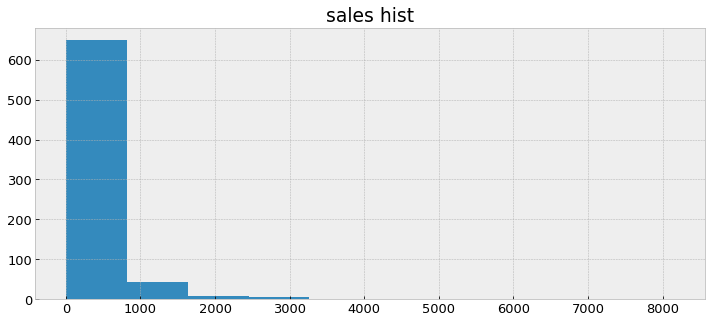

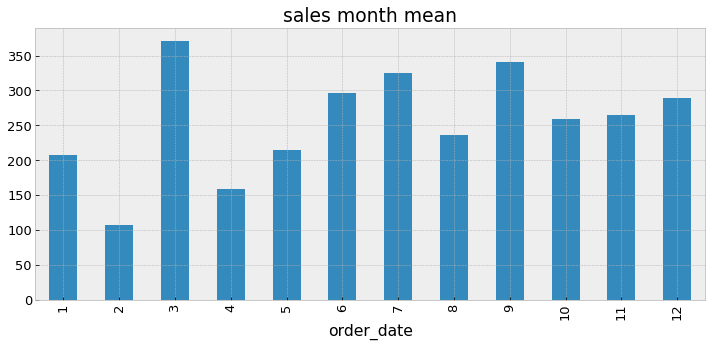

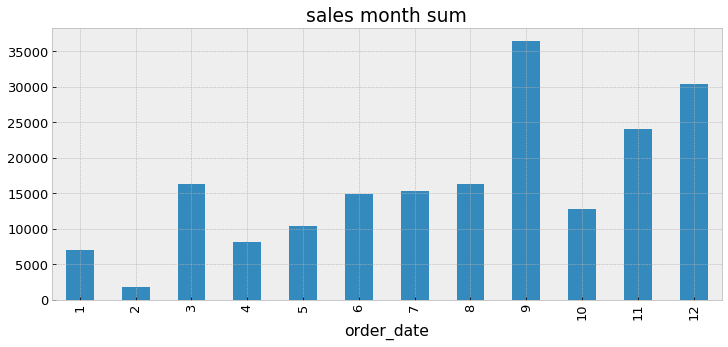

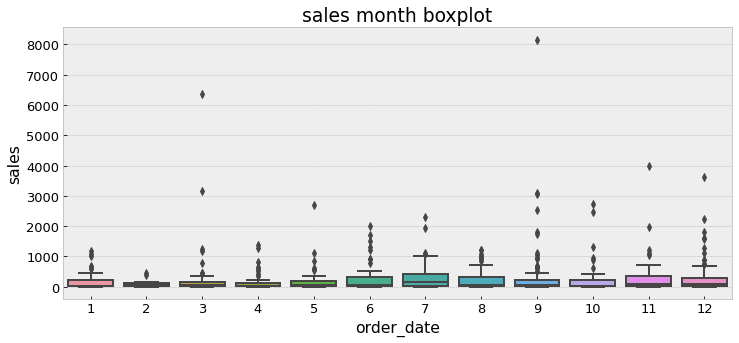

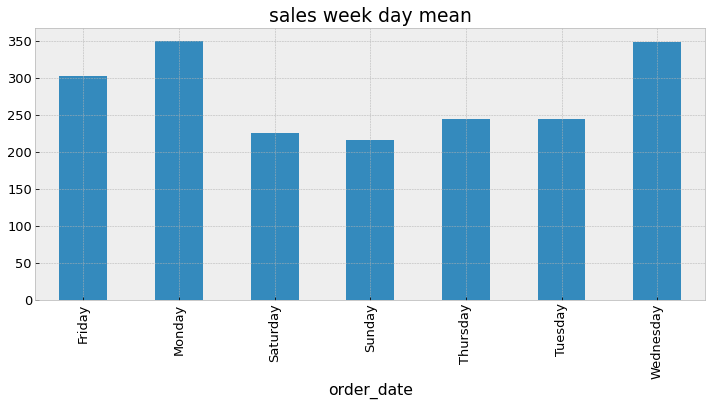

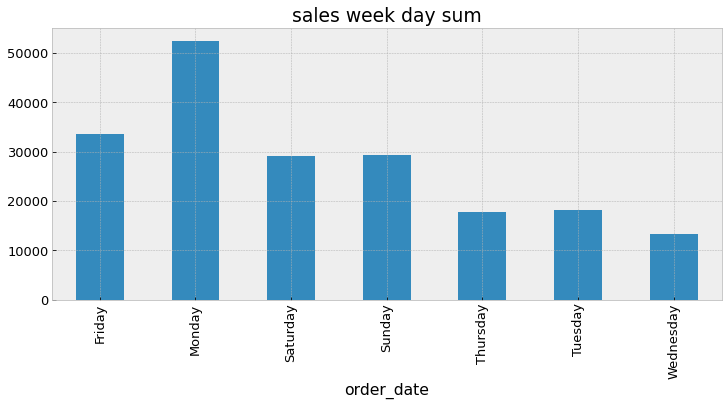

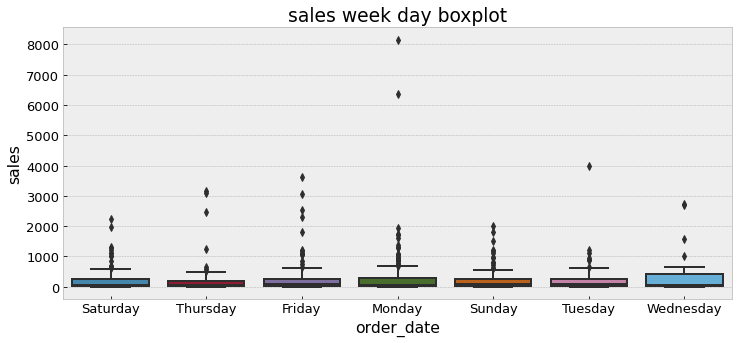

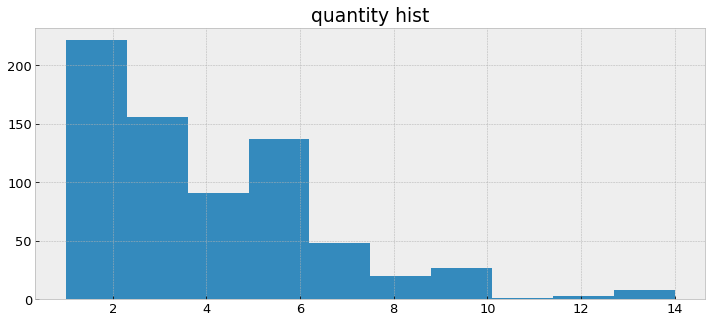

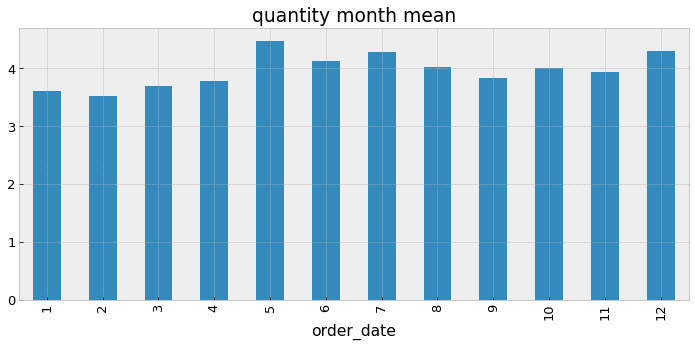

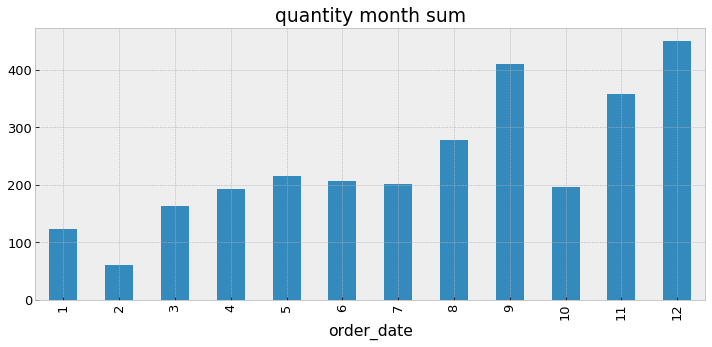

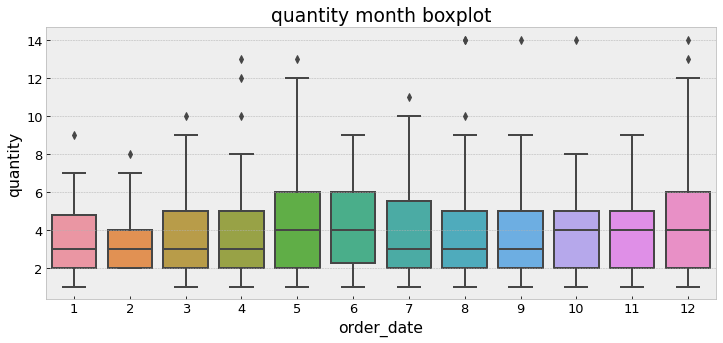

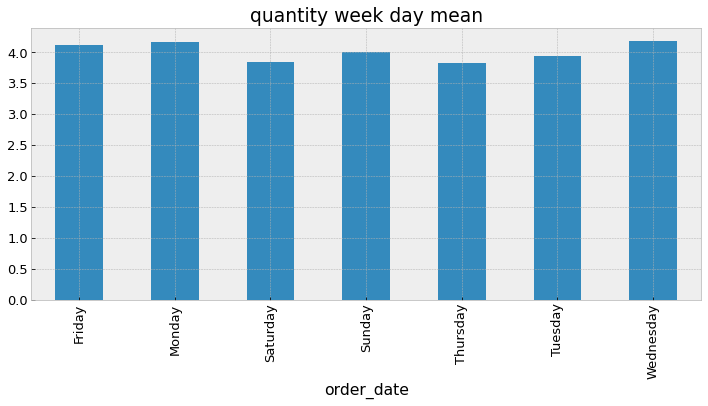

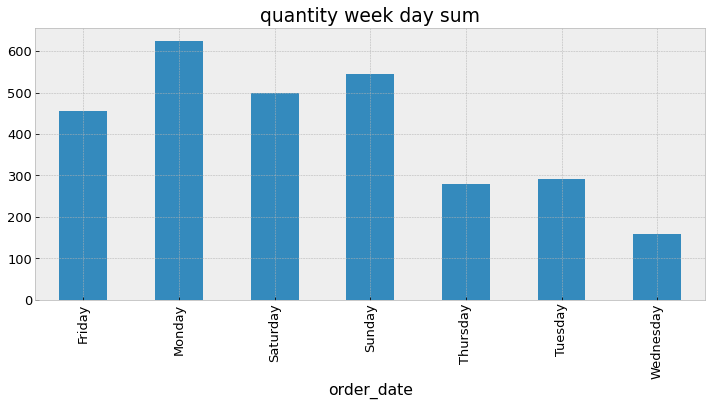

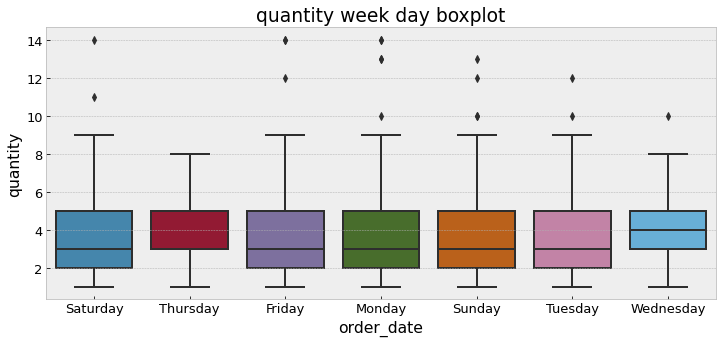

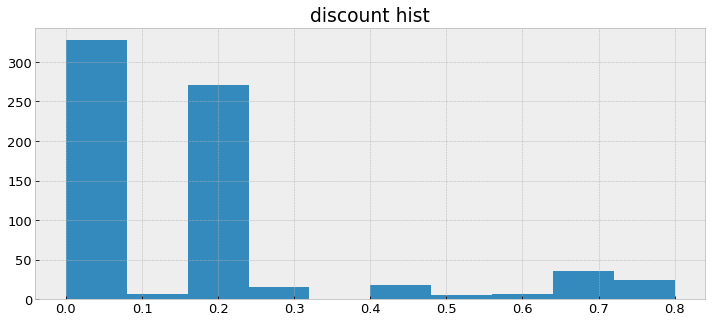

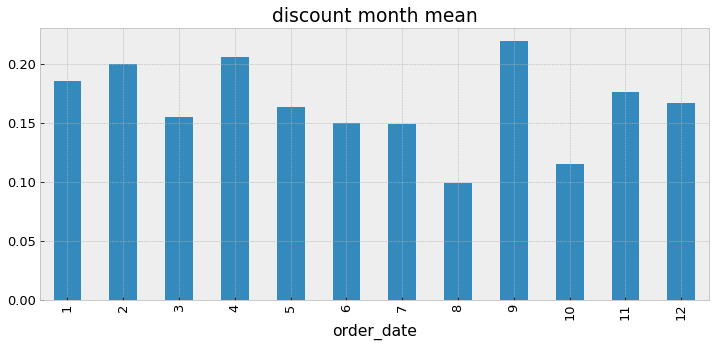

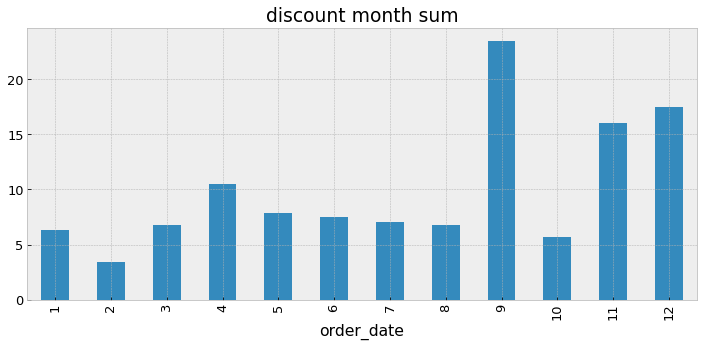

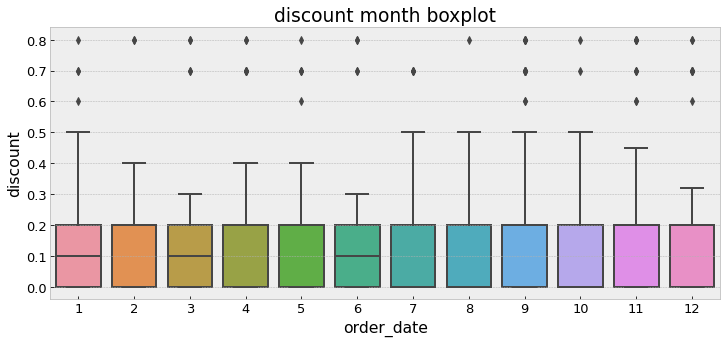

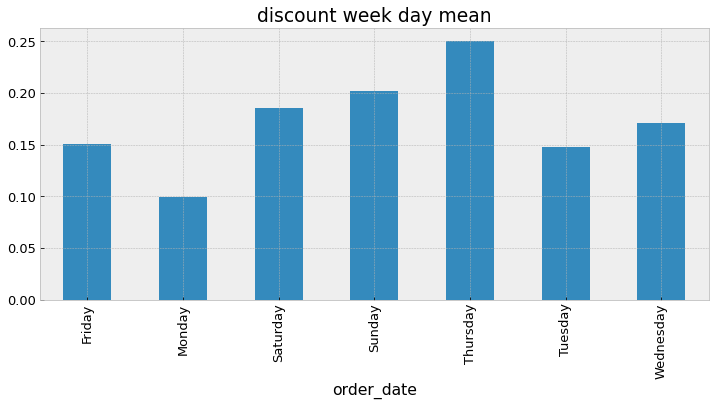

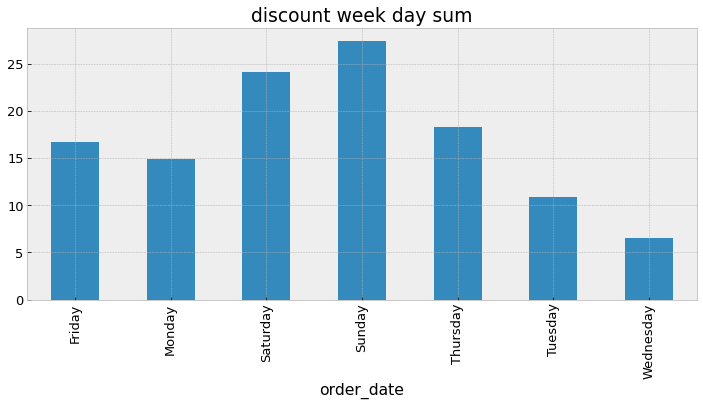

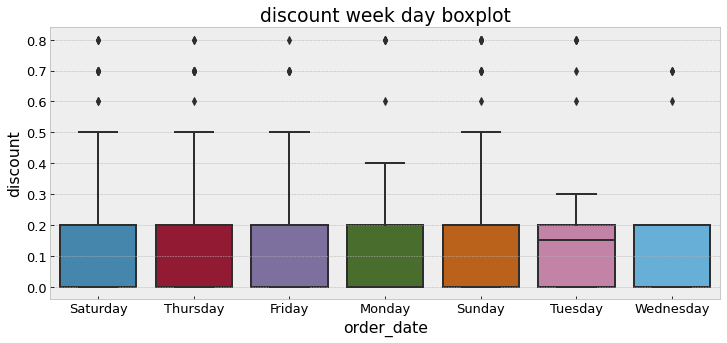

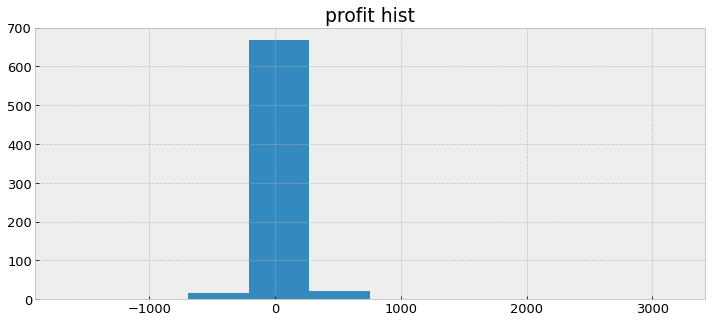

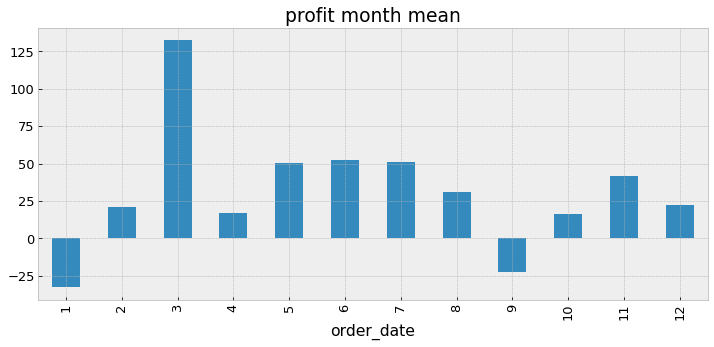

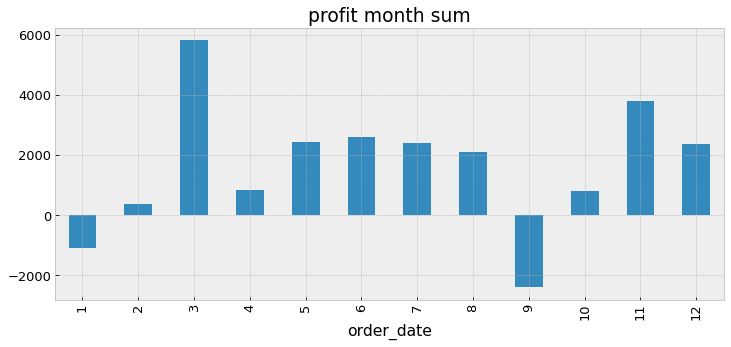

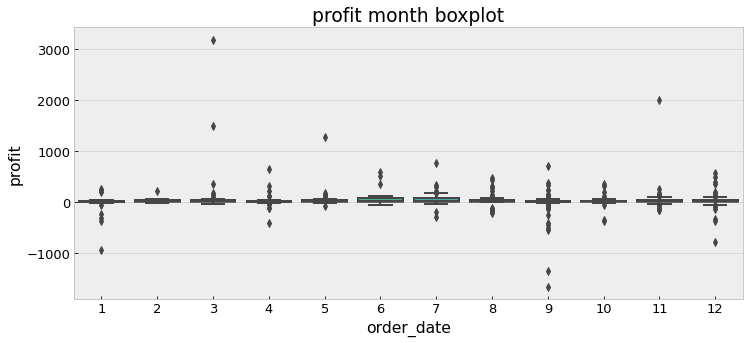

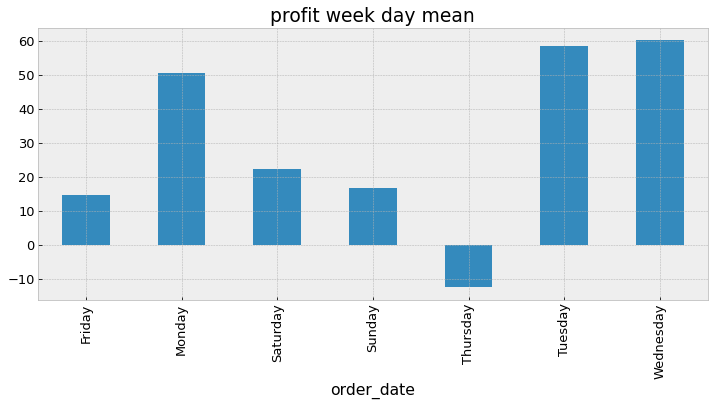

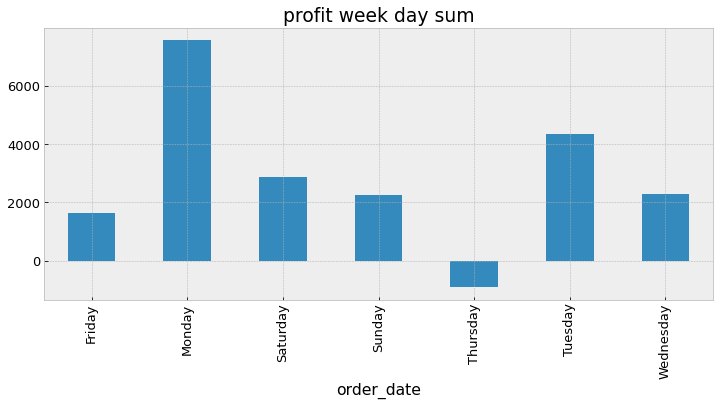

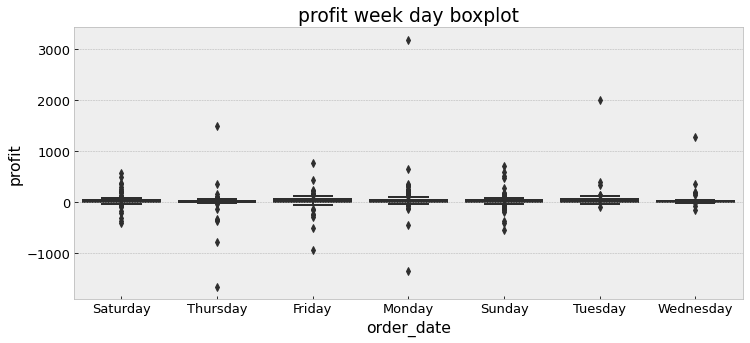

In [18]:
for col in train.columns[train.dtypes == float]:
    plt.hist(train[col])
    plt.title(col +' hist')
    plt.show()
    train.groupby(train.index.month)[col].mean().plot.bar()
    plt.title(col + ' month mean')
    plt.show()
    train.groupby(train.index.month)[col].sum().plot.bar()
    plt.title(col + ' month sum')
    plt.show()
    sns.boxplot(data=train, y=col, x=train.index.month)
    plt.title(col + ' month boxplot')
    plt.show()
    train.groupby(train.index.day_name())[col].mean().plot.bar()
    plt.title(col + ' week day mean')
    plt.show()
    train.groupby(train.index.day_name())[col].sum().plot.bar()
    plt.title(col + ' week day sum')
    plt.show()
    sns.boxplot(data=train, y=col, x=train.index.day_name())
    plt.title(col + ' week day boxplot')
    plt.show()

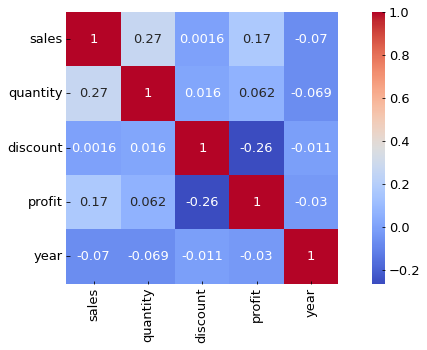

In [19]:
# Perform a Pearson Correlation on the dataset
correlate = ssdb.corr()
sns.heatmap(correlate, annot=True, cmap='coolwarm',square=True)
plt.show()

## Segments

In [20]:
train.head()

order_id  ship_date       ship_mode      segment  \
order_date                                                           
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   

                  country        city     state postal_code    sales  \
order_date                                                             
2014-01-04  United States  Naperville  Illinois     60540.0   11.784   
2014-01-04  United States  Naperville  Illinois     60540.0  272.736   
2014-01-04  United States  Naperville  Illinois     60540.0    3.540   
2014-01-09  United States      Laredo     Texas     78041.0   31.200   
2014-01-09  United States      Laredo     Texas     78041.0    9.344   

            quantity  discount   profit         category sub-category  \
order_date                                                              
2014-01-04       3.0       0.2   4.2717  Office Supplies       Labels   
2014-01-04       3.0       0.2 -64.7748  Office Supplies      Storage   
2014-01-04       2.0       0.8  -5.4870  Office Supplies      Binders   
2014-01-09       3.0       0.2   9.7500       Technology  Accessories   
2014-01-09       2.0       0.2   1.1680  Office Supplies          Art   

            customer_name                                product_name  \
order_date                                                              
2014-01-04  Phillina Ober                                   Avery 508   
2014-01-04  Phillina Ober               SAFCO Boltless Steel Shelving   
2014-01-04  Phillina Ober  GBC Standard Plastic Binding Systems Combs   
2014-01-09  Melanie Seite             Memorex Micro Travel Drive 8 GB   
2014-01-09  Melanie Seite                                  Newell 312   

           region_name days_to_ship  
order_date                           
2014-01-04     Central       4 days  
2014-01-04     Central       4 days  
2014-01-04     Central       4 days  
2014-01-09     Central       4 days  
2014-01-09     Central       4 days

In [21]:
train.groupby(['segment'])['profit','sales'].mean().sort_values(by=['profit'])

profit       sales
segment                           
Corporate    19.729518  240.738254
Consumer     26.525731  294.763823
Home Office  47.267911  236.158616

In [22]:
train.groupby(['segment'])['profit','sales'].sum().sort_values(by=['profit'])

profit        sales
segment                             
Corporate     3492.1246   42610.6710
Home Office   5388.5419   26922.0822
Consumer     11167.3329  124095.5695

In [23]:
train.groupby(['segment'])['customer_name'].nunique()

segment
Consumer       159
Corporate       68
Home Office     47
Name: customer_name, dtype: int64

In [24]:
# 
# train[['segment','category','profit']].sort_values(by=['segment','category','profit'])

## days to ship (might not be relevant)

In [25]:
ssdb.head()

order_id  ship_date       ship_mode      segment  \
order_date                                                           
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   

                  country        city     state postal_code    sales  \
order_date                                                             
2014-01-04  United States  Naperville  Illinois     60540.0   11.784   
2014-01-04  United States  Naperville  Illinois     60540.0  272.736   
2014-01-04  United States  Naperville  Illinois     60540.0    3.540   
2014-01-09  United States      Laredo     Texas     78041.0   31.200   
2014-01-09  United States      Laredo     Texas     78041.0    9.344   

            quantity  discount   profit         category sub-category  \
order_date                                                              
2014-01-04       3.0       0.2   4.2717  Office Supplies       Labels   
2014-01-04       3.0       0.2 -64.7748  Office Supplies      Storage   
2014-01-04       2.0       0.8  -5.4870  Office Supplies      Binders   
2014-01-09       3.0       0.2   9.7500       Technology  Accessories   
2014-01-09       2.0       0.2   1.1680  Office Supplies          Art   

            customer_name                                product_name  \
order_date                                                              
2014-01-04  Phillina Ober                                   Avery 508   
2014-01-04  Phillina Ober               SAFCO Boltless Steel Shelving   
2014-01-04  Phillina Ober  GBC Standard Plastic Binding Systems Combs   
2014-01-09  Melanie Seite             Memorex Micro Travel Drive 8 GB   
2014-01-09  Melanie Seite                                  Newell 312   

           region_name days_to_ship  year  
order_date                                 
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-09     Central       4 days  2014  
2014-01-09     Central       4 days  2014

In [26]:
# Explore days to ship
ssdb.days_to_ship.value_counts()

4 days    468
5 days    344
2 days    275
6 days    204
3 days    186
7 days    107
1 days     77
0 days     73
Name: days_to_ship, dtype: int64

In [27]:
# ssdb[['segment','category','sub-category','days_to_ship','discount']].value_counts()

In [28]:
discount = ssdb.groupby('segment').resample('Y').mean()

In [29]:
discount = discount.reset_index().set_index('order_date')

In [30]:
discount['year'] = discount['year'].astype('int')

In [31]:
discount

segment       sales  quantity  discount     profit  year
order_date                                                              
2014-12-31     Consumer  295.446213  4.009569  0.157416  19.553698  2014
2015-12-31     Consumer  294.091090  3.933962  0.169811  33.399104  2015
2016-12-31     Consumer  189.447285  3.528986  0.148261  15.916655  2016
2017-12-31     Consumer  142.362151  3.587549  0.155914  19.895237  2017
2014-12-31    Corporate  295.128864  4.209877  0.205556  16.229535  2014
2015-12-31    Corporate  194.846177  4.166667  0.187500  22.682628  2015
2016-12-31    Corporate  219.259045  3.820513  0.134936  32.018391  2016
2017-12-31    Corporate  247.521316  3.689655  0.180828 -11.078248  2017
2014-12-31  Home Office  314.732082  3.857143  0.108163  94.692192  2014
2015-12-31  Home Office  176.926311  3.876923  0.152615  11.517300  2015
2016-12-31  Home Office  216.429234  3.617021  0.173404  19.548181  2016
2017-12-31  Home Office  260.655633  3.819149  0.152128  33.621330  2017

## discount and profit

In [32]:
ssdb.head()

order_id  ship_date       ship_mode      segment  \
order_date                                                           
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   

                  country        city     state postal_code    sales  \
order_date                                                             
2014-01-04  United States  Naperville  Illinois     60540.0   11.784   
2014-01-04  United States  Naperville  Illinois     60540.0  272.736   
2014-01-04  United States  Naperville  Illinois     60540.0    3.540   
2014-01-09  United States      Laredo     Texas     78041.0   31.200   
2014-01-09  United States      Laredo     Texas     78041.0    9.344   

            quantity  discount   profit         category sub-category  \
order_date                                                              
2014-01-04       3.0       0.2   4.2717  Office Supplies       Labels   
2014-01-04       3.0       0.2 -64.7748  Office Supplies      Storage   
2014-01-04       2.0       0.8  -5.4870  Office Supplies      Binders   
2014-01-09       3.0       0.2   9.7500       Technology  Accessories   
2014-01-09       2.0       0.2   1.1680  Office Supplies          Art   

            customer_name                                product_name  \
order_date                                                              
2014-01-04  Phillina Ober                                   Avery 508   
2014-01-04  Phillina Ober               SAFCO Boltless Steel Shelving   
2014-01-04  Phillina Ober  GBC Standard Plastic Binding Systems Combs   
2014-01-09  Melanie Seite             Memorex Micro Travel Drive 8 GB   
2014-01-09  Melanie Seite                                  Newell 312   

           region_name days_to_ship  year  
order_date                                 
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-09     Central       4 days  2014  
2014-01-09     Central       4 days  2014

<AxesSubplot:xlabel='discount', ylabel='profit'>

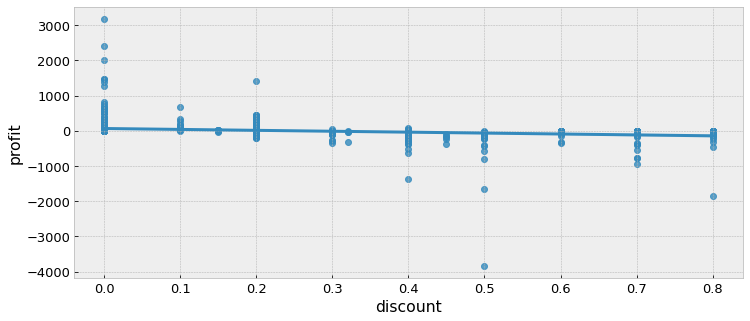

In [33]:
sns.regplot(x='discount',y='profit',data=ssdb)

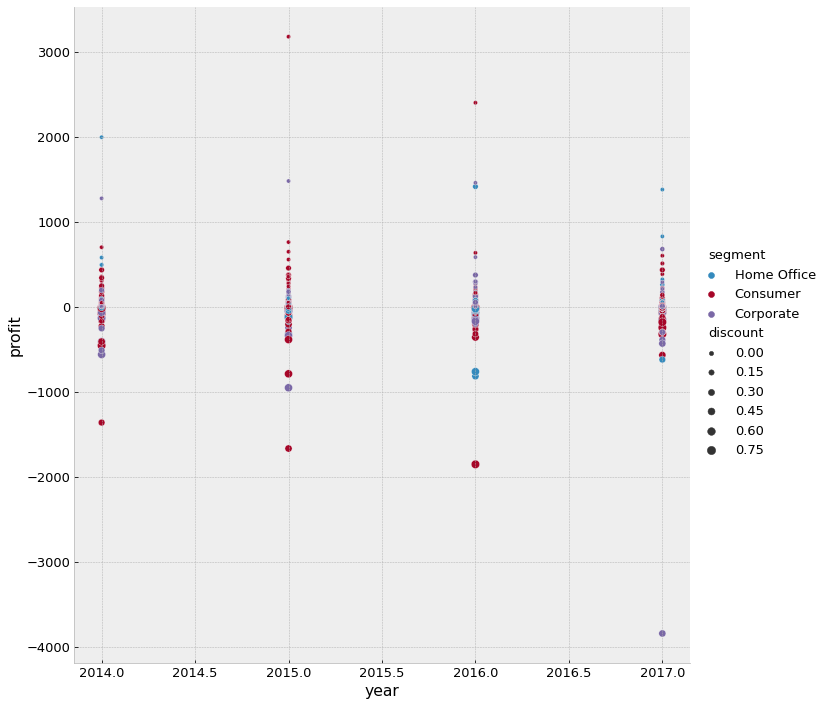

In [34]:
sns.relplot(x='year',y='profit',data = ssdb,hue = 'segment',size='discount',height =10)

In [35]:
profit = ssdb.groupby('segment').resample('Y').sum().unstack(0)['profit']

Text(0, 0.5, 'Discount')

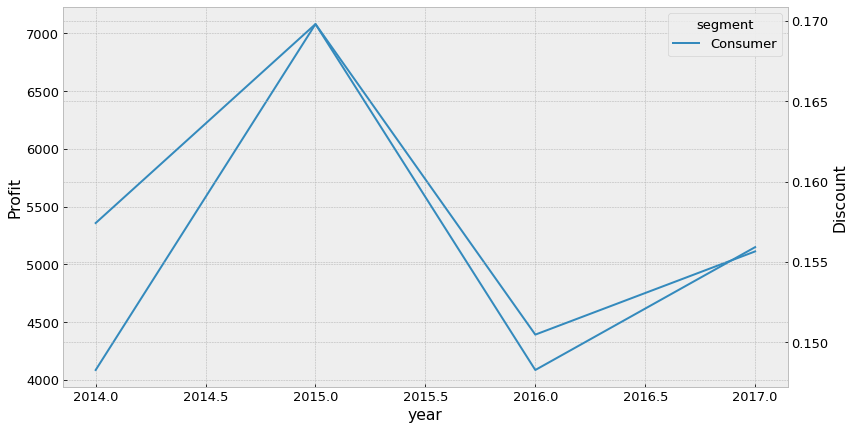

In [36]:
df = ssdb[ssdb['segment'] == 'Consumer'][['segment','discount','profit','year']]

df = df.groupby(['year', 'segment']).agg({'discount': 'mean', 'profit': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(13, 7))

ax2 = ax.twinx()

df.pivot_table('profit', 'year', 'segment').plot(ax=ax)
df.pivot_table('discount', 'year', 'segment').plot(ax=ax2)

ax.set_ylabel('Profit')
ax2.set_ylabel('Discount')

Text(0, 0.5, 'Discount')

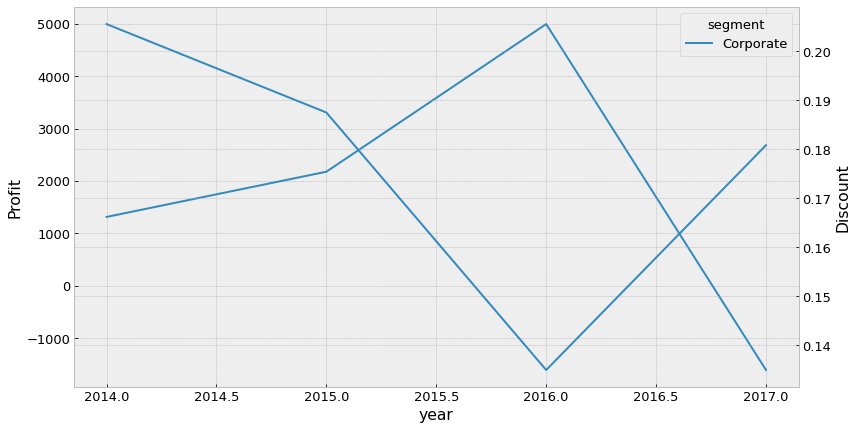

In [37]:
df = ssdb[ssdb['segment'] == 'Corporate'][['segment','discount','profit','year']]

df = df.groupby(['year', 'segment']).agg({'discount': 'mean', 'profit': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(13, 7))

ax2 = ax.twinx()

df.pivot_table('profit', 'year', 'segment').plot(ax=ax)
df.pivot_table('discount', 'year', 'segment').plot(ax=ax2)

ax.set_ylabel('Profit')
ax2.set_ylabel('Discount')

Text(0, 0.5, 'Discount')

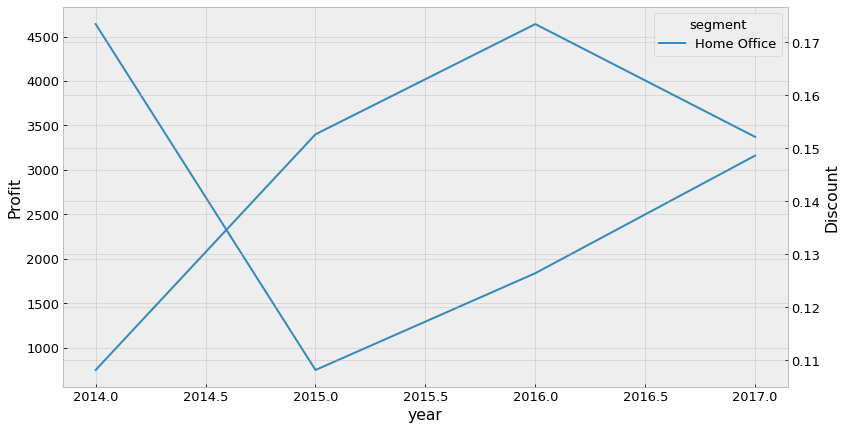

In [38]:
df = ssdb[ssdb['segment'] == 'Home Office'][['segment','discount','profit','year']]

df = df.groupby(['year', 'segment']).agg({'discount': 'mean', 'profit': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(13, 7))

ax2 = ax.twinx()

df.pivot_table('profit', 'year', 'segment').plot(ax=ax)
df.pivot_table('discount', 'year', 'segment').plot(ax=ax2)

ax.set_ylabel('Profit')
ax2.set_ylabel('Discount')

## Explore Sales, Quantity, Discount, Profit

In [39]:
ssdb.head()

order_id  ship_date       ship_mode      segment  \
order_date                                                           
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   

                  country        city     state postal_code    sales  \
order_date                                                             
2014-01-04  United States  Naperville  Illinois     60540.0   11.784   
2014-01-04  United States  Naperville  Illinois     60540.0  272.736   
2014-01-04  United States  Naperville  Illinois     60540.0    3.540   
2014-01-09  United States      Laredo     Texas     78041.0   31.200   
2014-01-09  United States      Laredo     Texas     78041.0    9.344   

            quantity  discount   profit         category sub-category  \
order_date                                                              
2014-01-04       3.0       0.2   4.2717  Office Supplies       Labels   
2014-01-04       3.0       0.2 -64.7748  Office Supplies      Storage   
2014-01-04       2.0       0.8  -5.4870  Office Supplies      Binders   
2014-01-09       3.0       0.2   9.7500       Technology  Accessories   
2014-01-09       2.0       0.2   1.1680  Office Supplies          Art   

            customer_name                                product_name  \
order_date                                                              
2014-01-04  Phillina Ober                                   Avery 508   
2014-01-04  Phillina Ober               SAFCO Boltless Steel Shelving   
2014-01-04  Phillina Ober  GBC Standard Plastic Binding Systems Combs   
2014-01-09  Melanie Seite             Memorex Micro Travel Drive 8 GB   
2014-01-09  Melanie Seite                                  Newell 312   

           region_name days_to_ship  year  
order_date                                 
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-09     Central       4 days  2014  
2014-01-09     Central       4 days  2014

<AxesSubplot:xlabel='order_date'>

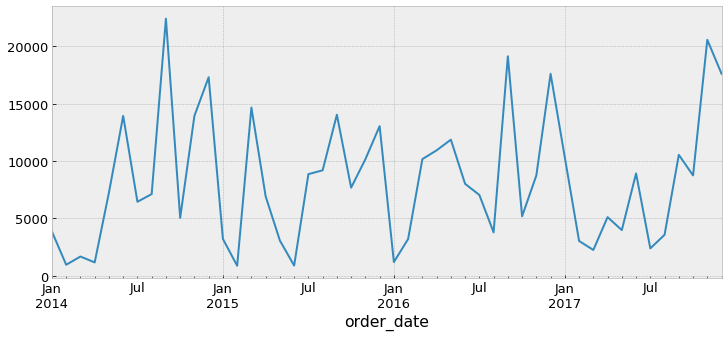

In [40]:
# Explore sales
ssdb['sales'].resample('M').sum().plot()

<AxesSubplot:xlabel='order_date'>

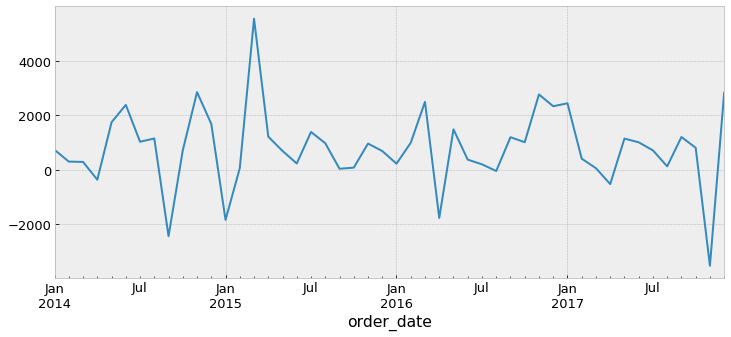

In [41]:
# Explore profit
ssdb['profit'].resample('M').sum().plot()

<AxesSubplot:xlabel='order_date'>

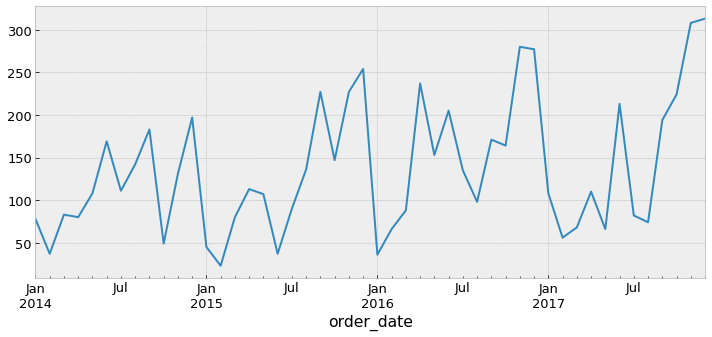

In [42]:
# Explore quantity
ssdb['quantity'].resample('M').sum().plot()

In [43]:
ssdb.sales.sum()

397443.8254

In [44]:
# Compare to product name for cost for all below

# ssdb['simple_cost'] = (ssdb.sales - ssdb.profit) / ssdb.quantity

# ssdb['discount_quantity_cost'] = ((((ssdb.sales * ssdb.discount) + ssdb.sales) - ssdb.profit) / ssdb.quantity)

In [45]:
#ssdb[['product_name','simple_cost']].value_counts().sort_values(ascending=False)

## Segment over time

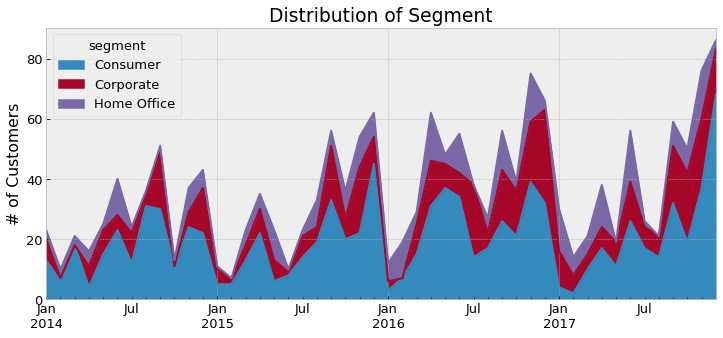

In [46]:
ax = ssdb.groupby('segment').resample('M').size().T.plot.area()
ax.set(title='Distribution of Segment', xlabel='', ylabel='# of Customers')
ax.yaxis.set_major_formatter('{:,.0f}'.format)

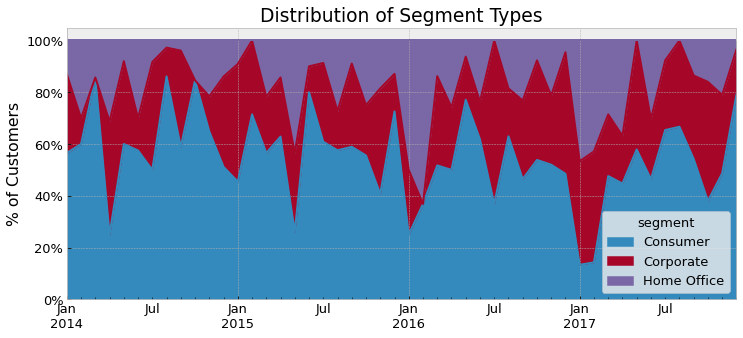

In [47]:
ax = (
    ssdb.groupby("segment")
    .resample("M")
    .size()
    .T.apply(lambda row: row / row.sum(), axis=1)
    .plot.area()
)
ax.set(title='Distribution of Segment Types', xlabel='', ylabel='% of Customers')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))

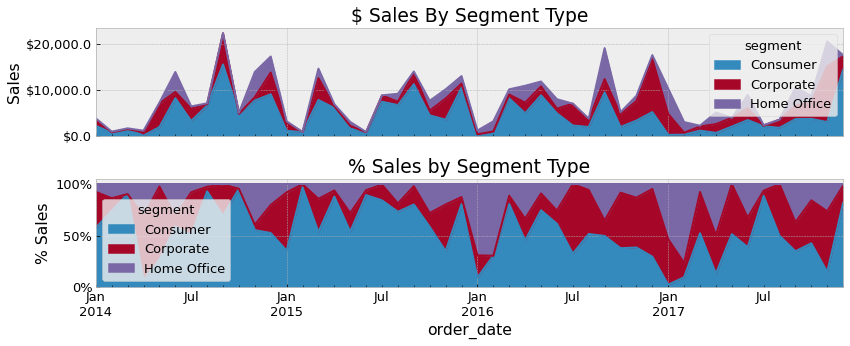

In [48]:

monthly_sales = (
    ssdb[['sales','segment']]
    .groupby('segment')
    .resample('M')
    .sales.sum()
    .unstack(0)
)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

monthly_sales.plot.area(ax=ax1)
ax1.set(title='$ Sales By Segment Type', ylabel='Sales')
ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))
monthly_sales.apply(lambda row: row / row.sum(), axis=1).plot.area(ax=ax2)
ax2.set(title='% Sales by Segment Type', ylabel='% Sales')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
fig.tight_layout()

[Text(0, 0.5, 'Sales'),
 Text(0.5, 1.0, 'Yearly $ Sales By Segment Type'),
 Text(0.5, 0, 'Year')]

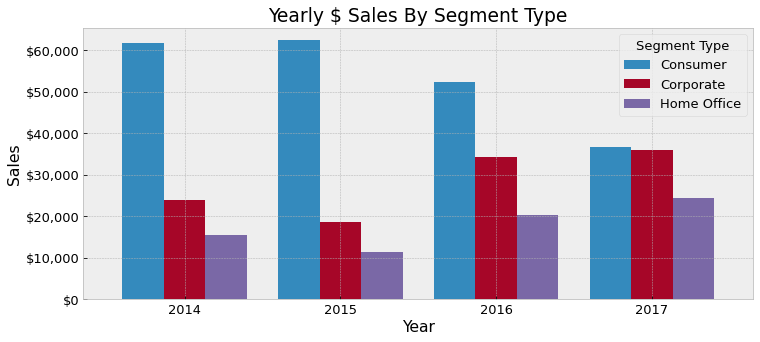

In [49]:
ax = (
    monthly_sales.resample('Y')
    .sum()
    .plot.bar(width=.8)
)
ax.legend(loc='upper right', title='Segment Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Sales', title='Yearly $ Sales By Segment Type', xlabel='Year')

[Text(0, 0.5, 'Sales'),
 Text(0.5, 1.0, 'Yearly % Sales By Segment Type'),
 Text(0.5, 0, 'Year')]

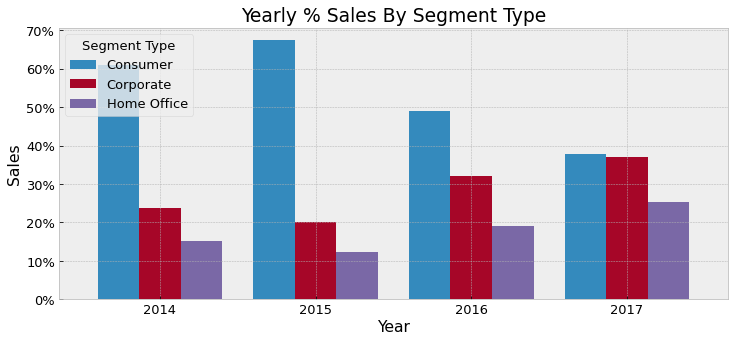

In [50]:
ax = (
    monthly_sales.resample('Y')
    .sum()
    .apply(lambda row: row / row.sum(), axis =1)
    .plot.bar(width=.8)
)
ax.legend(loc='upper left', title='Segment Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Sales', title='Yearly % Sales By Segment Type', xlabel='Year')

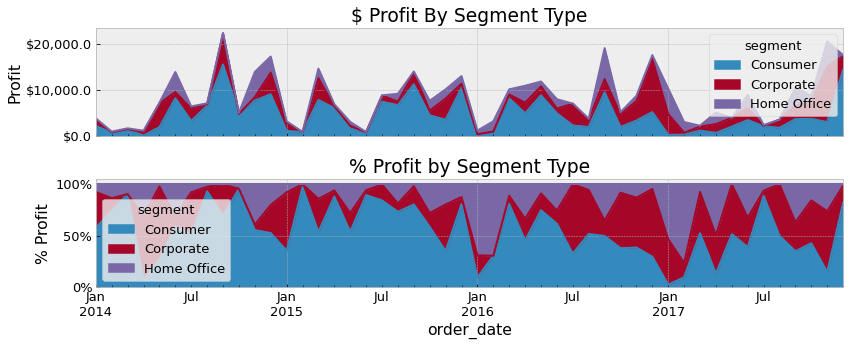

In [51]:
monthly_profit = (
    ssdb[['profit','segment']]
    .groupby('segment')
    .resample('M')
    .profit.sum()
    .unstack(0)
)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

monthly_sales.plot.area(ax=ax1)
ax1.set(title='$ Profit By Segment Type', ylabel='Profit')
ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))
monthly_sales.apply(lambda row: row / row.sum(), axis=1).plot.area(ax=ax2)
ax2.set(title='% Profit by Segment Type', ylabel='% Profit')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
fig.tight_layout()

[Text(0, 0.5, 'Profit'),
 Text(0.5, 1.0, 'Yearly $ Profit By Segment Type'),
 Text(0.5, 0, 'Year')]

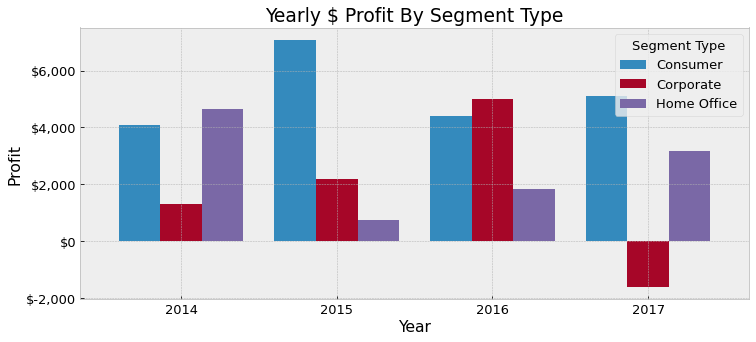

In [52]:
ax = (
    monthly_profit.resample('Y')
    .sum()
    .plot.bar(width=.8)
)
ax.legend(loc='upper right', title='Segment Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Profit', title='Yearly $ Profit By Segment Type', xlabel='Year')

[Text(0, 0.5, 'Profit'),
 Text(0.5, 1.0, 'Yearly % Profit By Segment Type'),
 Text(0.5, 0, 'Year')]

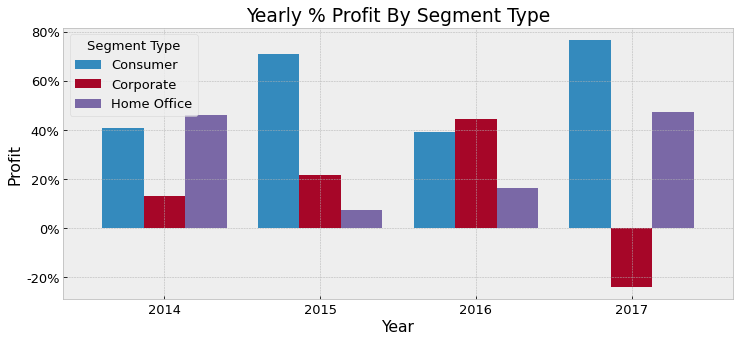

In [53]:
ax = (
    monthly_profit.resample('Y')
    .sum()
    .apply(lambda row: row / row.sum(),axis = 1)
    .plot.bar(width=.8)
)
ax.legend(loc='upper left', title='Segment Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Profit', title='Yearly % Profit By Segment Type', xlabel='Year')

## EDA Visuals by segment 

### Overview

In [54]:
train.head()

order_id  ship_date       ship_mode      segment  \
order_date                                                           
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   

                  country        city     state postal_code    sales  \
order_date                                                             
2014-01-04  United States  Naperville  Illinois     60540.0   11.784   
2014-01-04  United States  Naperville  Illinois     60540.0  272.736   
2014-01-04  United States  Naperville  Illinois     60540.0    3.540   
2014-01-09  United States      Laredo     Texas     78041.0   31.200   
2014-01-09  United States      Laredo     Texas     78041.0    9.344   

            quantity  discount   profit         category sub-category  \
order_date                                                              
2014-01-04       3.0       0.2   4.2717  Office Supplies       Labels   
2014-01-04       3.0       0.2 -64.7748  Office Supplies      Storage   
2014-01-04       2.0       0.8  -5.4870  Office Supplies      Binders   
2014-01-09       3.0       0.2   9.7500       Technology  Accessories   
2014-01-09       2.0       0.2   1.1680  Office Supplies          Art   

            customer_name                                product_name  \
order_date                                                              
2014-01-04  Phillina Ober                                   Avery 508   
2014-01-04  Phillina Ober               SAFCO Boltless Steel Shelving   
2014-01-04  Phillina Ober  GBC Standard Plastic Binding Systems Combs   
2014-01-09  Melanie Seite             Memorex Micro Travel Drive 8 GB   
2014-01-09  Melanie Seite                                  Newell 312   

           region_name days_to_ship  
order_date                           
2014-01-04     Central       4 days  
2014-01-04     Central       4 days  
2014-01-04     Central       4 days  
2014-01-09     Central       4 days  
2014-01-09     Central       4 days

In [55]:
# train.shape, validate.shape, test.shape

### Consumer

In [56]:
consumer = train[train['segment'] == 'Consumer']
# consumer.head()

#### Profit

In [57]:
consumer_profit = consumer.profit
# consumer_profit.head()

##### Sum

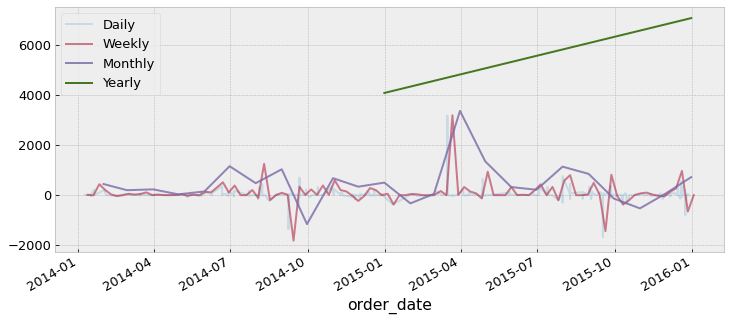

In [58]:
# Y over various periods
consumer_profit.plot(alpha = .2, label='Daily')
consumer_profit.resample('W').sum().plot(alpha=.5, label='Weekly')
consumer_profit.resample('M').sum().plot(alpha=.8, label='Monthly')
consumer_profit.resample('Y').sum().plot(label='Yearly')
plt.legend()

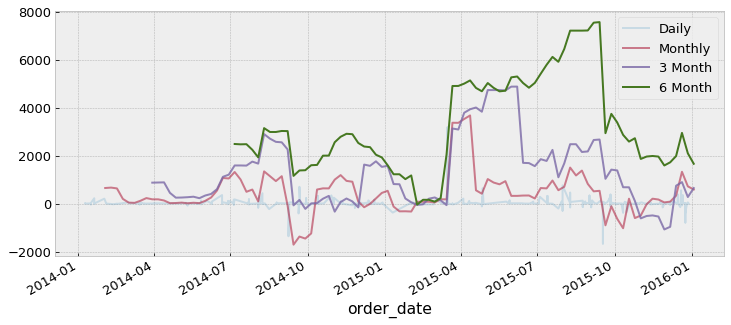

In [59]:
# Y over various periods
consumer_profit.plot(alpha = .2, label='Daily')
consumer_profit.resample('W').sum().rolling(4).sum().plot(alpha=.5, label='Monthly')
consumer_profit.resample('W').sum().rolling(12).sum().plot(alpha=.8, label='3 Month')
consumer_profit.resample('W').sum().rolling(26).sum().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

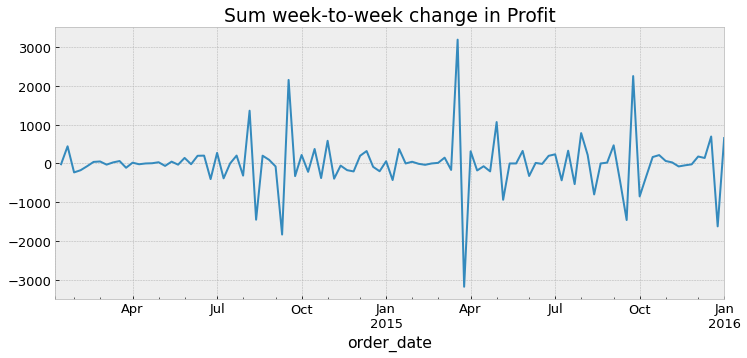

In [60]:
# Change in y week to week
consumer_profit.resample('W').sum().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

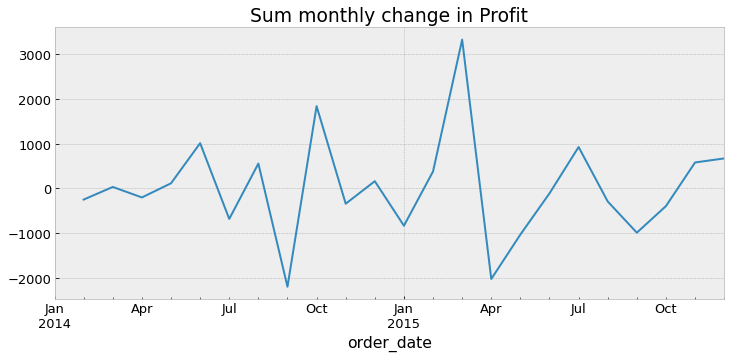

In [61]:
# Change in y month to month
consumer_profit.resample('M').sum().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

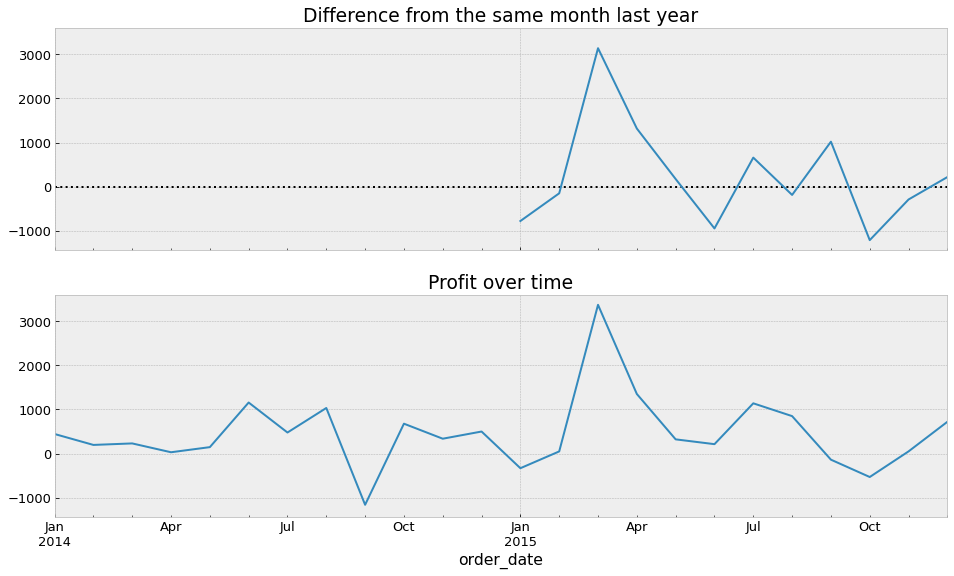

In [62]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = consumer_profit.resample('M').sum().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

consumer_profit.resample('M').sum().plot(ax=ax2)
ax2.set(title='Profit over time')

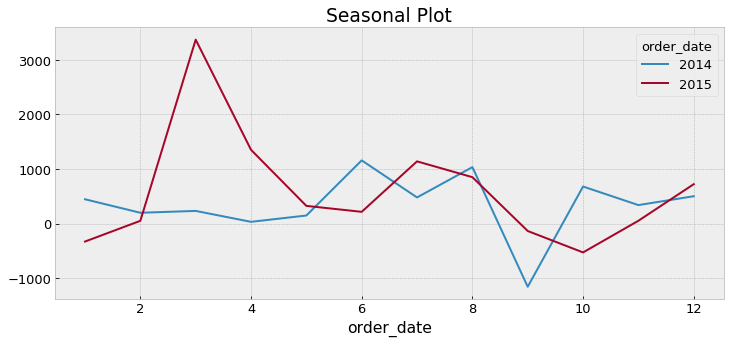

In [63]:
# Seasonal Plot
consumer_profit.groupby([consumer_profit.index.year,consumer_profit.index.month]).sum().unstack(0).plot(title='Seasonal Plot')
plt.show()

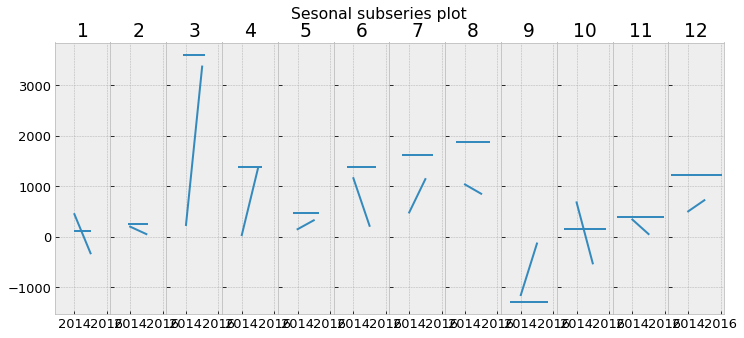

In [64]:
# Seasonal Subseries Plot
table = consumer_profit.groupby([consumer_profit.index.year, consumer_profit.index.month]).sum().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.sum(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='profit', ylabel='profit'>

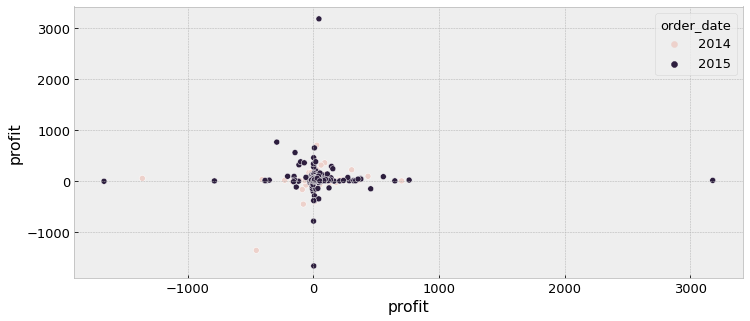

In [65]:
# Lag Plot
sns.scatterplot(x = consumer_profit, y = consumer_profit.shift(-1), hue = consumer_profit.index.year)

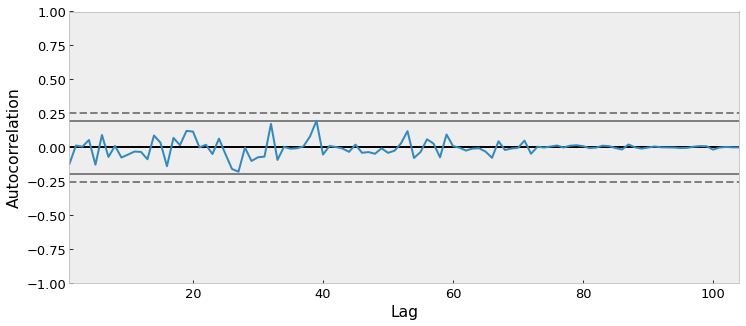

In [66]:
# Autocorrelation
pd.plotting.autocorrelation_plot(consumer_profit.resample('W').sum())
plt.show()

<AxesSubplot:xlabel='order_date'>

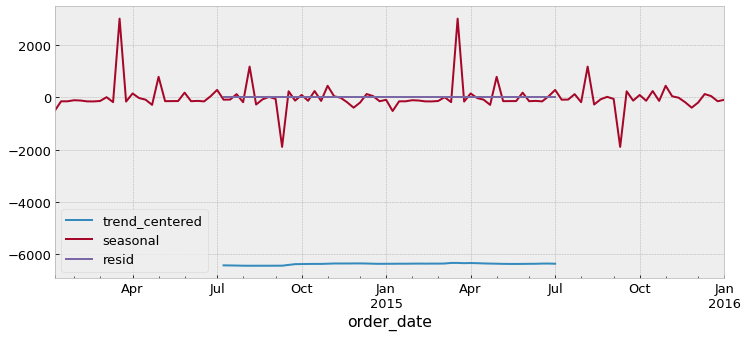

In [67]:
result = sm.tsa.seasonal_decompose(consumer_profit.resample('W').sum())
decomposition = pd.DataFrame({
    'y' : result.observed,
    'trend' : result.trend,
    'seasonal' : result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.sum()
decomposition[['trend_centered','seasonal','resid']].plot()

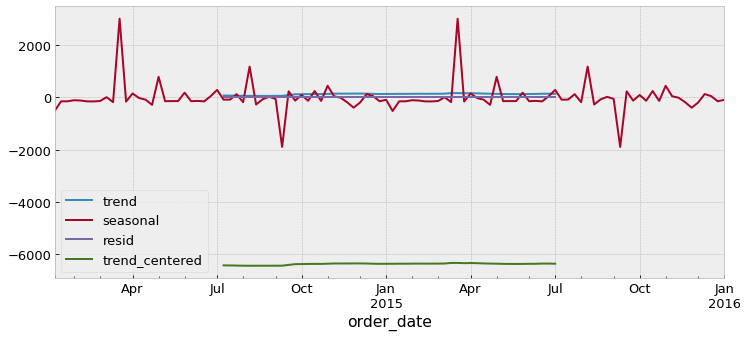

In [68]:
decomposition.iloc[:,1:].plot()
plt.show()

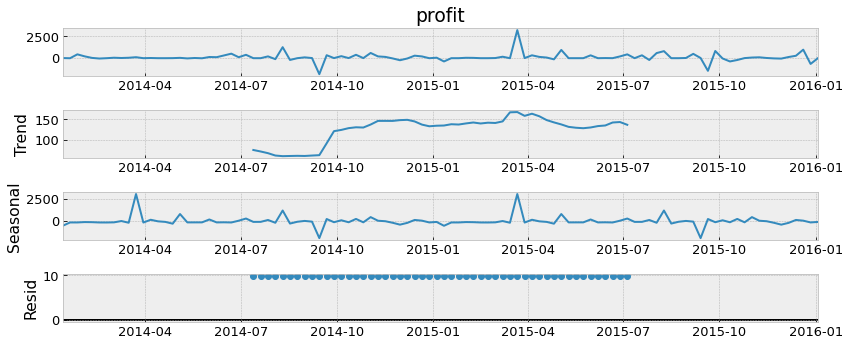

In [69]:
result.plot()
plt.show()

##### Mean

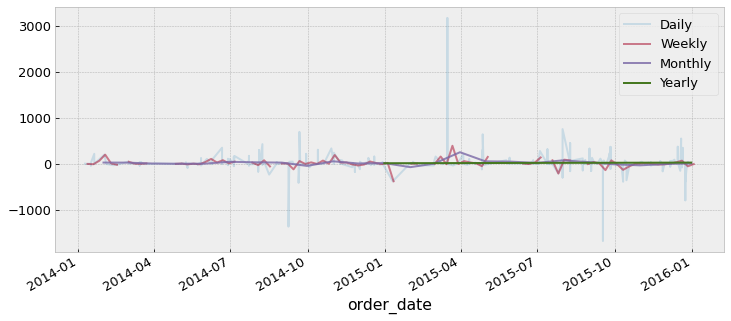

In [70]:
# Y over various periods
consumer_profit.plot(alpha = .2, label='Daily')
consumer_profit.resample('W').mean().plot(alpha=.5, label='Weekly')
consumer_profit.resample('M').mean().plot(alpha=.8, label='Monthly')
consumer_profit.resample('Y').mean().plot(label='Yearly')
plt.legend()

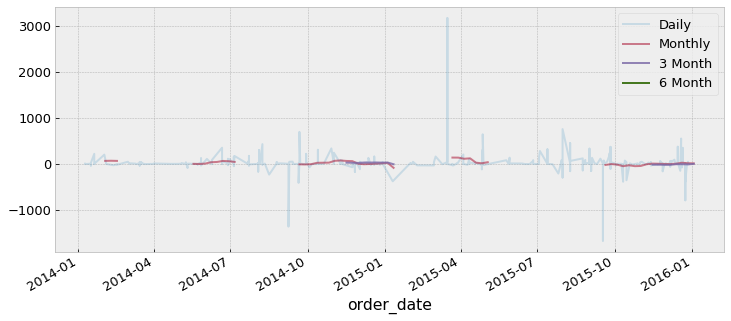

In [71]:
# Y over various periods
consumer_profit.plot(alpha = .2, label='Daily')
consumer_profit.resample('W').mean().rolling(4).mean().plot(alpha=.5, label='Monthly')
consumer_profit.resample('W').mean().rolling(12).mean().plot(alpha=.8, label='3 Month')
consumer_profit.resample('W').mean().rolling(26).mean().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

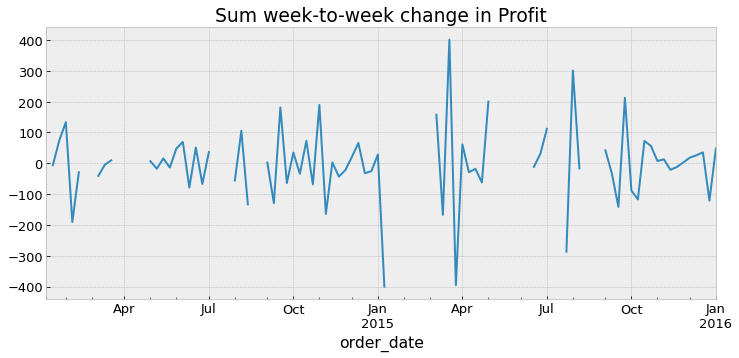

In [72]:
# Change in y week to week
consumer_profit.resample('W').mean().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

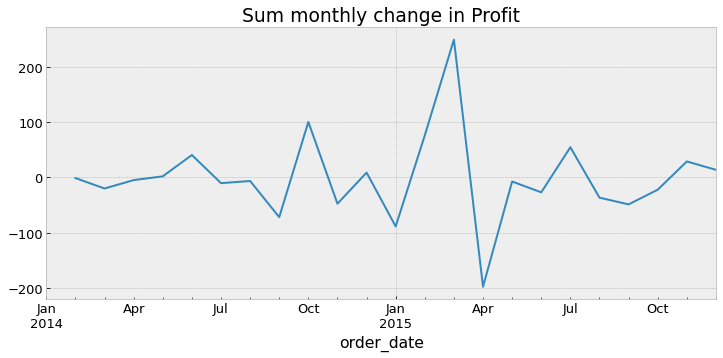

In [73]:
# Change in y month to month
consumer_profit.resample('M').mean().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

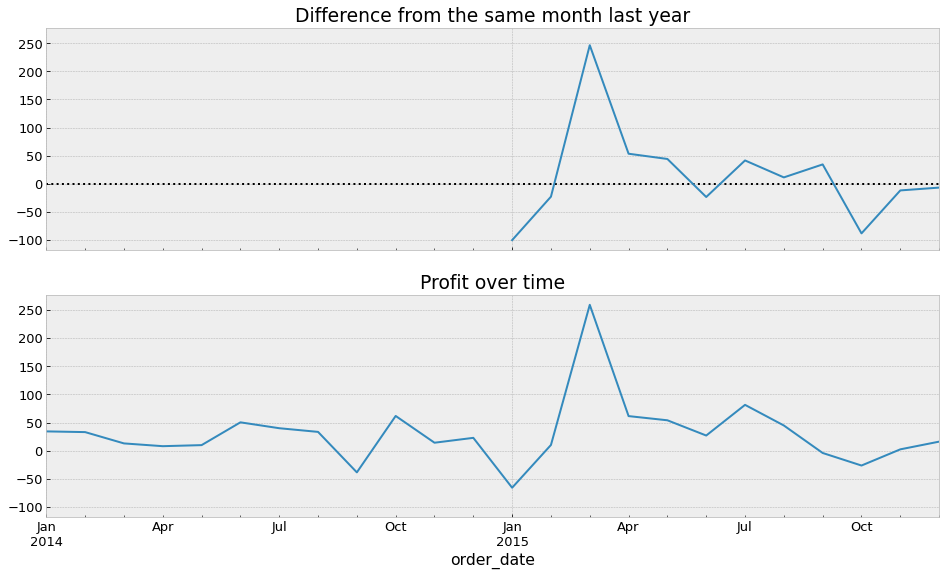

In [74]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = consumer_profit.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

consumer_profit.resample('M').mean().plot(ax=ax2)
ax2.set(title='Profit over time')

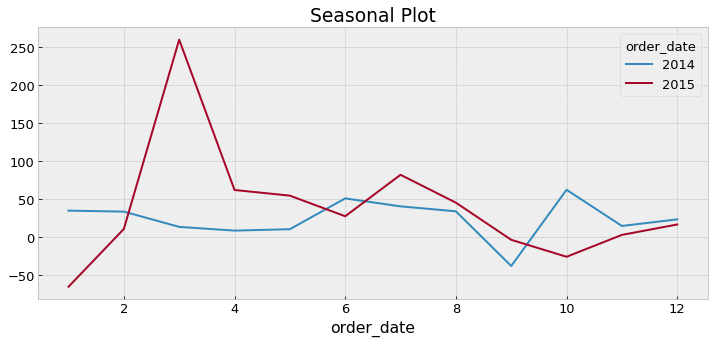

In [75]:
# Seasonal Plot
consumer_profit.groupby([consumer_profit.index.year,consumer_profit.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

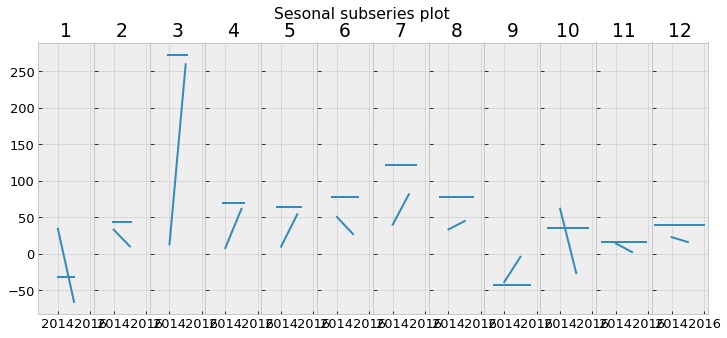

In [76]:
# Seasonal Subseries Plot
table = consumer_profit.groupby([consumer_profit.index.year, consumer_profit.index.month]).mean().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.sum(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='profit', ylabel='profit'>

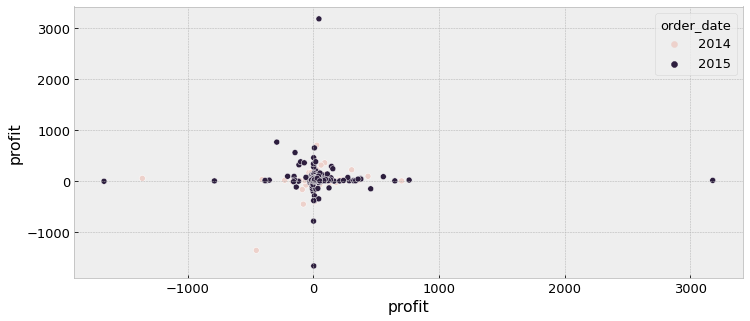

In [77]:
# Lag Plot
sns.scatterplot(x = consumer_profit, y = consumer_profit.shift(-1), hue = consumer_profit.index.year)

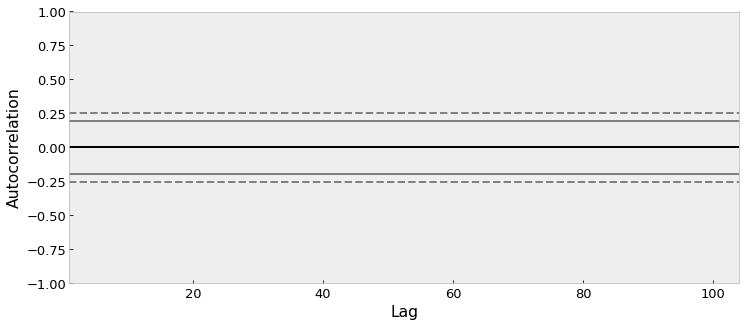

In [78]:
# Autocorrelation
pd.plotting.autocorrelation_plot(consumer_profit.resample('W').mean())
plt.show()

<AxesSubplot:xlabel='order_date'>

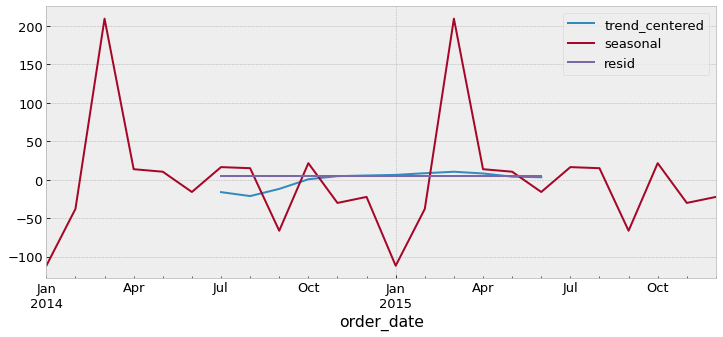

In [79]:
result = sm.tsa.seasonal_decompose(consumer_profit.resample('M').mean())
decomposition = pd.DataFrame({
    'y' : result.observed,
    'trend' : result.trend,
    'seasonal' : result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()

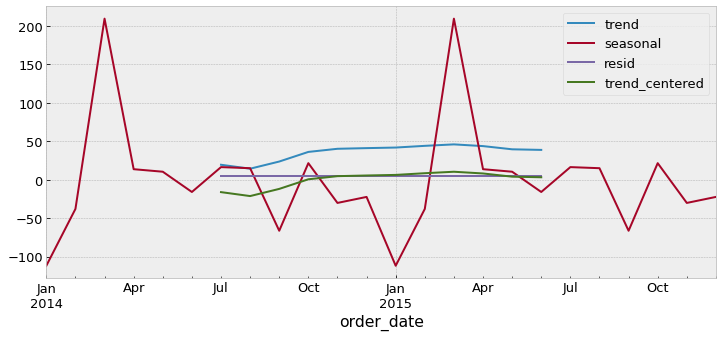

In [80]:
decomposition.iloc[:,1:].plot()
plt.show()

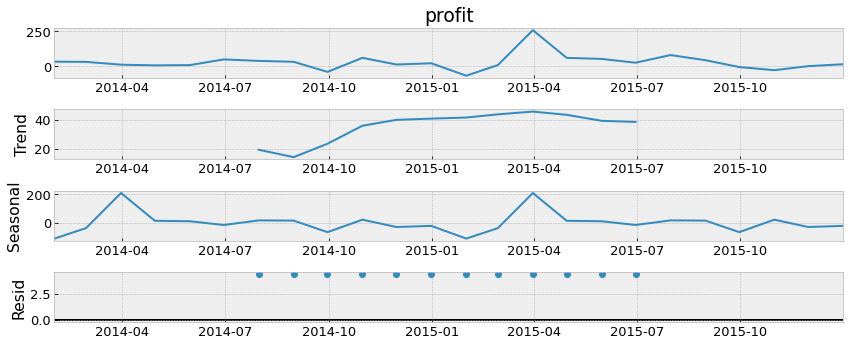

In [81]:
result.plot()
plt.show()

#### Sales

In [82]:
consumer_sales = consumer.sales
# consumer_sales.head()

##### Sum

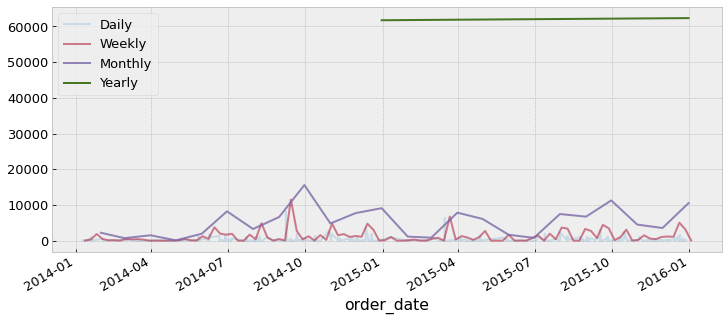

In [83]:
# Y over various periods
consumer_sales.plot(alpha = .2, label='Daily')
consumer_sales.resample('W').sum().plot(alpha=.5, label='Weekly')
consumer_sales.resample('M').sum().plot(alpha=.8, label='Monthly')
consumer_sales.resample('Y').sum().plot(label='Yearly')
plt.legend()

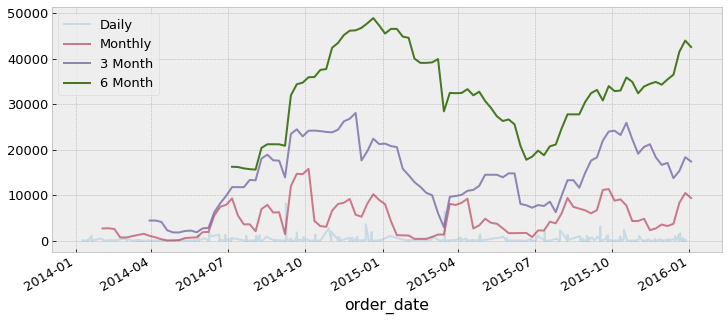

In [84]:
# Y over various periods
consumer_sales.plot(alpha = .2, label='Daily')
consumer_sales.resample('W').sum().rolling(4).sum().plot(alpha=.5, label='Monthly')
consumer_sales.resample('W').sum().rolling(12).sum().plot(alpha=.8, label='3 Month')
consumer_sales.resample('W').sum().rolling(26).sum().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

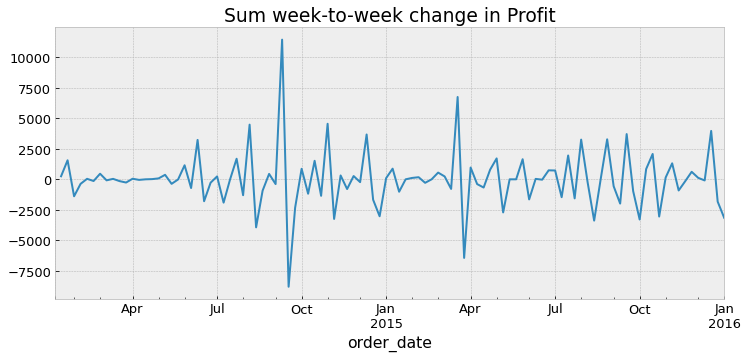

In [85]:
# Change in y week to week
consumer_sales.resample('W').sum().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

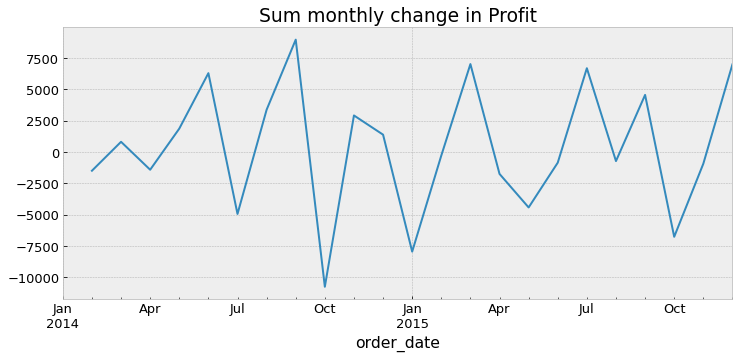

In [86]:
# Change in y month to month
consumer_sales.resample('M').sum().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

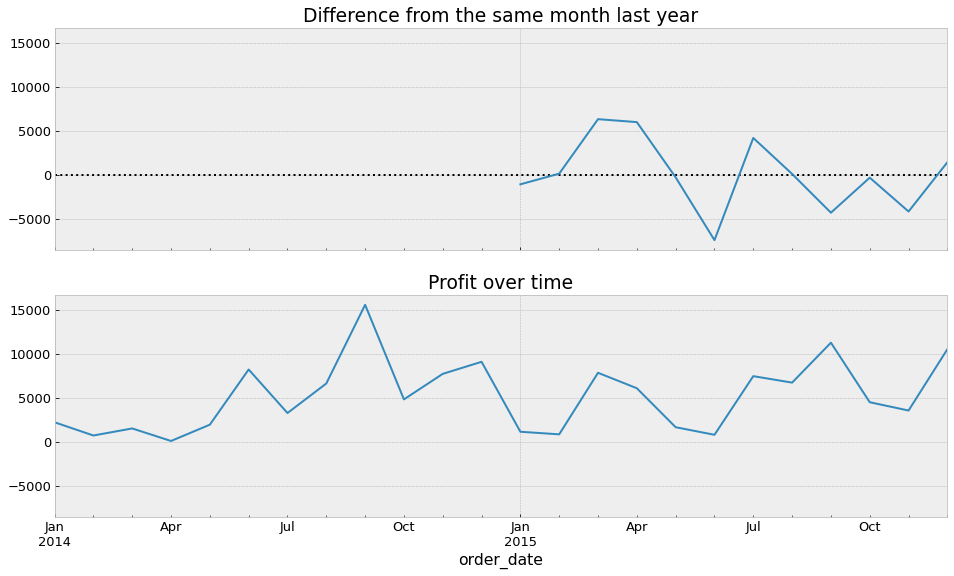

In [87]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = consumer_sales.resample('M').sum().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

consumer_sales.resample('M').sum().plot(ax=ax2)
ax2.set(title='Profit over time')

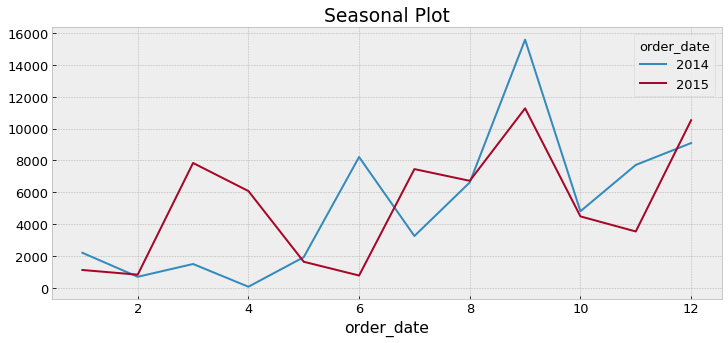

In [88]:
# Seasonal Plot
consumer_sales.groupby([consumer_sales.index.year,consumer_sales.index.month]).sum().unstack(0).plot(title='Seasonal Plot')
plt.show()

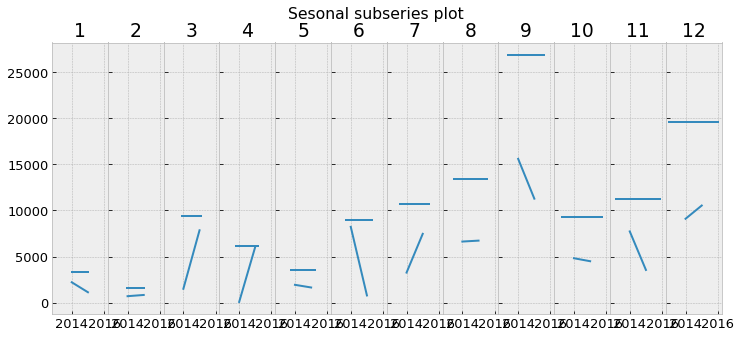

In [89]:
# Seasonal Subseries Plot
table = consumer_sales.groupby([consumer_sales.index.year, consumer_sales.index.month]).sum().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.sum(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='sales', ylabel='sales'>

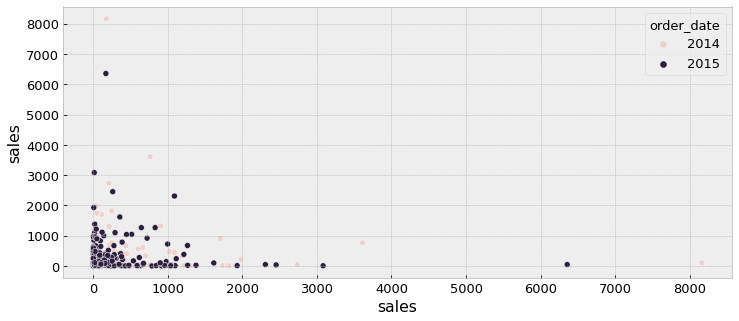

In [90]:
# Lag Plot
sns.scatterplot(x = consumer_sales, y = consumer_sales.shift(-1), hue = consumer_sales.index.year)

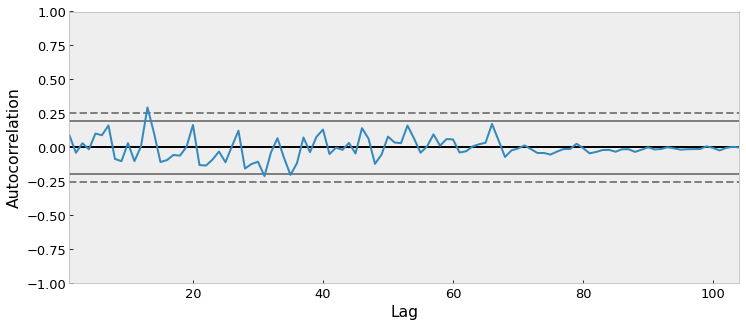

In [91]:
# Autocorrelation
pd.plotting.autocorrelation_plot(consumer_sales.resample('W').sum())
plt.show()

<AxesSubplot:xlabel='order_date'>

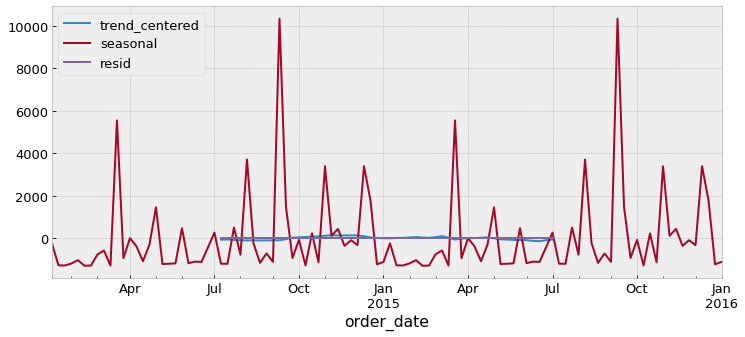

In [92]:
result = sm.tsa.seasonal_decompose(consumer_sales.resample('W').sum())
decomposition = pd.DataFrame({
    'y' : result.observed,
    'trend' : result.trend,
    'seasonal' : result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()

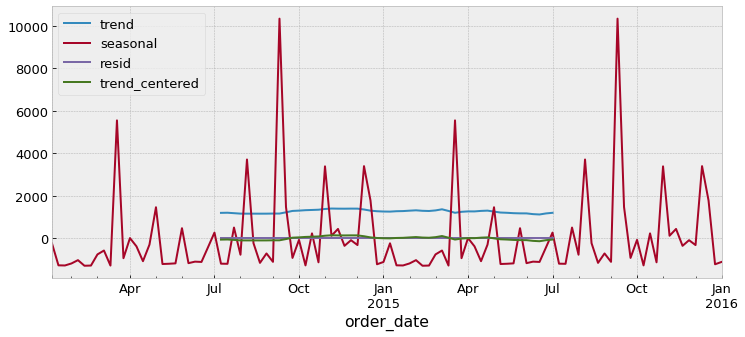

In [93]:
decomposition.iloc[:,1:].plot()
plt.show()

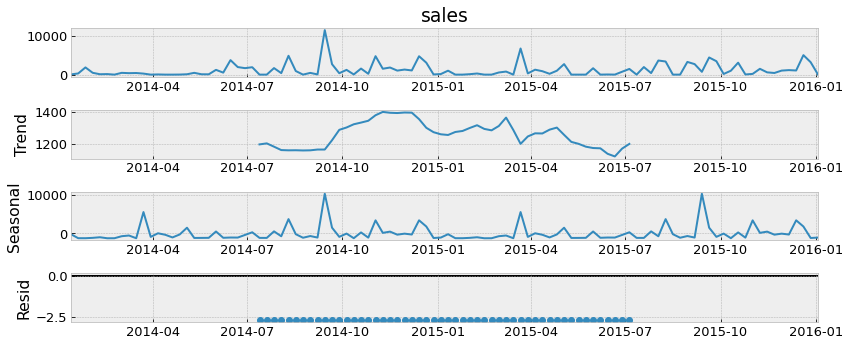

In [94]:
result.plot()
plt.show()

##### Mean

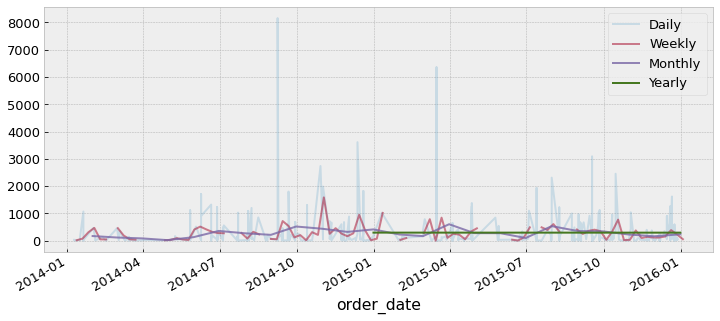

In [95]:
# Y over various periods
consumer_sales.plot(alpha = .2, label='Daily')
consumer_sales.resample('W').mean().plot(alpha=.5, label='Weekly')
consumer_sales.resample('M').mean().plot(alpha=.8, label='Monthly')
consumer_sales.resample('Y').mean().plot(label='Yearly')
plt.legend()

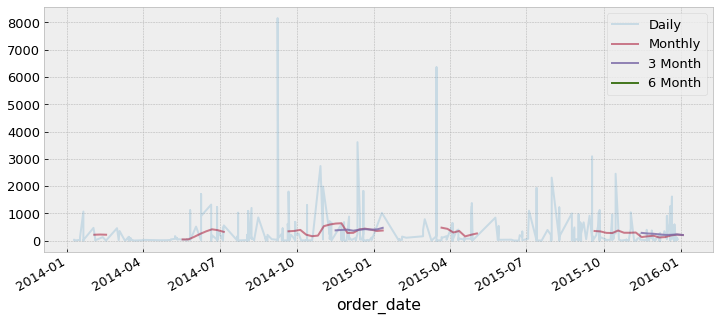

In [96]:
# Y over various periods
consumer_sales.plot(alpha = .2, label='Daily')
consumer_sales.resample('W').mean().rolling(4).mean().plot(alpha=.5, label='Monthly')
consumer_sales.resample('W').mean().rolling(12).mean().plot(alpha=.8, label='3 Month')
consumer_sales.resample('W').mean().rolling(26).mean().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

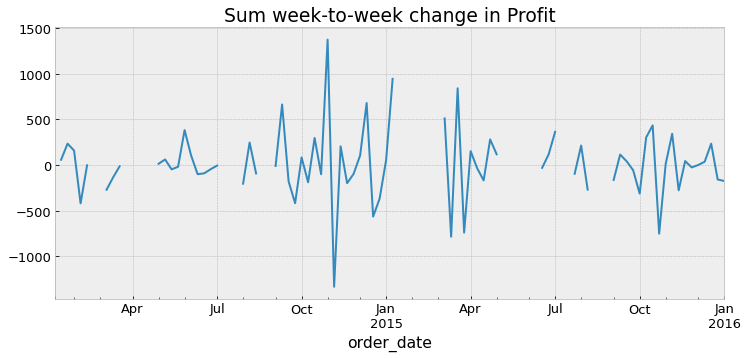

In [97]:
# Change in y week to week
consumer_sales.resample('W').mean().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

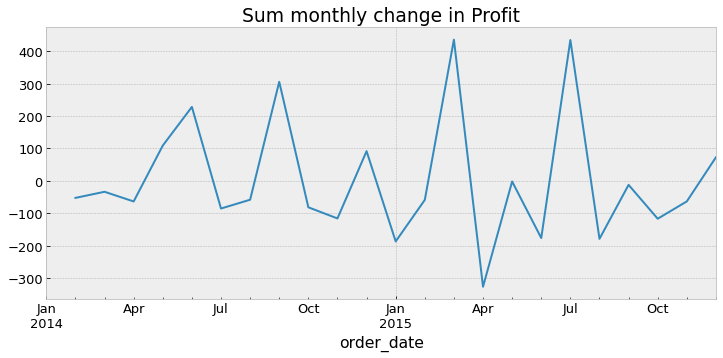

In [98]:
# Change in y month to month
consumer_sales.resample('M').mean().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

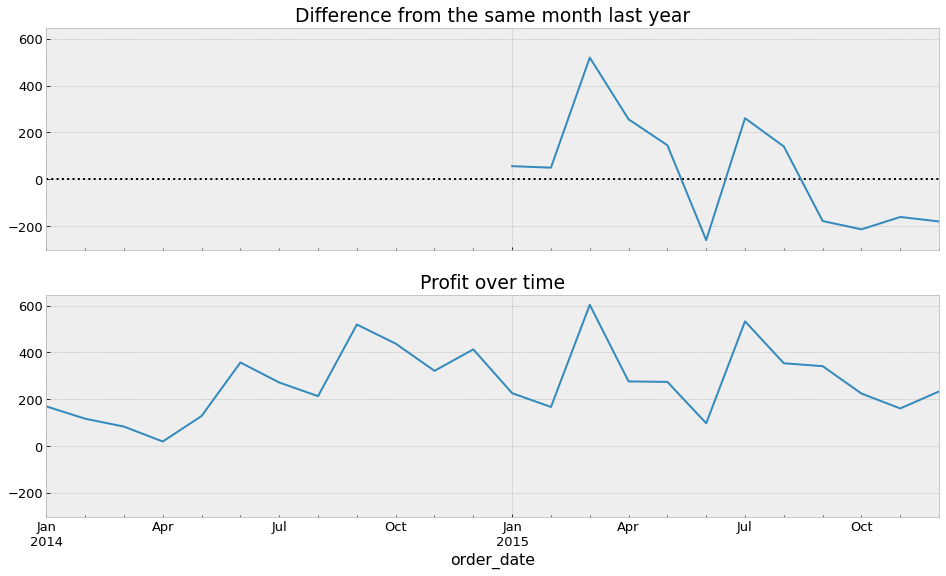

In [99]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = consumer_sales.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

consumer_sales.resample('M').mean().plot(ax=ax2)
ax2.set(title='Profit over time')

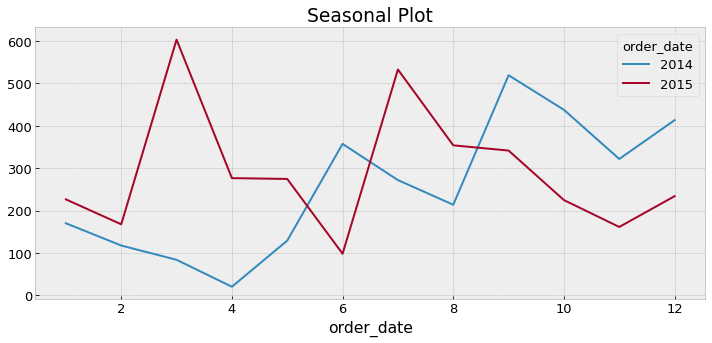

In [100]:
# Seasonal Plot
consumer_sales.groupby([consumer_sales.index.year,consumer_sales.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

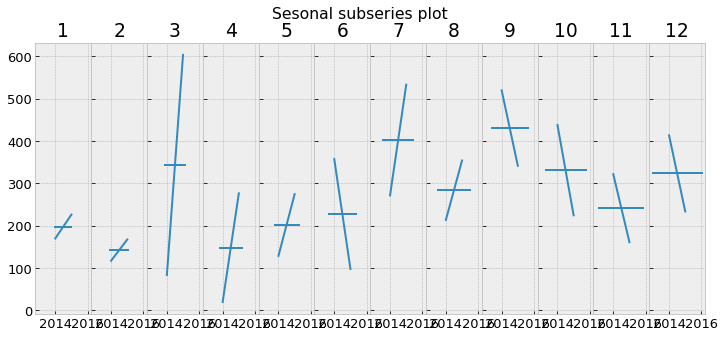

In [101]:
# Seasonal Subseries Plot
table = consumer_sales.groupby([consumer_sales.index.year, consumer_sales.index.month]).mean().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='sales', ylabel='sales'>

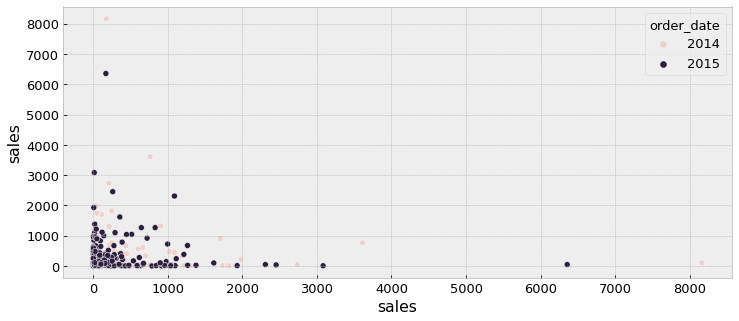

In [102]:
# Lag Plot
sns.scatterplot(x = consumer_sales, y = consumer_sales.shift(-1), hue = consumer_sales.index.year)

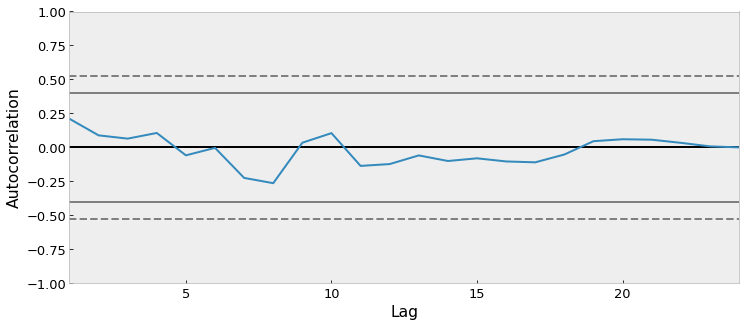

In [103]:
# Autocorrelation
pd.plotting.autocorrelation_plot(consumer_sales.resample('M').mean())
plt.show()

<AxesSubplot:xlabel='order_date'>

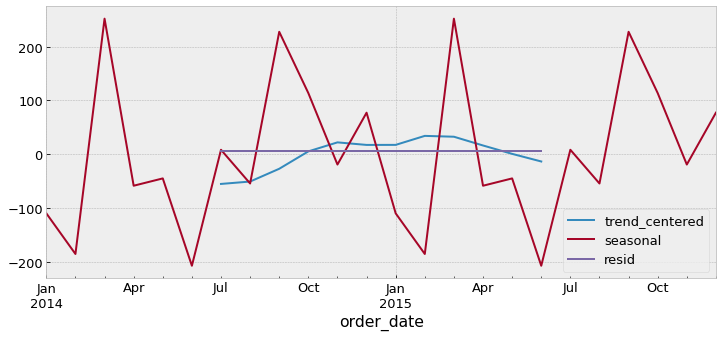

In [104]:
result = sm.tsa.seasonal_decompose(consumer_sales.resample('M').mean())
decomposition = pd.DataFrame({
    'y' : result.observed,
    'trend' : result.trend,
    'seasonal' : result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()

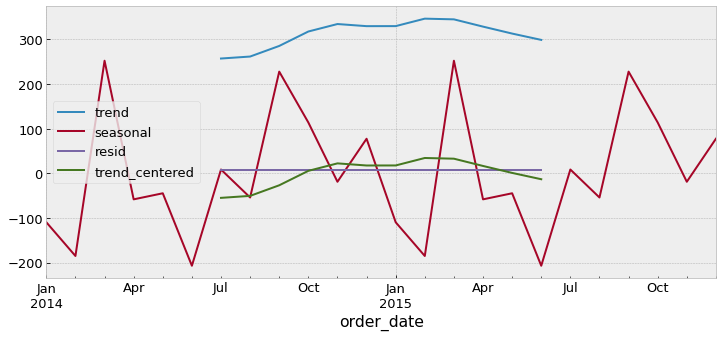

In [105]:
decomposition.iloc[:,1:].plot()
plt.show()

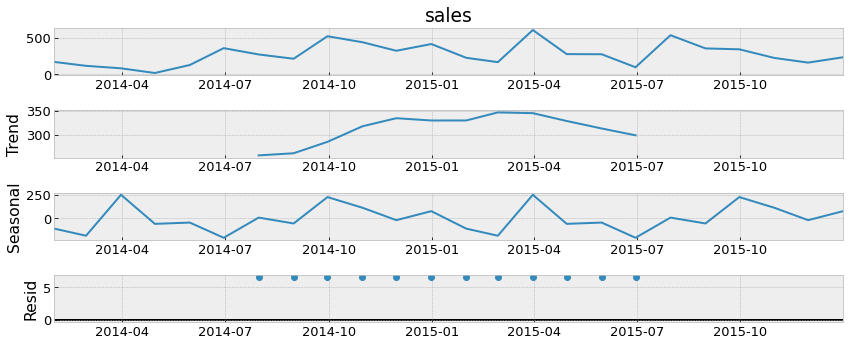

In [106]:
result.plot()
plt.show()

### Corporate

In [107]:
corporate = train[train['segment'] == 'Corporate']
# corporate.head()

#### Profit

In [108]:
corporate_profit = corporate.profit
# corporate_profit.head()

##### Sum

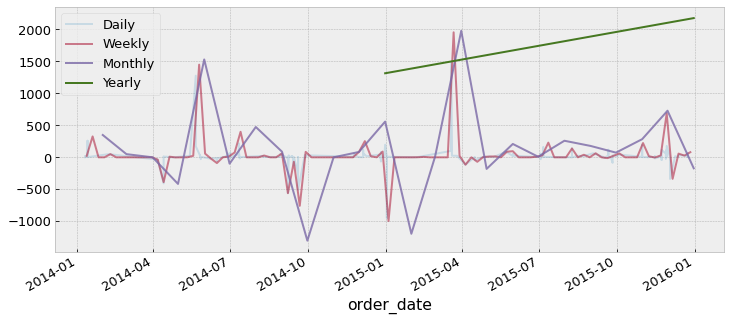

In [109]:
# Y over various periods
corporate_profit.plot(alpha = .2, label='Daily')
corporate_profit.resample('W').sum().plot(alpha=.5, label='Weekly')
corporate_profit.resample('M').sum().plot(alpha=.8, label='Monthly')
corporate_profit.resample('Y').sum().plot(label='Yearly')
plt.legend()

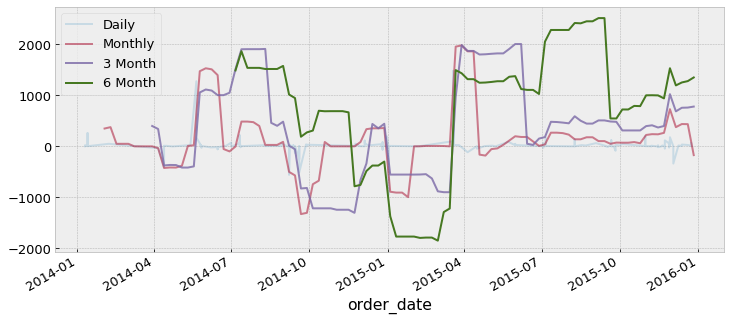

In [110]:
# Y over various periods
corporate_profit.plot(alpha = .2, label='Daily')
corporate_profit.resample('W').sum().rolling(4).sum().plot(alpha=.5, label='Monthly')
corporate_profit.resample('W').sum().rolling(12).sum().plot(alpha=.8, label='3 Month')
corporate_profit.resample('W').sum().rolling(26).sum().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

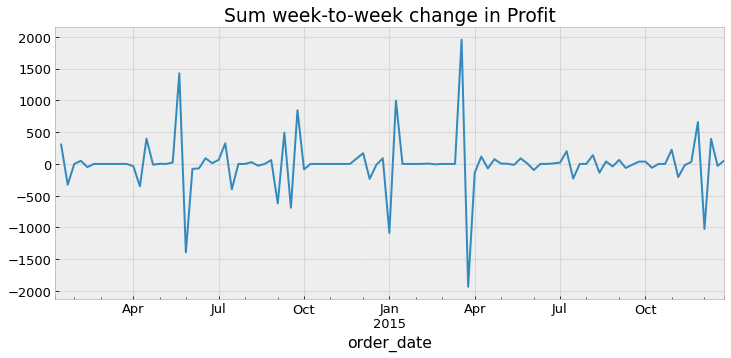

In [111]:
# Change in y week to week
corporate_profit.resample('W').sum().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

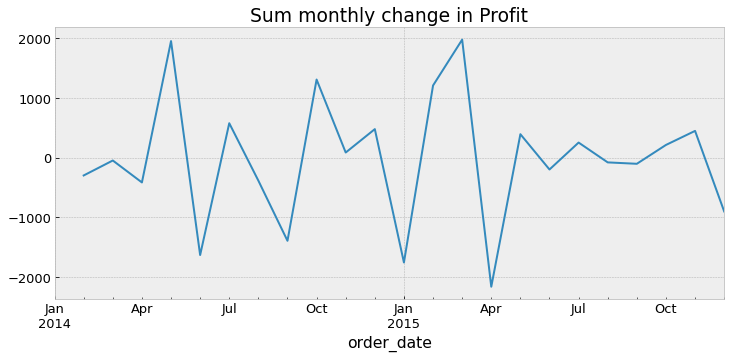

In [112]:
# Change in y month to month
corporate_profit.resample('M').sum().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

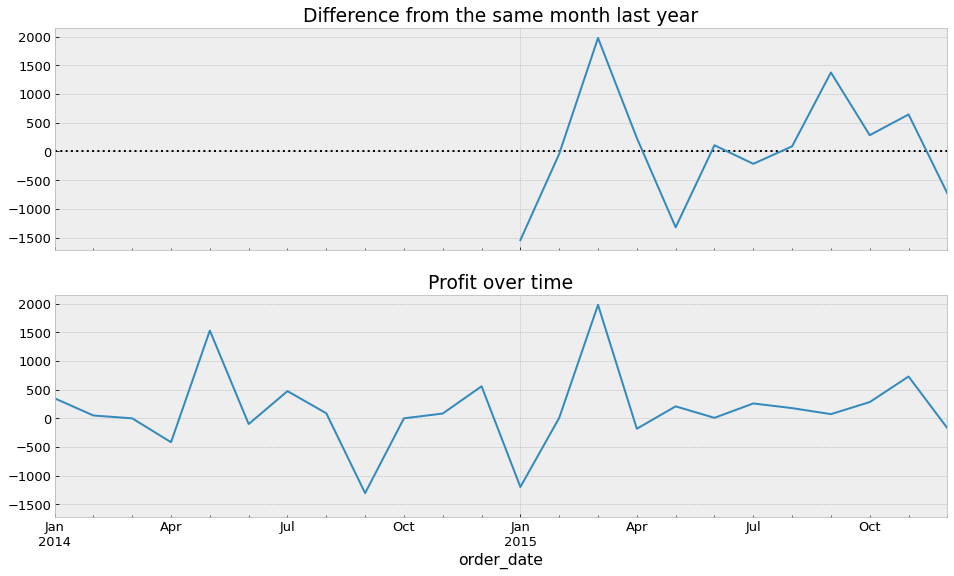

In [113]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = corporate_profit.resample('M').sum().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

corporate_profit.resample('M').sum().plot(ax=ax2)
ax2.set(title='Profit over time')

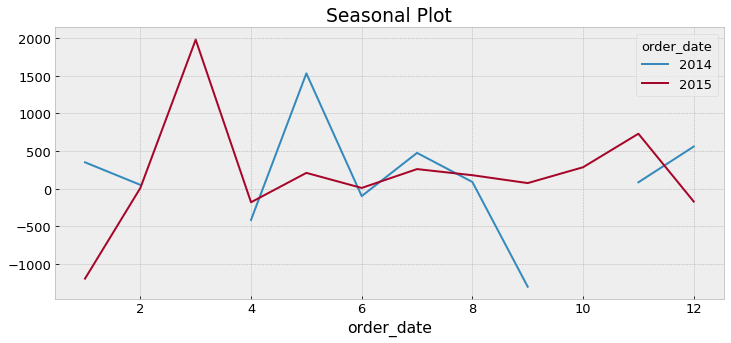

In [114]:
# Seasonal Plot
corporate_profit.groupby([corporate_profit.index.year,corporate_profit.index.month]).sum().unstack(0).plot(title='Seasonal Plot')
plt.show()

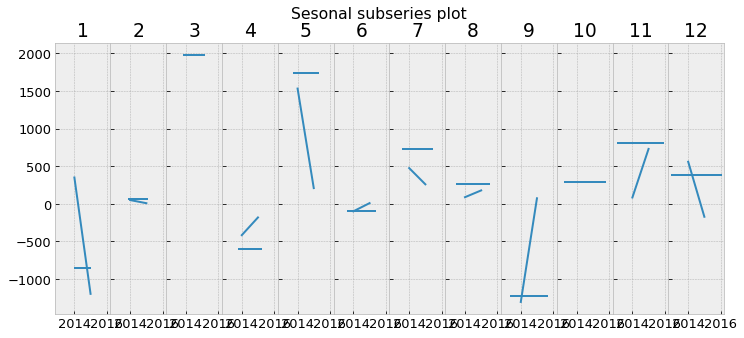

In [115]:
# Seasonal Subseries Plot
table = corporate_profit.groupby([corporate_profit.index.year, corporate_profit.index.month]).sum().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.sum(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='profit', ylabel='profit'>

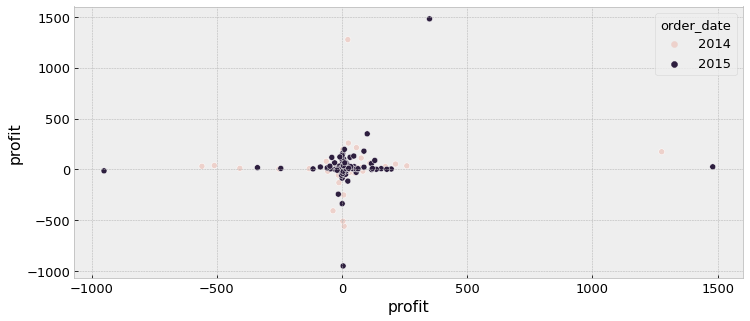

In [116]:
# Lag Plot
sns.scatterplot(x = corporate_profit, y = corporate_profit.shift(-1), hue = corporate_profit.index.year)

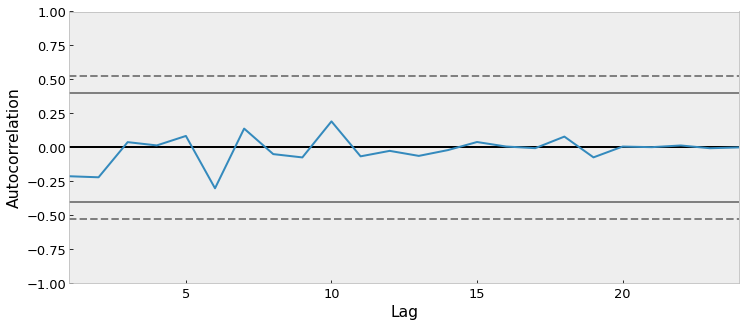

In [117]:
# Autocorrelation
pd.plotting.autocorrelation_plot(corporate_profit.resample('M').sum())
plt.show()

<AxesSubplot:xlabel='order_date'>

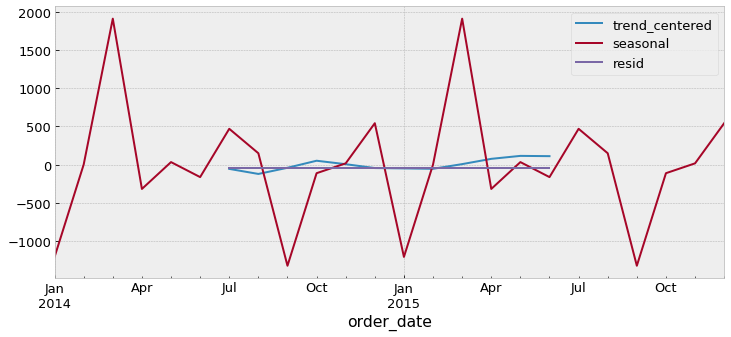

In [118]:
result = sm.tsa.seasonal_decompose(corporate_profit.resample('M').sum())
decomposition = pd.DataFrame({
    'y' : result.observed,
    'trend' : result.trend,
    'seasonal' : result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()

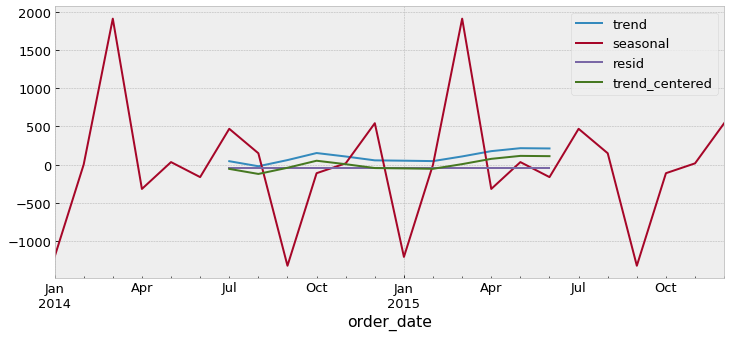

In [119]:
decomposition.iloc[:,1:].plot()
plt.show()

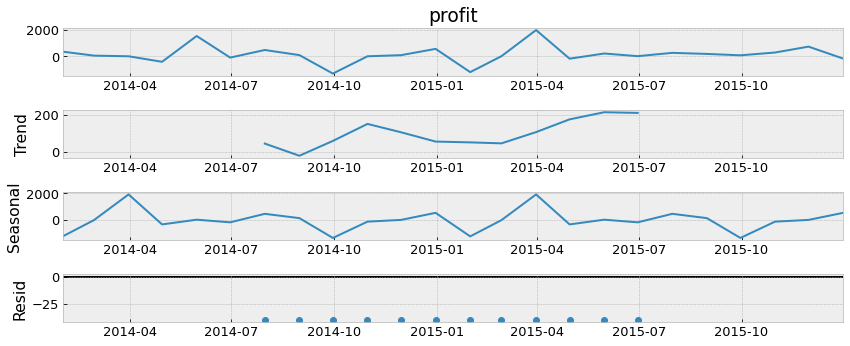

In [120]:
result.plot()
plt.show()

##### Mean

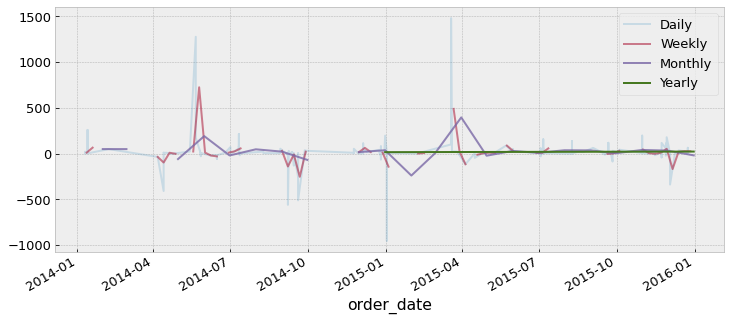

In [121]:
# Y over various periods
corporate_profit.plot(alpha = .2, label='Daily')
corporate_profit.resample('W').mean().plot(alpha=.5, label='Weekly')
corporate_profit.resample('M').mean().plot(alpha=.8, label='Monthly')
corporate_profit.resample('Y').mean().plot(label='Yearly')
plt.legend()

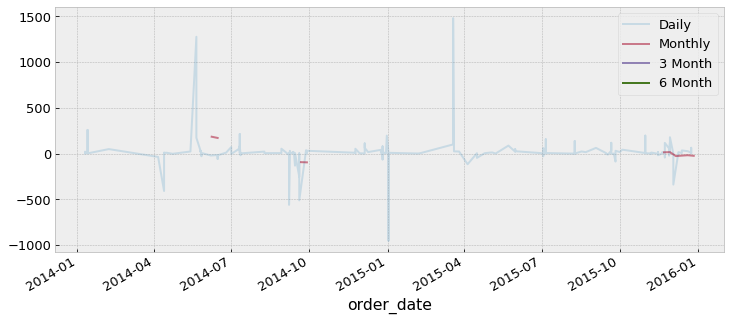

In [122]:
# Y over various periods
corporate_profit.plot(alpha = .2, label='Daily')
corporate_profit.resample('W').mean().rolling(4).mean().plot(alpha=.5, label='Monthly')
corporate_profit.resample('W').mean().rolling(12).mean().plot(alpha=.8, label='3 Month')
corporate_profit.resample('W').mean().rolling(26).mean().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

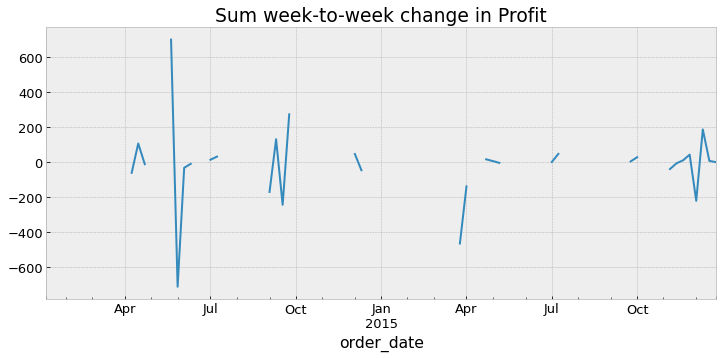

In [123]:
# Change in y week to week
corporate_profit.resample('W').mean().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

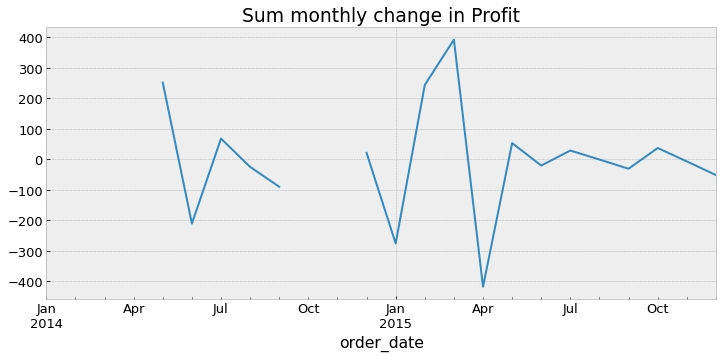

In [124]:
# Change in y month to month
corporate_profit.resample('M').mean().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

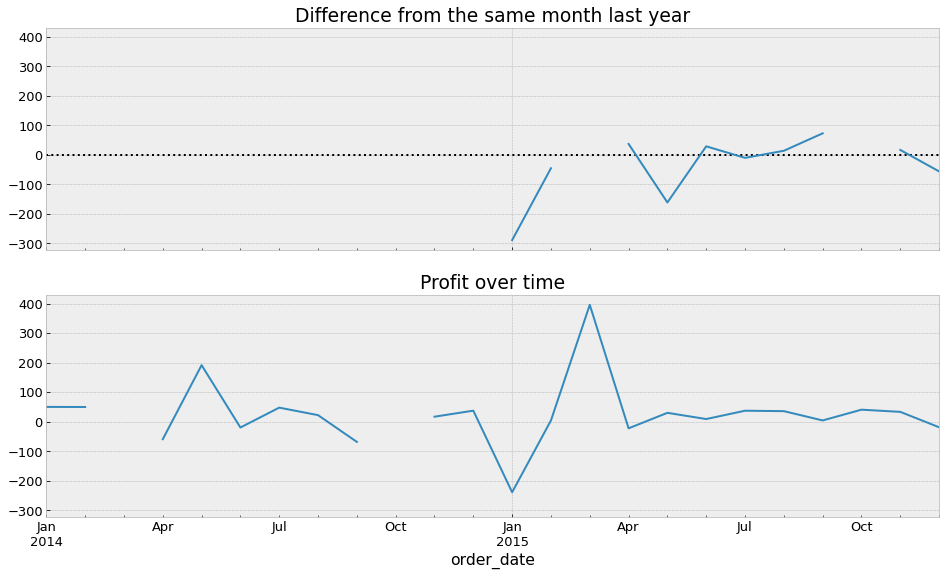

In [125]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = corporate_profit.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

corporate_profit.resample('M').mean().plot(ax=ax2)
ax2.set(title='Profit over time')

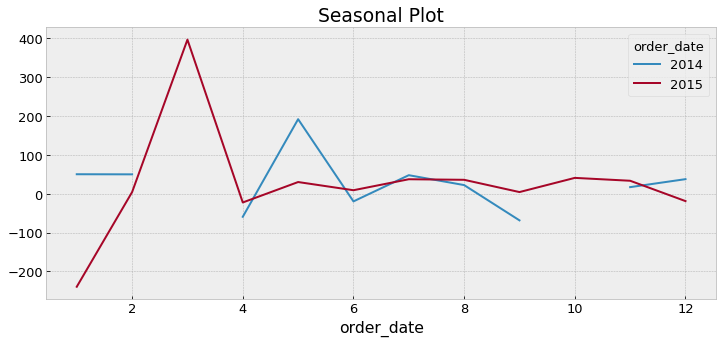

In [126]:
# Seasonal Plot
corporate_profit.groupby([corporate_profit.index.year,corporate_profit.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

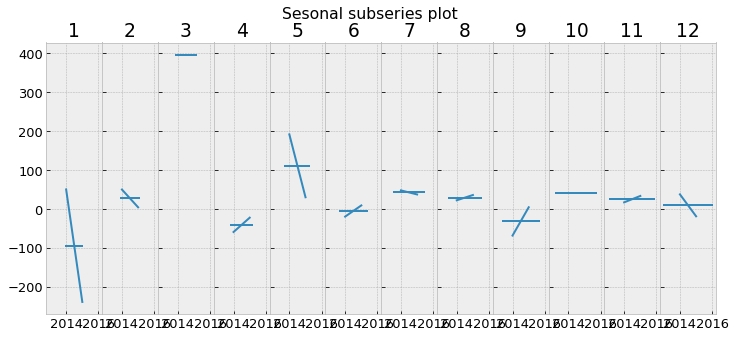

In [127]:
# Seasonal Subseries Plot
table = corporate_profit.groupby([corporate_profit.index.year, corporate_profit.index.month]).mean().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='profit', ylabel='profit'>

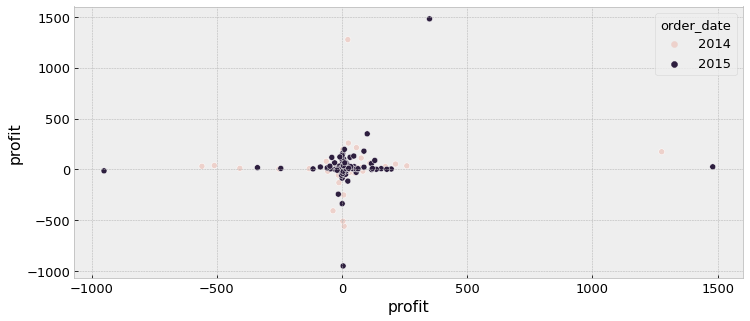

In [128]:
# Lag Plot
sns.scatterplot(x = corporate_profit, y = corporate_profit.shift(-1), hue = corporate_profit.index.year)

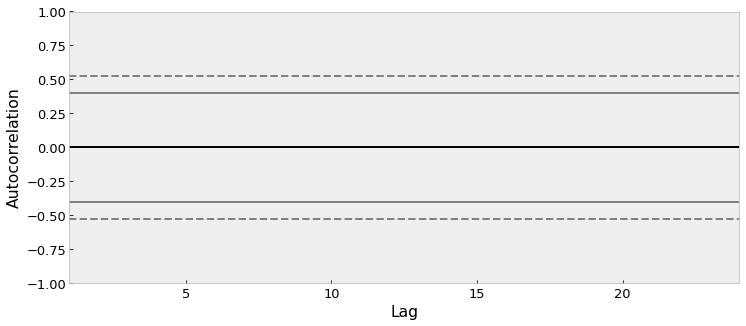

In [129]:
# Autocorrelation
pd.plotting.autocorrelation_plot(corporate_profit.resample('M').mean())
plt.show()

<AxesSubplot:xlabel='order_date'>

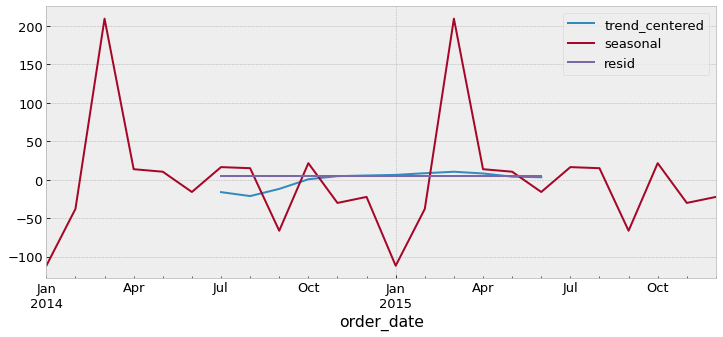

In [130]:
result = sm.tsa.seasonal_decompose(consumer_profit.resample('M').mean())
decomposition = pd.DataFrame({
    'y' : result.observed,
    'trend' : result.trend,
    'seasonal' : result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()

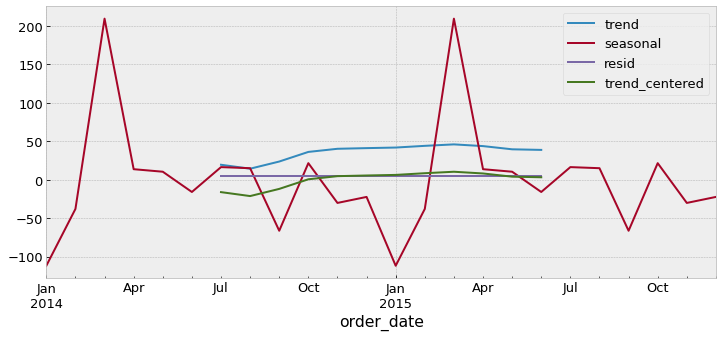

In [131]:
decomposition.iloc[:,1:].plot()
plt.show()

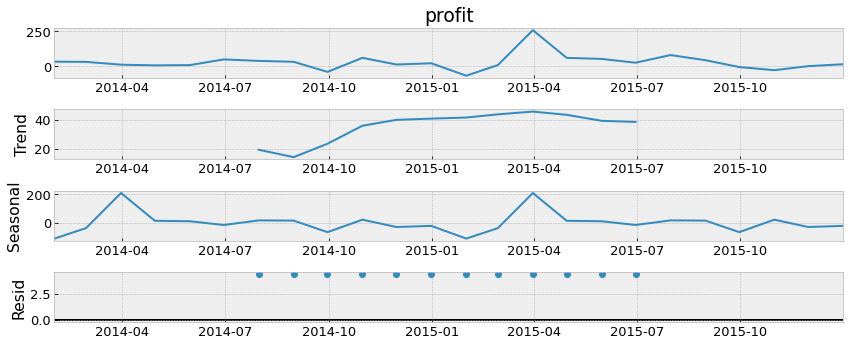

In [132]:
result.plot()
plt.show()

#### Sales

In [133]:
corporate_sales = corporate.sales
# corporate_sales.head()

##### Sum

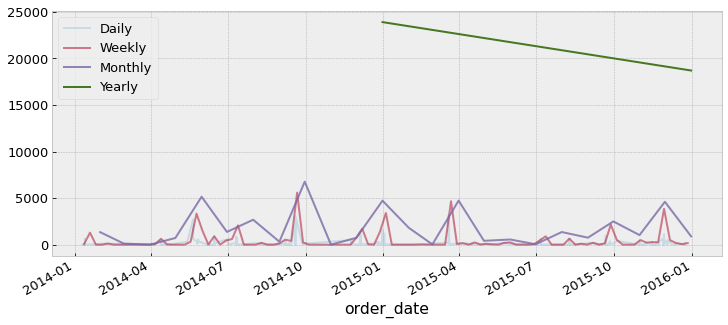

In [134]:
# Y over various periods
corporate_sales.plot(alpha = .2, label='Daily')
corporate_sales.resample('W').sum().plot(alpha=.5, label='Weekly')
corporate_sales.resample('M').sum().plot(alpha=.8, label='Monthly')
corporate_sales.resample('Y').sum().plot(label='Yearly')
plt.legend()

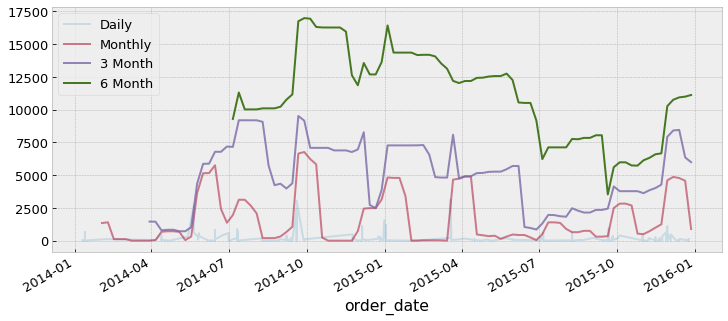

In [135]:
# Y over various periods
corporate_sales.plot(alpha = .2, label='Daily')
corporate_sales.resample('W').sum().rolling(4).sum().plot(alpha=.5, label='Monthly')
corporate_sales.resample('W').sum().rolling(12).sum().plot(alpha=.8, label='3 Month')
corporate_sales.resample('W').sum().rolling(26).sum().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

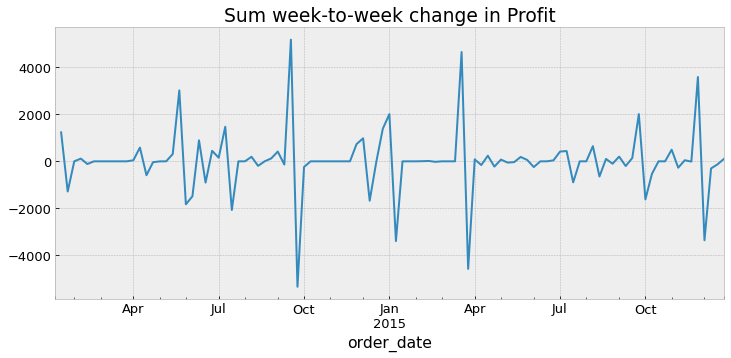

In [136]:
# Change in y week to week
corporate_sales.resample('W').sum().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

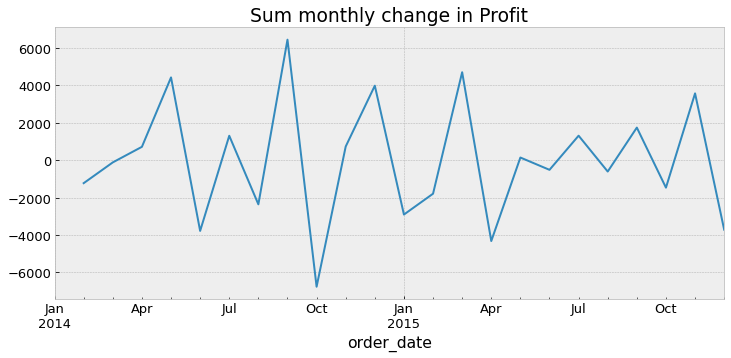

In [137]:
# Change in y month to month
corporate_sales.resample('M').sum().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

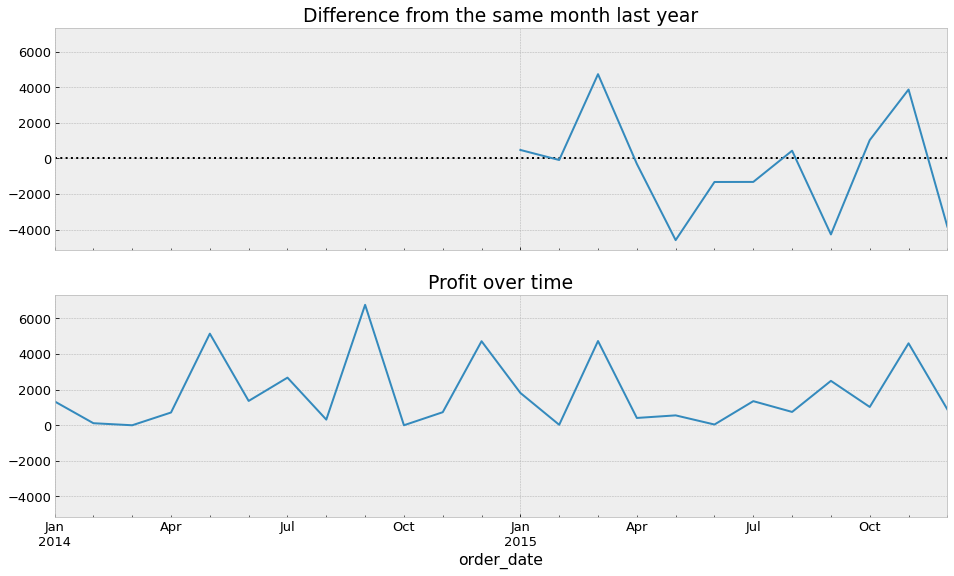

In [138]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = corporate_sales.resample('M').sum().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

corporate_sales.resample('M').sum().plot(ax=ax2)
ax2.set(title='Profit over time')

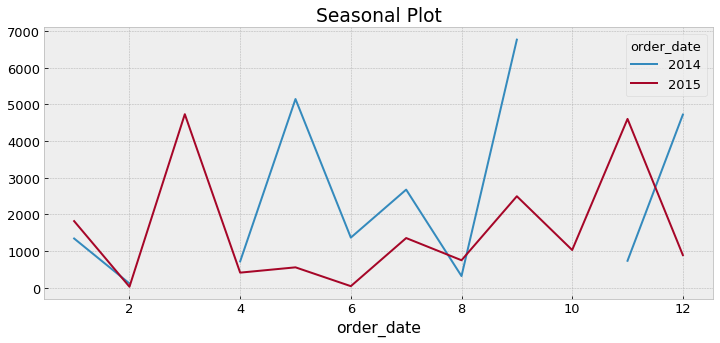

In [139]:
# Seasonal Plot
corporate_sales.groupby([corporate_sales.index.year,corporate_sales.index.month]).sum().unstack(0).plot(title='Seasonal Plot')
plt.show()

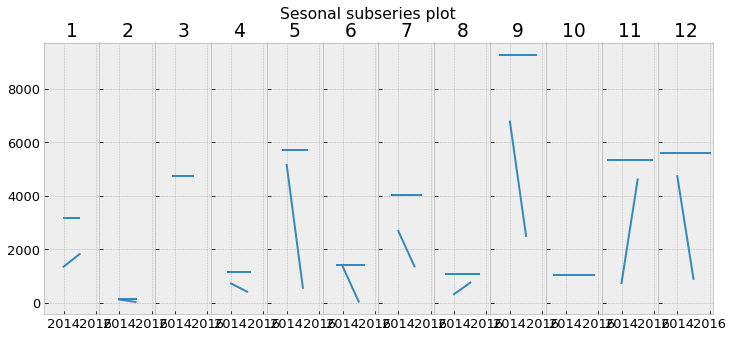

In [140]:
# Seasonal Subseries Plot
table = corporate_sales.groupby([corporate_sales.index.year, corporate_sales.index.month]).sum().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.sum(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='sales', ylabel='sales'>

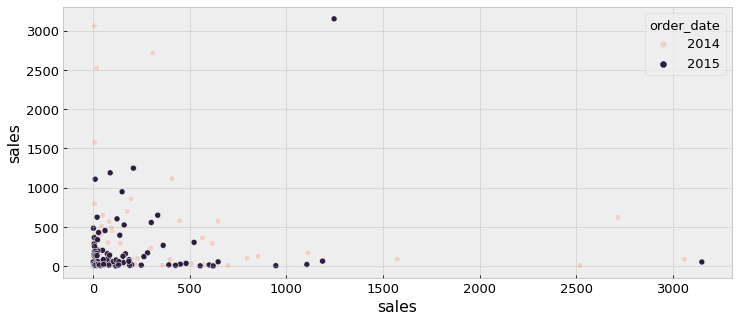

In [141]:
# Lag Plot
sns.scatterplot(x = corporate_sales, y = corporate_sales.shift(-1), hue = corporate_sales.index.year)

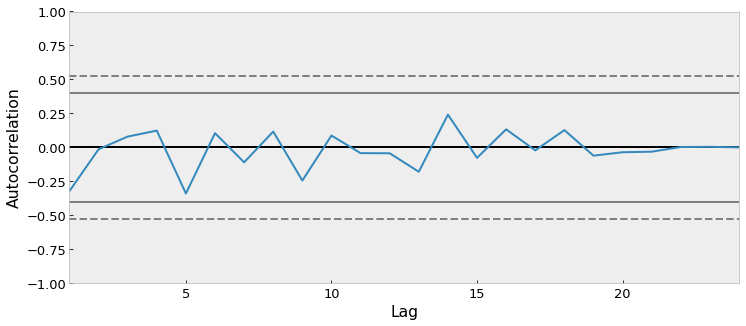

In [142]:
# Autocorrelation
pd.plotting.autocorrelation_plot(corporate_sales.resample('M').sum())
plt.show()

<AxesSubplot:xlabel='order_date'>

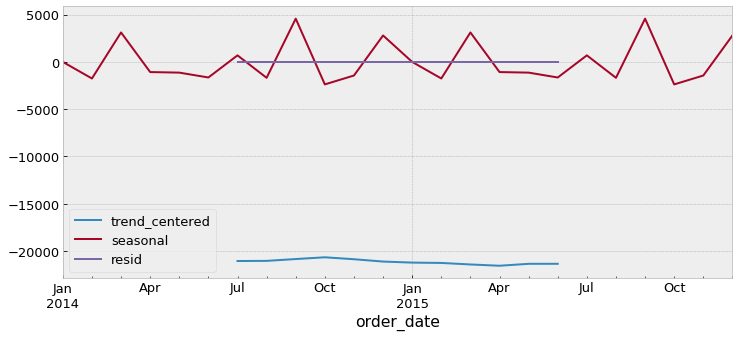

In [143]:
result = sm.tsa.seasonal_decompose(corporate_sales.resample('M').sum())
decomposition = pd.DataFrame({
    'y' : result.observed,
    'trend' : result.trend,
    'seasonal' : result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.sum()
decomposition[['trend_centered','seasonal','resid']].plot()

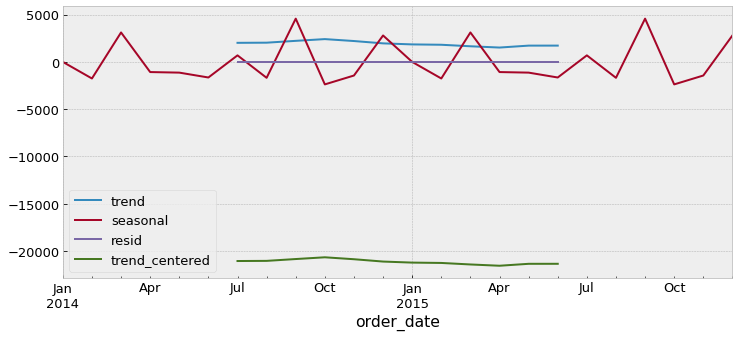

In [144]:
decomposition.iloc[:,1:].plot()
plt.show()

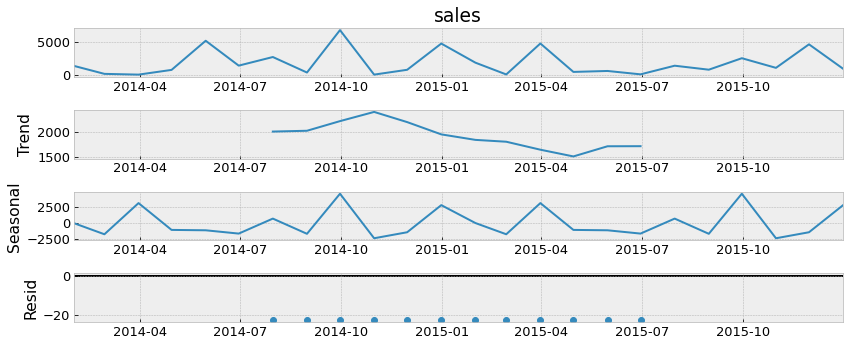

In [145]:
result.plot()
plt.show()

##### Mean

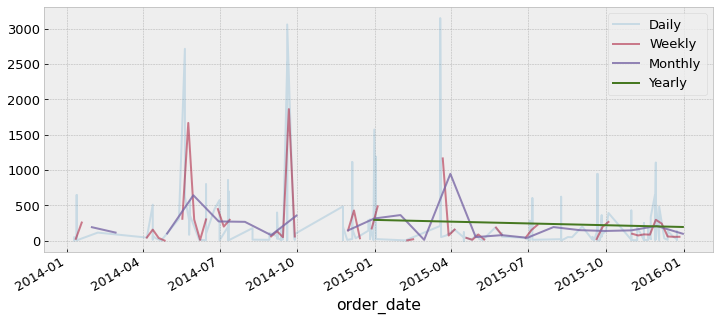

In [146]:
# Y over various periods
corporate_sales.plot(alpha = .2, label='Daily')
corporate_sales.resample('W').mean().plot(alpha=.5, label='Weekly')
corporate_sales.resample('M').mean().plot(alpha=.8, label='Monthly')
corporate_sales.resample('Y').mean().plot(label='Yearly')
plt.legend()

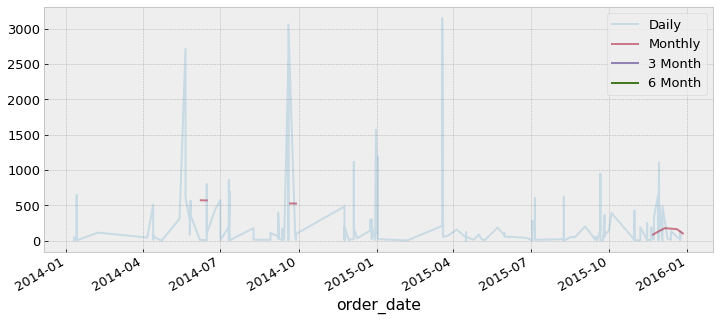

In [147]:
# Y over various periods
corporate_sales.plot(alpha = .2, label='Daily')
corporate_sales.resample('W').mean().rolling(4).mean().plot(alpha=.5, label='Monthly')
corporate_sales.resample('W').mean().rolling(12).mean().plot(alpha=.8, label='3 Month')
corporate_sales.resample('W').mean().rolling(26).mean().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

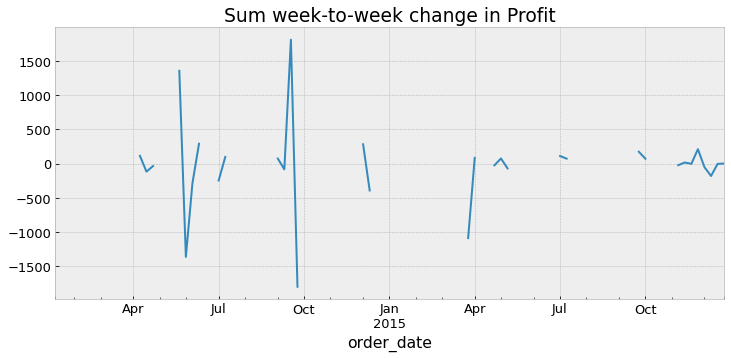

In [148]:
# Change in y week to week
corporate_sales.resample('W').mean().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

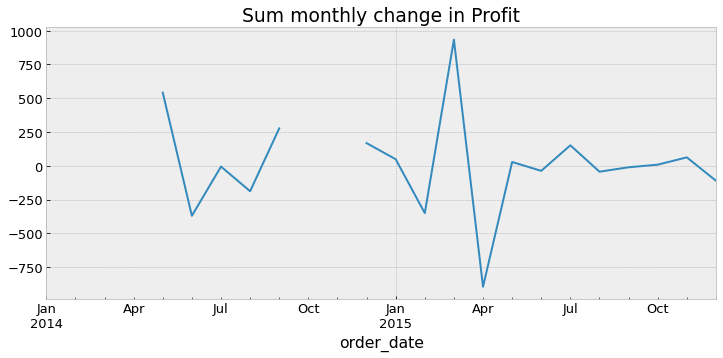

In [149]:
# Change in y month to month
corporate_sales.resample('M').mean().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

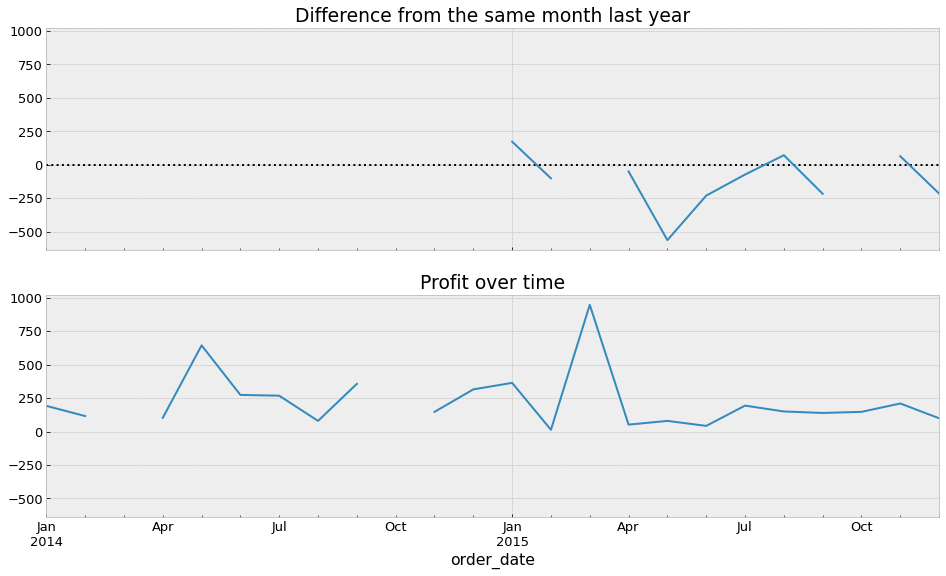

In [150]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = corporate_sales.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

corporate_sales.resample('M').mean().plot(ax=ax2)
ax2.set(title='Profit over time')

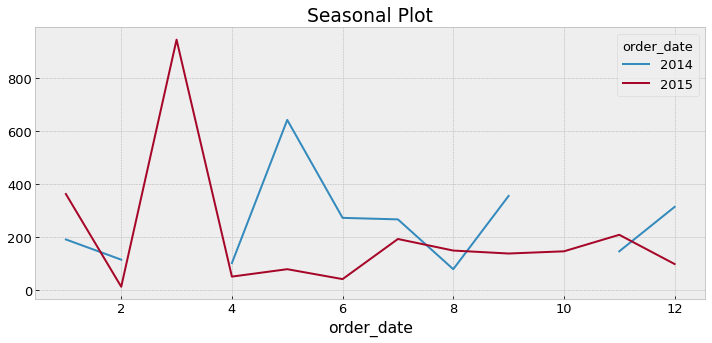

In [151]:
# Seasonal Plot
corporate_sales.groupby([corporate_sales.index.year,corporate_sales.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

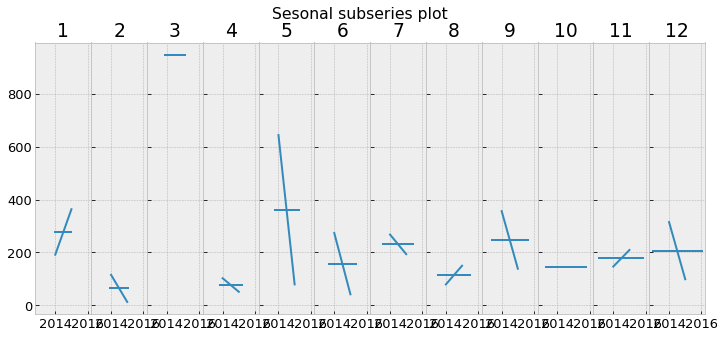

In [152]:
# Seasonal Subseries Plot
table = corporate_sales.groupby([corporate_sales.index.year, corporate_sales.index.month]).mean().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='sales', ylabel='sales'>

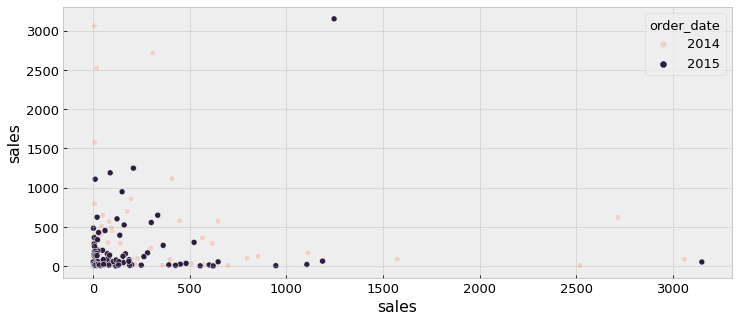

In [153]:
# Lag Plot
sns.scatterplot(x = corporate_sales, y = corporate_sales.shift(-1), hue = corporate_sales.index.year)

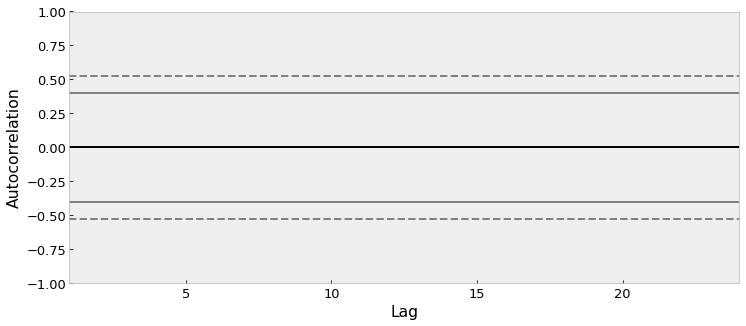

In [154]:
# Autocorrelation
pd.plotting.autocorrelation_plot(corporate_sales.resample('M').mean())
plt.show()

In [155]:
# result = sm.tsa.seasonal_decompose(corporate_sales.resample('Y').mean())
# decomposition = pd.DataFrame({
#     'y' : result.observed,
#     'trend' : result.trend,
#     'seasonal' : result.seasonal,
#     'resid': result.resid,
# })
# decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
# decomposition[['trend_centered','seasonal','resid']].plot()

In [156]:
# decomposition.iloc[:,1:].plot()
# plt.show()

In [157]:
# result.plot()
# plt.show()

### Home Office

In [158]:
home_office = train[train['segment'] == 'Home Office']
# home_office.head()

#### Profit

In [159]:
home_office_profit = home_office.profit
# home_office_profit.head()

##### Sum

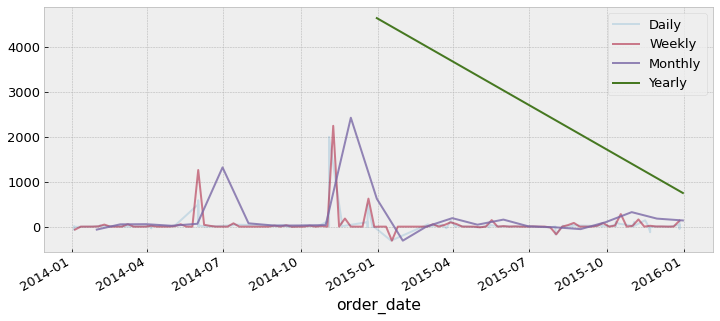

In [160]:
# Y over various periods
home_office_profit.plot(alpha = .2, label='Daily')
home_office_profit.resample('W').sum().plot(alpha=.5, label='Weekly')
home_office_profit.resample('M').sum().plot(alpha=.8, label='Monthly')
home_office_profit.resample('Y').sum().plot(label='Yearly')
plt.legend()

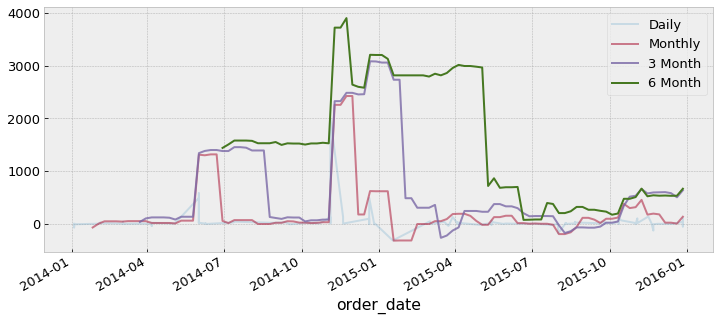

In [161]:
# Y over various periods
home_office_profit.plot(alpha = .2, label='Daily')
home_office_profit.resample('W').sum().rolling(4).sum().plot(alpha=.5, label='Monthly')
home_office_profit.resample('W').sum().rolling(12).sum().plot(alpha=.8, label='3 Month')
home_office_profit.resample('W').sum().rolling(26).sum().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

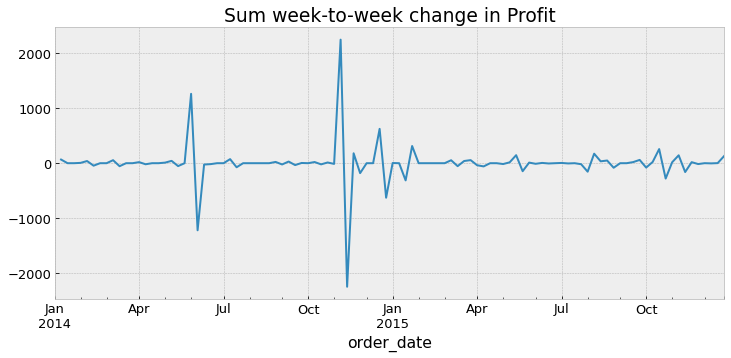

In [162]:
# Change in y week to week
home_office_profit.resample('W').sum().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

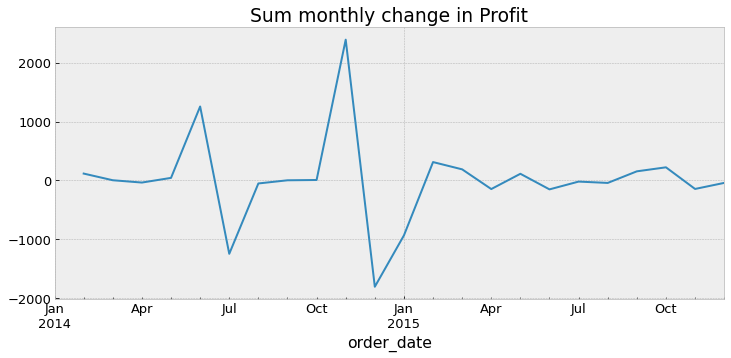

In [163]:
# Change in y month to month
home_office_profit.resample('M').sum().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

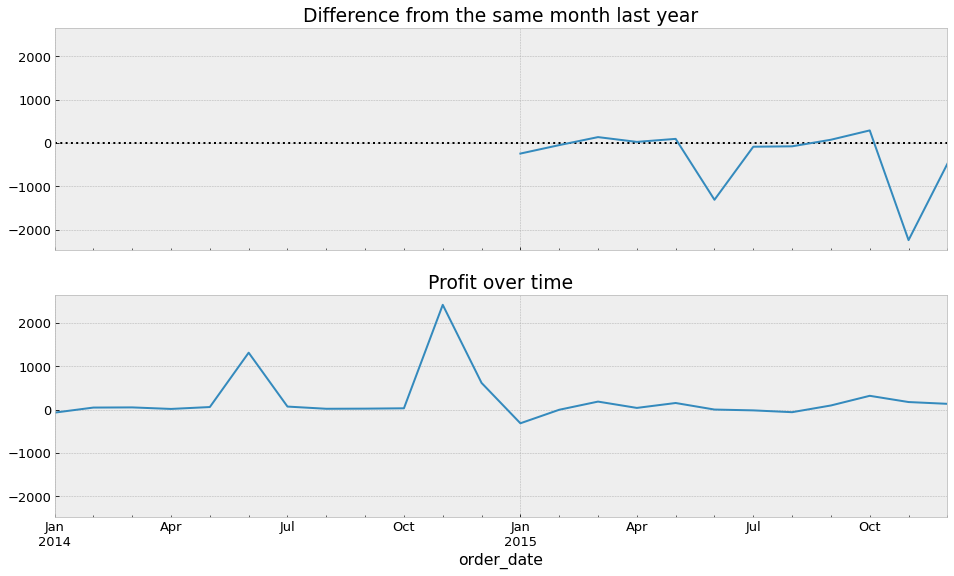

In [164]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = home_office_profit.resample('M').sum().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

home_office_profit.resample('M').sum().plot(ax=ax2)
ax2.set(title='Profit over time')

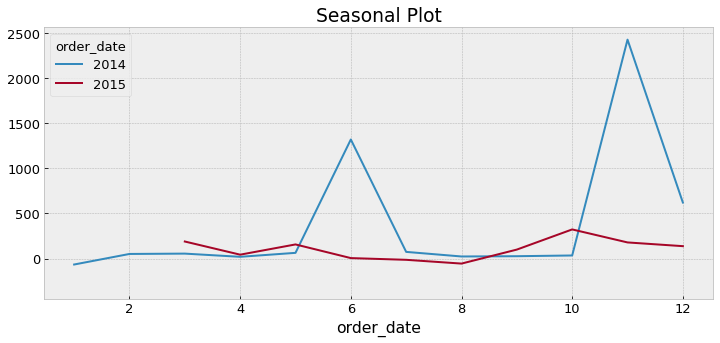

In [165]:
# Seasonal Plot
home_office_profit.groupby([home_office_profit.index.year,home_office_profit.index.month]).sum().unstack(0).plot(title='Seasonal Plot')
plt.show()

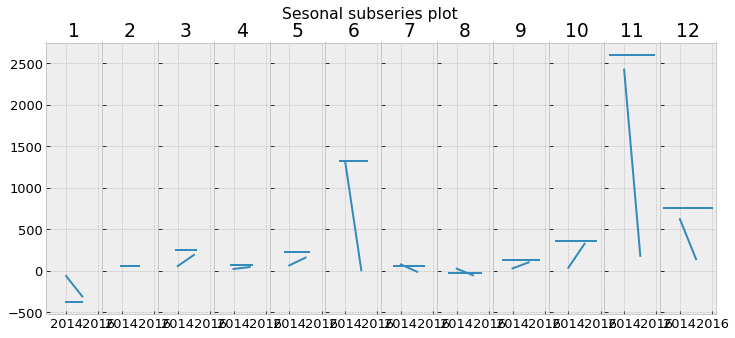

In [166]:
# Seasonal Subseries Plot
table = home_office_profit.groupby([home_office_profit.index.year, home_office_profit.index.month]).sum().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.sum(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='profit', ylabel='profit'>

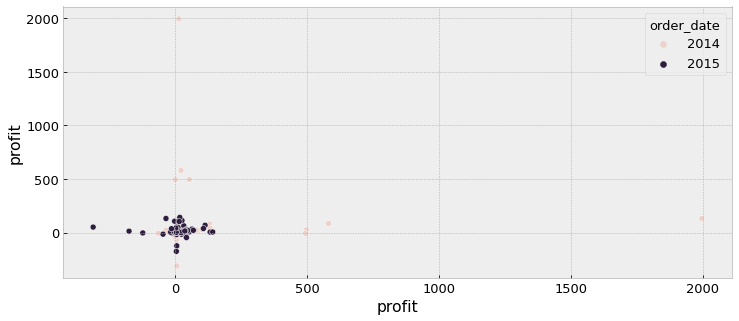

In [167]:
# Lag Plot
sns.scatterplot(x = home_office_profit, y = home_office_profit.shift(-1), hue = home_office_profit.index.year)

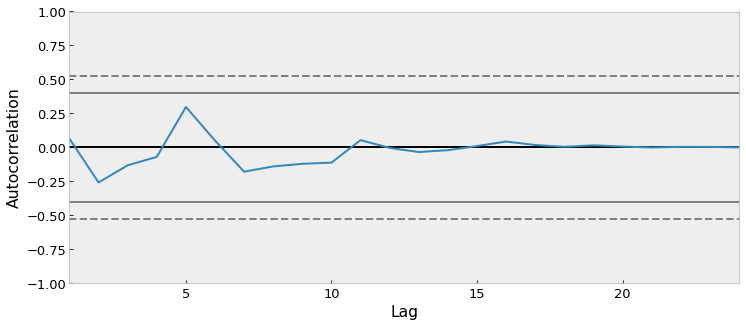

In [168]:
# Autocorrelation
pd.plotting.autocorrelation_plot(home_office_profit.resample('M').sum())
plt.show()

<AxesSubplot:xlabel='order_date'>

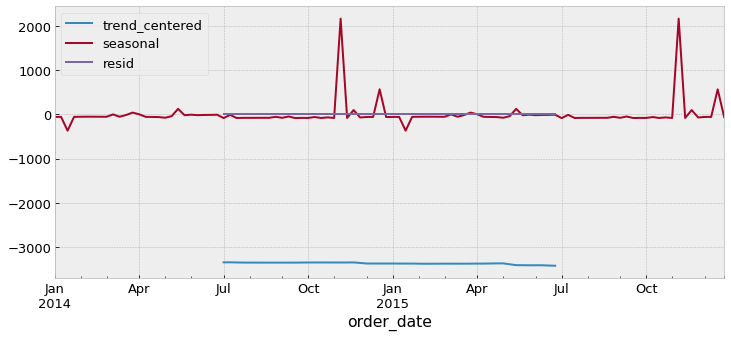

In [169]:
result = sm.tsa.seasonal_decompose(home_office_profit.resample('W').sum())
decomposition = pd.DataFrame({
    'y' : result.observed,
    'trend' : result.trend,
    'seasonal' : result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.sum()
decomposition[['trend_centered','seasonal','resid']].plot()

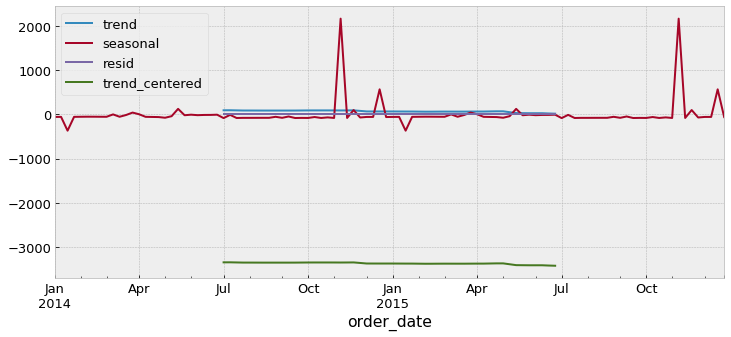

In [170]:
decomposition.iloc[:,1:].plot()
plt.show()

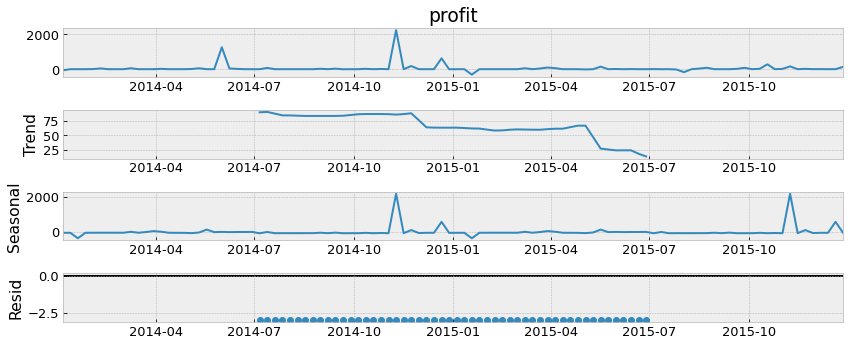

In [171]:
result.plot()
plt.show()

##### Mean

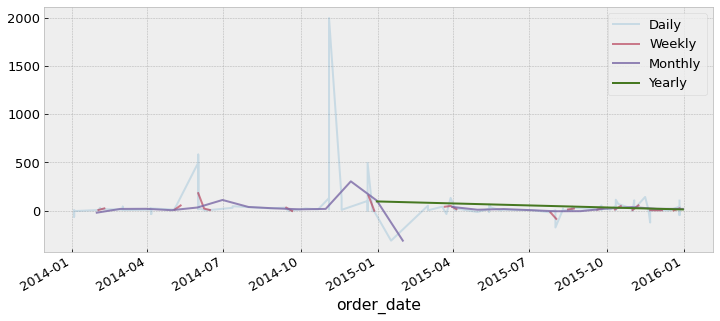

In [172]:
# Y over various periods
home_office_profit.plot(alpha = .2, label='Daily')
home_office_profit.resample('W').mean().plot(alpha=.5, label='Weekly')
home_office_profit.resample('M').mean().plot(alpha=.8, label='Monthly')
home_office_profit.resample('Y').mean().plot(label='Yearly')
plt.legend()

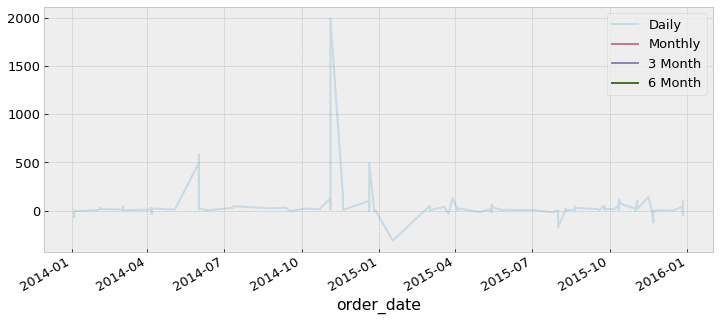

In [173]:
# Y over various periods
home_office_profit.plot(alpha = .2, label='Daily')
home_office_profit.resample('W').mean().rolling(4).mean().plot(alpha=.5, label='Monthly')
home_office_profit.resample('W').mean().rolling(12).mean().plot(alpha=.8, label='3 Month')
home_office_profit.resample('W').mean().rolling(26).mean().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

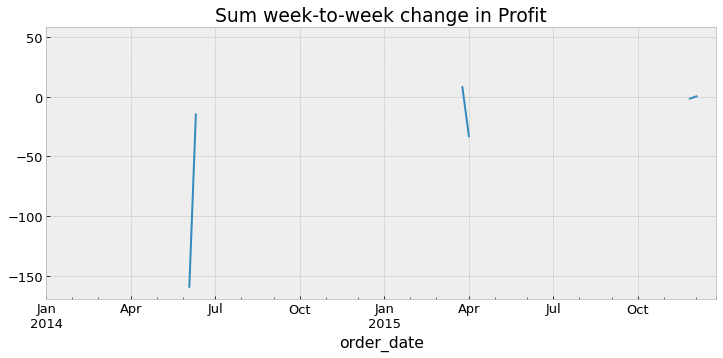

In [174]:
# Change in y week to week
home_office_profit.resample('W').mean().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

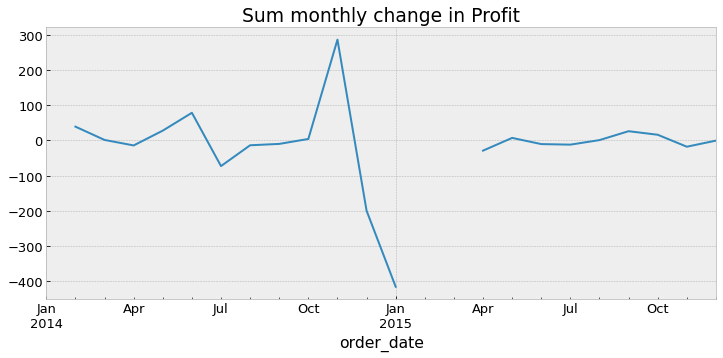

In [175]:
# Change in y month to month
home_office_profit.resample('M').mean().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

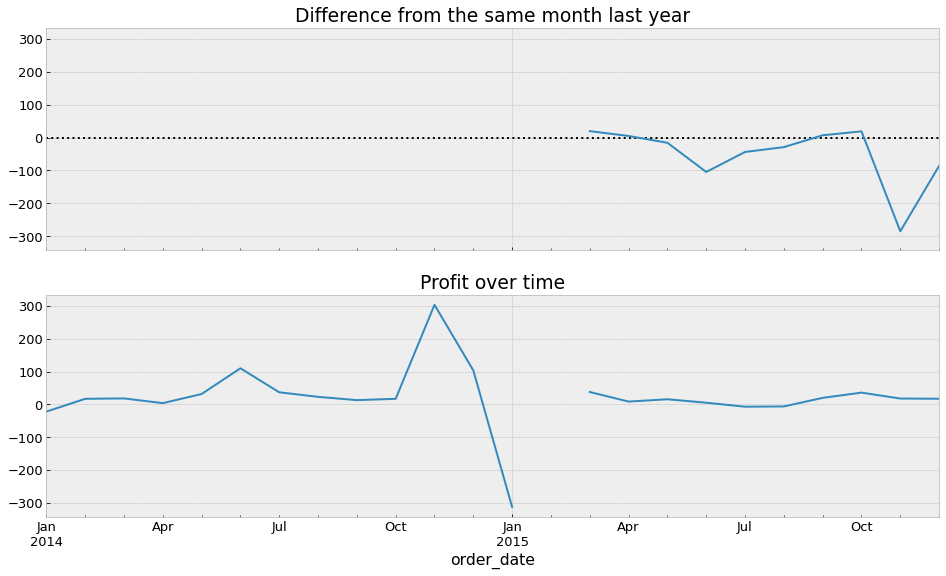

In [176]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = home_office_profit.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

home_office_profit.resample('M').mean().plot(ax=ax2)
ax2.set(title='Profit over time')

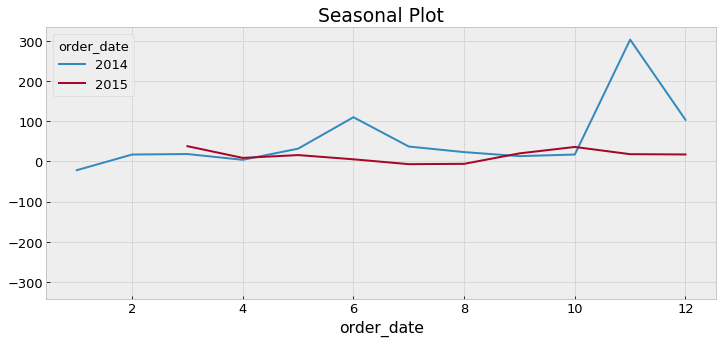

In [177]:
# Seasonal Plot
home_office_profit.groupby([home_office_profit.index.year,home_office_profit.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

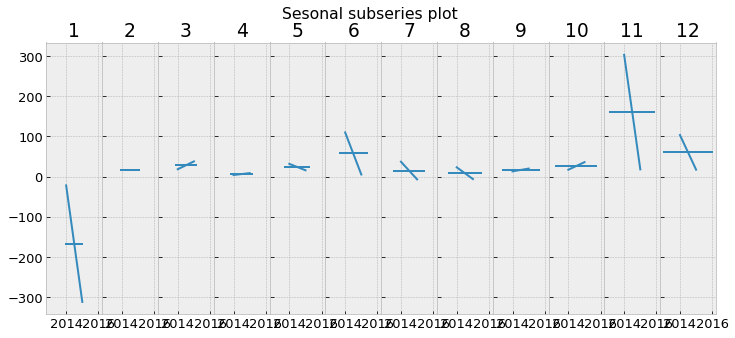

In [178]:
# Seasonal Subseries Plot
table = home_office_profit.groupby([home_office_profit.index.year, home_office_profit.index.month]).mean().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='profit', ylabel='profit'>

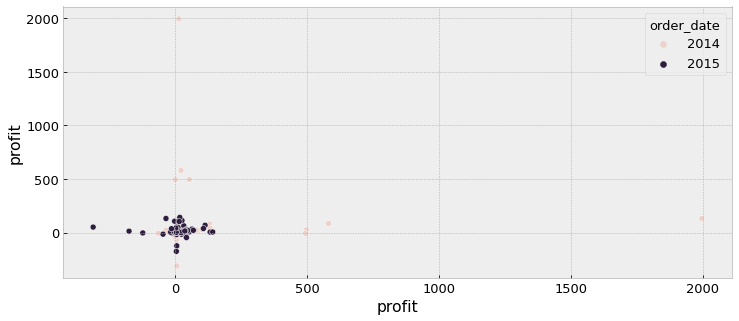

In [179]:
# Lag Plot
sns.scatterplot(x = home_office_profit, y = home_office_profit.shift(-1), hue = home_office_profit.index.year)

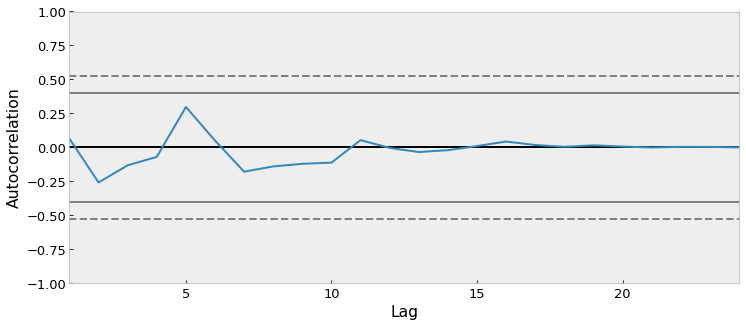

In [180]:
# Autocorrelation
pd.plotting.autocorrelation_plot(home_office_profit.resample('M').sum())
plt.show()

In [181]:
# result = sm.tsa.seasonal_decompose(home_office_profit.resample('W').mean())
# decomposition = pd.DataFrame({
#     'y' : result.observed,
#     'trend' : result.trend,
#     'seasonal' : result.seasonal,
#     'resid': result.resid,
# })
# decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
# decomposition[['trend_centered','seasonal','resid']].plot()

In [182]:
# decomposition.iloc[:,1:].plot()
# plt.show()

In [183]:
# result.plot()
# plt.show()

#### Sales

In [184]:
home_office_sales = home_office.sales
# home_office_sales.head()

##### Sum

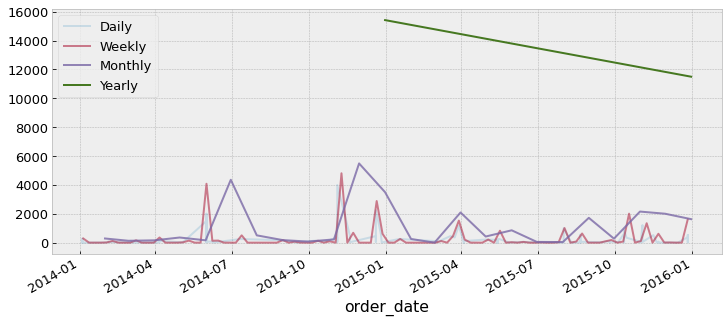

In [185]:
# Y over various periods
home_office_sales.plot(alpha = .2, label='Daily')
home_office_sales.resample('W').sum().plot(alpha=.5, label='Weekly')
home_office_sales.resample('M').sum().plot(alpha=.8, label='Monthly')
home_office_sales.resample('Y').sum().plot(label='Yearly')
plt.legend()

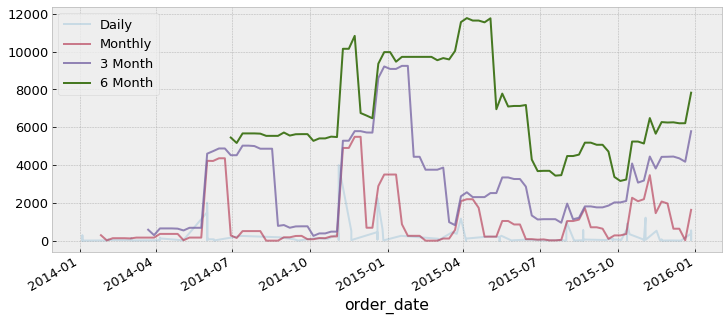

In [186]:
# Y over various periods
home_office_sales.plot(alpha = .2, label='Daily')
home_office_sales.resample('W').sum().rolling(4).sum().plot(alpha=.5, label='Monthly')
home_office_sales.resample('W').sum().rolling(12).sum().plot(alpha=.8, label='3 Month')
home_office_sales.resample('W').sum().rolling(26).sum().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Profit'}, xlabel='order_date'>

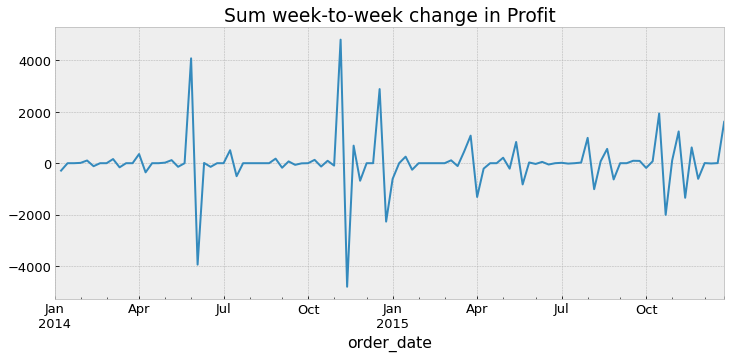

In [187]:
# Change in y week to week
home_office_sales.resample('W').sum().diff().plot(title='Sum week-to-week change in Profit')

<AxesSubplot:title={'center':'Sum monthly change in Profit'}, xlabel='order_date'>

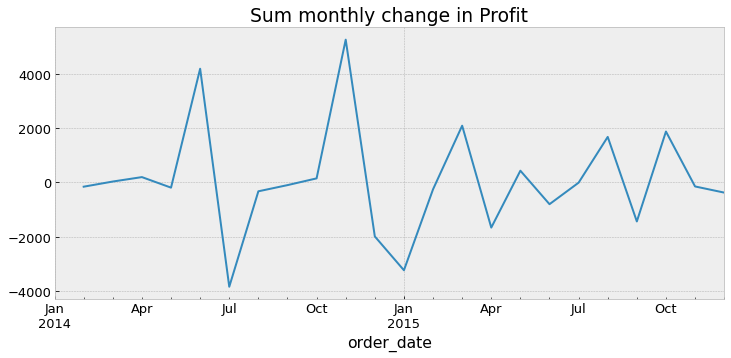

In [188]:
# Change in y month to month
home_office_sales.resample('M').sum().diff().plot(title='Sum monthly change in Profit')

[Text(0.5, 1.0, 'Profit over time')]

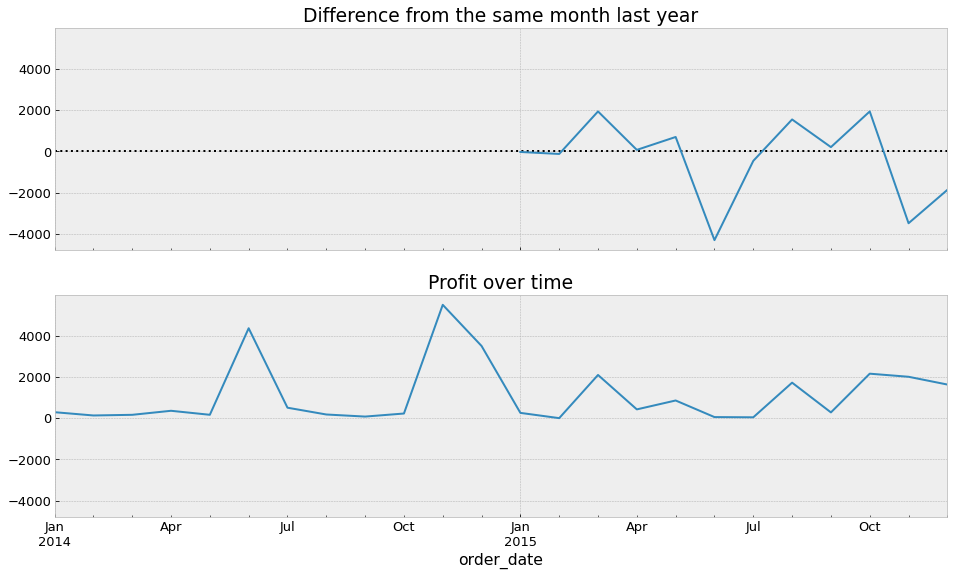

In [189]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = home_office_sales.resample('M').sum().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

home_office_sales.resample('M').sum().plot(ax=ax2)
ax2.set(title='Profit over time')

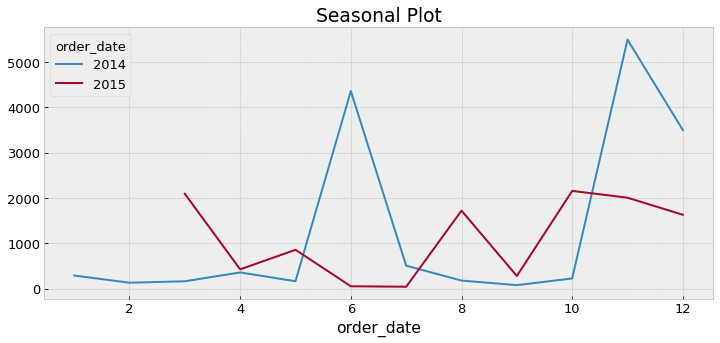

In [190]:
# Seasonal Plot
home_office_sales.groupby([home_office_sales.index.year,home_office_sales.index.month]).sum().unstack(0).plot(title='Seasonal Plot')
plt.show()

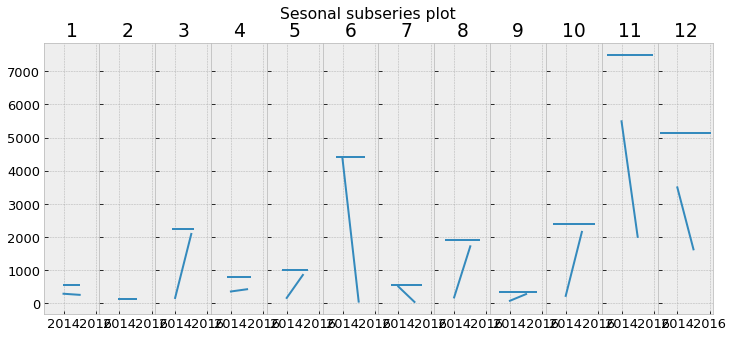

In [191]:
# Seasonal Subseries Plot
table = home_office_sales.groupby([home_office_sales.index.year, home_office_sales.index.month]).sum().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.sum(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='sales', ylabel='sales'>

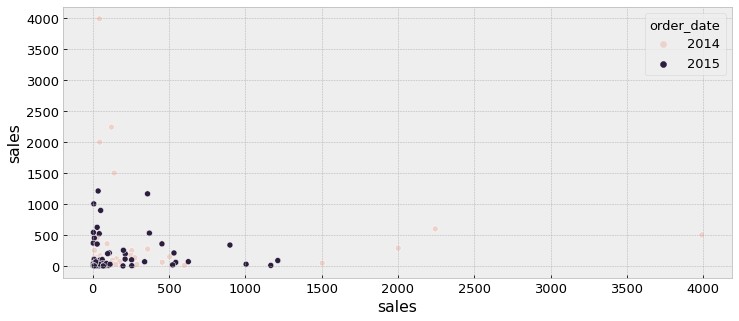

In [192]:
# Lag Plot
sns.scatterplot(x = home_office_sales, y = home_office_sales.shift(-1), hue = home_office_sales.index.year)

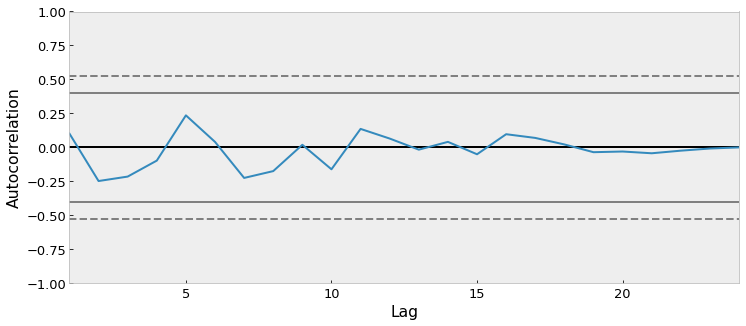

In [193]:
# Autocorrelation
pd.plotting.autocorrelation_plot(home_office_sales.resample('M').sum())
plt.show()

In [194]:
# result = sm.tsa.seasonal_decompose(home_office_sales.resample('Y').sum())
# decomposition = pd.DataFrame({
#     'y' : result.observed,
#     'trend' : result.trend,
#     'seasonal' : result.seasonal,
#     'resid': result.resid,
# })
# decomposition['trend_centered'] = decomposition.trend - decomposition.trend.sum()
# decomposition[['trend_centered','seasonal','resid']].plot()

In [195]:
# decomposition.iloc[:,1:].plot()
# plt.show()

In [196]:
# result.plot()
# plt.show()

##### Mean

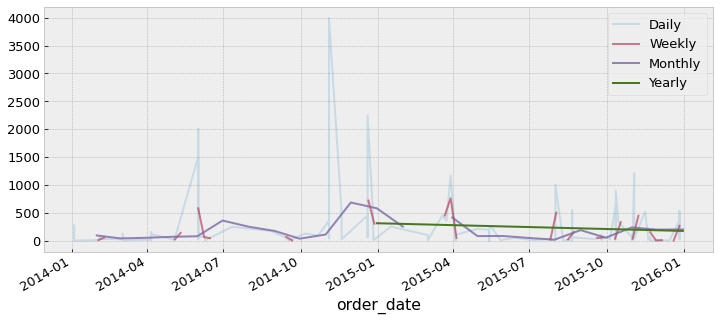

In [197]:
# Y over various periods
home_office_sales.plot(alpha = .2, label='Daily')
home_office_sales.resample('W').mean().plot(alpha=.5, label='Weekly')
home_office_sales.resample('M').mean().plot(alpha=.8, label='Monthly')
home_office_sales.resample('Y').mean().plot(label='Yearly')
plt.legend()

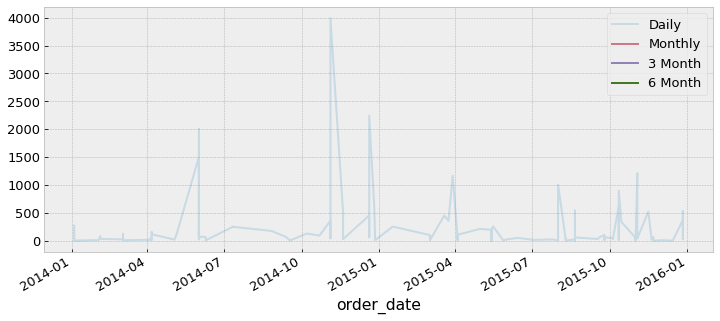

In [198]:
# Y over various periods
home_office_sales.plot(alpha = .2, label='Daily')
home_office_sales.resample('W').mean().rolling(4).mean().plot(alpha=.5, label='Monthly')
home_office_sales.resample('W').mean().rolling(12).mean().plot(alpha=.8, label='3 Month')
home_office_sales.resample('W').mean().rolling(26).mean().plot(label='6 Month')
plt.legend()

<AxesSubplot:title={'center':'Sum week-to-week change in Sales'}, xlabel='order_date'>

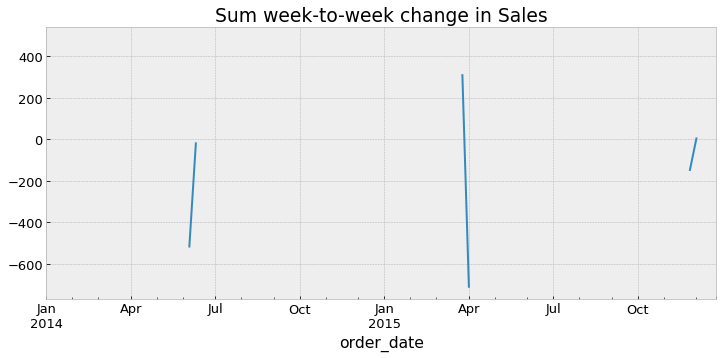

In [199]:
# Change in y week to week
home_office_sales.resample('W').mean().diff().plot(title='Sum week-to-week change in Sales')

<AxesSubplot:title={'center':'Sum monthly change in Sales'}, xlabel='order_date'>

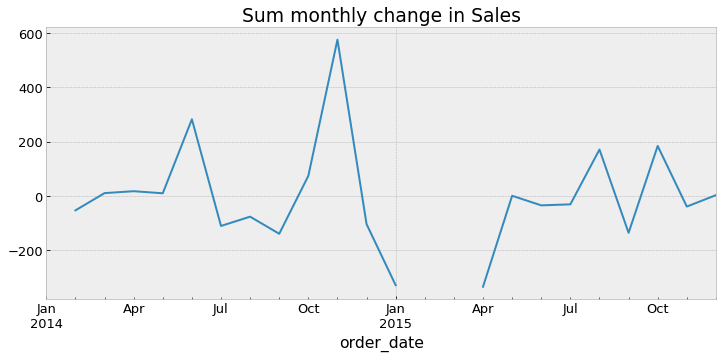

In [200]:
# Change in y month to month
home_office_sales.resample('M').mean().diff().plot(title='Sum monthly change in Sales')

[Text(0.5, 1.0, 'Profit over time')]

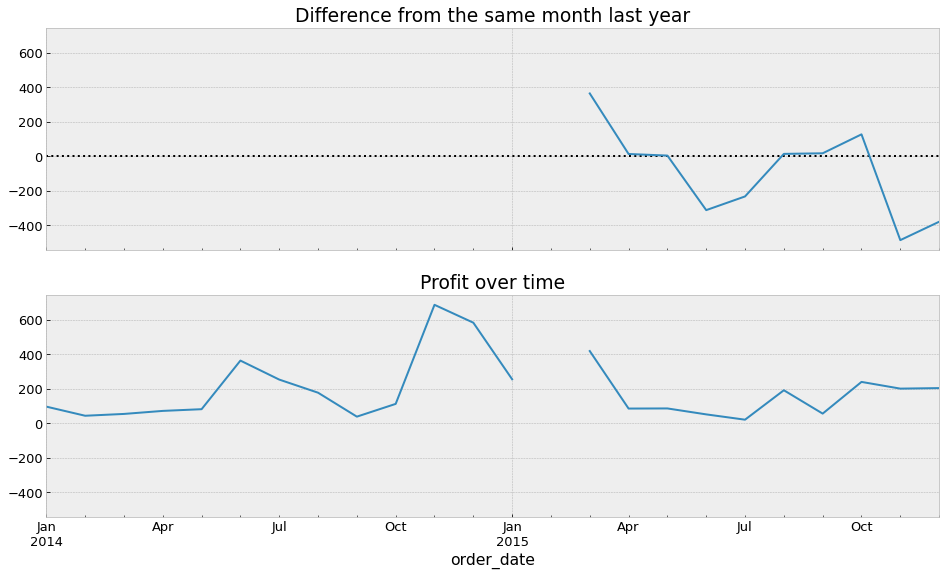

In [201]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = home_office_sales.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

home_office_sales.resample('M').mean().plot(ax=ax2)
ax2.set(title='Profit over time')

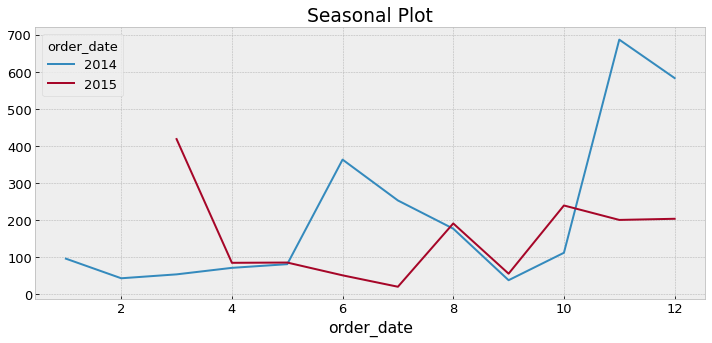

In [202]:
# Seasonal Plot
home_office_sales.groupby([home_office_sales.index.year,home_office_sales.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

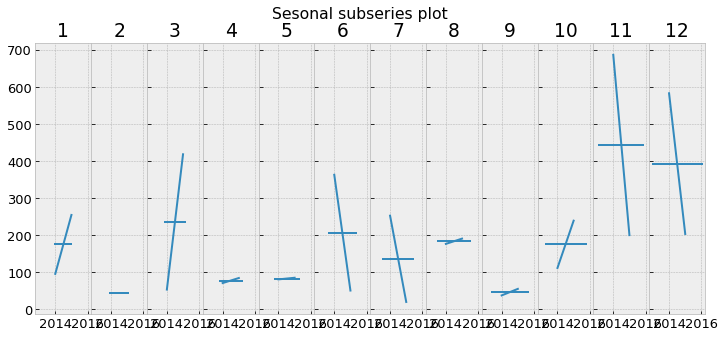

In [203]:
# Seasonal Subseries Plot
table = home_office_sales.groupby([home_office_sales.index.year, home_office_sales.index.month]).mean().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='sales', ylabel='sales'>

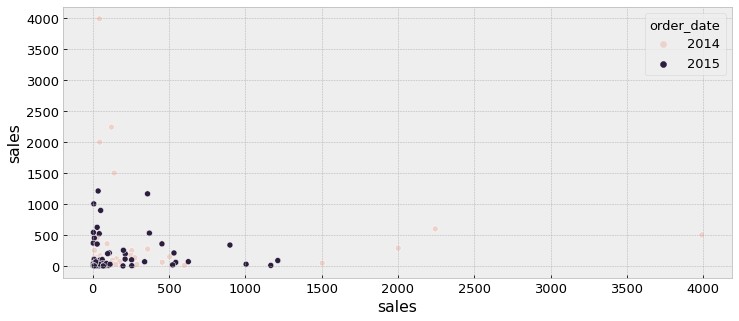

In [204]:
# Lag Plot
sns.scatterplot(x = home_office_sales, y = home_office_sales.shift(-1), hue = home_office_sales.index.year)

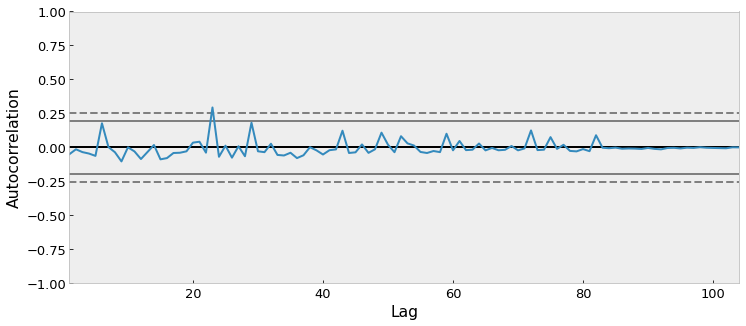

In [205]:
# Autocorrelation
pd.plotting.autocorrelation_plot(home_office_sales.resample('W').sum())
plt.show()

In [206]:
# result = sm.tsa.seasonal_decompose(home_office_sales.resample('Y').mean())
# decomposition = pd.DataFrame({
#     'y' : result.observed,
#     'trend' : result.trend,
#     'seasonal' : result.seasonal,
#     'resid': result.resid,
# })
# decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
# decomposition[['trend_centered','seasonal','resid']].plot()

In [207]:
# decomposition.iloc[:,1:].plot()
# plt.show()

In [208]:
# result.plot()
# plt.show()

## Questions

In [209]:
# sns.relplot(x='sales',y='profit',data=train,col='segment')

In [210]:
# sns.barplot(x='category',y='profit',data=train,hue='segment')

In [211]:
# sns.barplot(x='sub-category',y='profit',data=train,hue='segment')

In [212]:
# year_ssdb = ssdb.groupby(by='segment',group_keys=False).resample('Y').sum()
# year_ssdb['year'] = year_ssdb.index.year
# year_ssdb

In [213]:
ssdb.head()

order_id  ship_date       ship_mode      segment  \
order_date                                                           
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   

                  country        city     state postal_code    sales  \
order_date                                                             
2014-01-04  United States  Naperville  Illinois     60540.0   11.784   
2014-01-04  United States  Naperville  Illinois     60540.0  272.736   
2014-01-04  United States  Naperville  Illinois     60540.0    3.540   
2014-01-09  United States      Laredo     Texas     78041.0   31.200   
2014-01-09  United States      Laredo     Texas     78041.0    9.344   

            quantity  discount   profit         category sub-category  \
order_date                                                              
2014-01-04       3.0       0.2   4.2717  Office Supplies       Labels   
2014-01-04       3.0       0.2 -64.7748  Office Supplies      Storage   
2014-01-04       2.0       0.8  -5.4870  Office Supplies      Binders   
2014-01-09       3.0       0.2   9.7500       Technology  Accessories   
2014-01-09       2.0       0.2   1.1680  Office Supplies          Art   

            customer_name                                product_name  \
order_date                                                              
2014-01-04  Phillina Ober                                   Avery 508   
2014-01-04  Phillina Ober               SAFCO Boltless Steel Shelving   
2014-01-04  Phillina Ober  GBC Standard Plastic Binding Systems Combs   
2014-01-09  Melanie Seite             Memorex Micro Travel Drive 8 GB   
2014-01-09  Melanie Seite                                  Newell 312   

           region_name days_to_ship  year  
order_date                                 
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-09     Central       4 days  2014  
2014-01-09     Central       4 days  2014

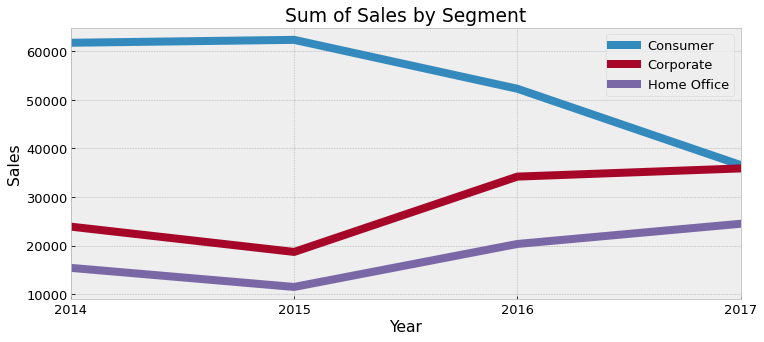

In [214]:
year_ssdb = ssdb.groupby(by='segment').resample('Y').sum()
year_ssdb.index = year_ssdb.index.set_names(['segment','order_dates'])

year_ssdb.loc[('Consumer')]['sales'].plot(label='Consumer',linewidth=8)
year_ssdb.loc[('Corporate')]['sales'].plot(label='Corporate',linewidth=8)
year_ssdb.loc[('Home Office')]['sales'].plot(label='Home Office',linewidth=8)

leg = plt.legend()

leg.get_lines()[0].set_linewidth(8)
leg.get_lines()[1].set_linewidth(8)
leg.get_lines()[2].set_linewidth(8)

plt.title('Sum of Sales by Segment')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

<AxesSubplot:xlabel='segment', ylabel='count'>

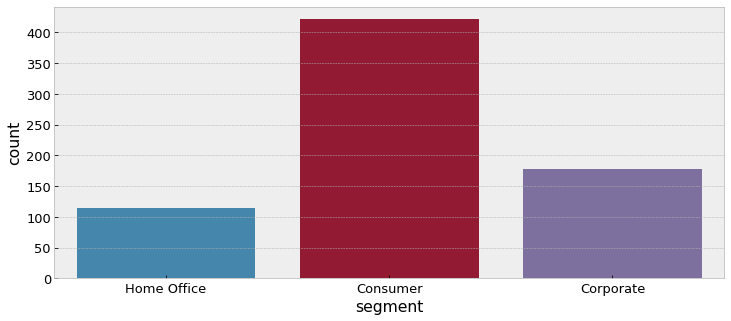

In [215]:
sns.countplot(x='segment',data=train)

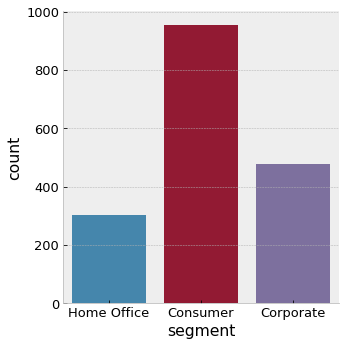

In [216]:
sns.catplot(x='segment',kind='count',data=ssdb)

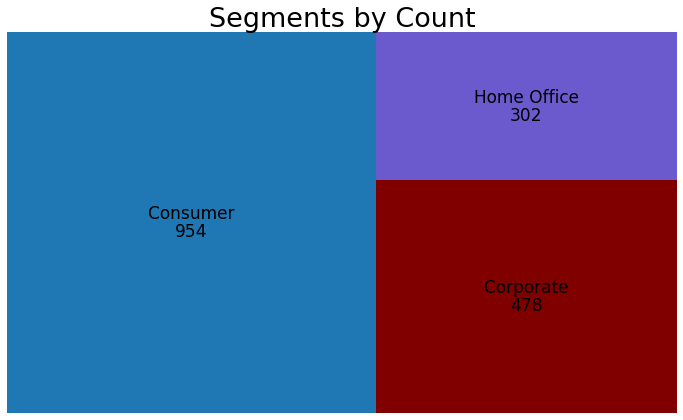

In [217]:
plt.figure(figsize=(12,7))

squarify.plot(sizes=list(ssdb.segment.value_counts().values), 
              label=list(ssdb.segment.value_counts().index), 
              value=list(ssdb.segment.value_counts().values),
             color = ['tab:blue','maroon','slateblue'],
             text_kwargs={'fontsize': 17})

plt.title('Segments by Count', fontsize=27)
plt.axis('off')
plt.show()

In [218]:
ssdb.segment.value_counts().values

array([954, 478, 302])

In [219]:
sum(ssdb.segment.value_counts().values)

1734

In [220]:
len(ssdb)

1734

In [221]:
ssdb.head()

order_id  ship_date       ship_mode      segment  \
order_date                                                           
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-04  CA-2014-112326 2014-01-08  Standard Class  Home Office   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   
2014-01-09  CA-2014-135405 2014-01-13  Standard Class     Consumer   

                  country        city     state postal_code    sales  \
order_date                                                             
2014-01-04  United States  Naperville  Illinois     60540.0   11.784   
2014-01-04  United States  Naperville  Illinois     60540.0  272.736   
2014-01-04  United States  Naperville  Illinois     60540.0    3.540   
2014-01-09  United States      Laredo     Texas     78041.0   31.200   
2014-01-09  United States      Laredo     Texas     78041.0    9.344   

            quantity  discount   profit         category sub-category  \
order_date                                                              
2014-01-04       3.0       0.2   4.2717  Office Supplies       Labels   
2014-01-04       3.0       0.2 -64.7748  Office Supplies      Storage   
2014-01-04       2.0       0.8  -5.4870  Office Supplies      Binders   
2014-01-09       3.0       0.2   9.7500       Technology  Accessories   
2014-01-09       2.0       0.2   1.1680  Office Supplies          Art   

            customer_name                                product_name  \
order_date                                                              
2014-01-04  Phillina Ober                                   Avery 508   
2014-01-04  Phillina Ober               SAFCO Boltless Steel Shelving   
2014-01-04  Phillina Ober  GBC Standard Plastic Binding Systems Combs   
2014-01-09  Melanie Seite             Memorex Micro Travel Drive 8 GB   
2014-01-09  Melanie Seite                                  Newell 312   

           region_name days_to_ship  year  
order_date                                 
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-04     Central       4 days  2014  
2014-01-09     Central       4 days  2014  
2014-01-09     Central       4 days  2014

In [222]:
ssdb.customer_name.nunique()

525

In [223]:
ssdb.order_id.nunique()

841

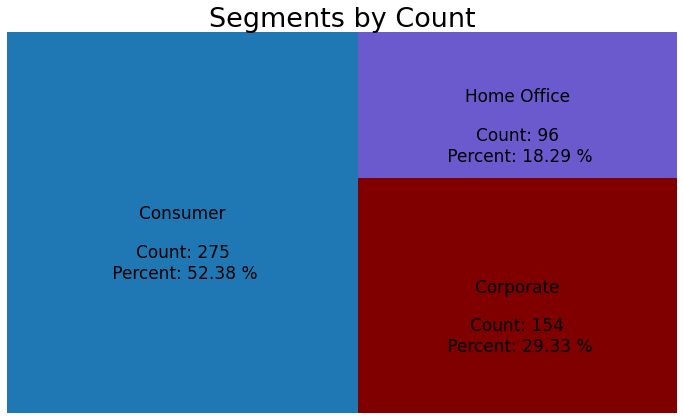

In [224]:
# Assign Counts of Customers to each segement
con_count = len(ssdb.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Consumer')])
cor_count = len(ssdb.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Corporate')])
hom_count = len(ssdb.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Home Office')])
segment_counts = [con_count,cor_count,hom_count]

# Assign segment percentages
seg_percent = []

for x in segment_counts:
    seg_percent.append(f'\nCount: {x}\n Percent: {round(x / sum(segment_counts) * 100,2)} %')
    
seg_percent
# Assign figure size
plt.figure(figsize=(12,7))
# Use Squarify to create a tree map of segment counts
squarify.plot(sizes=segment_counts, 
              label=list(ssdb.segment.value_counts().index),
              value=seg_percent,
              color = ['tab:blue','maroon','slateblue'],
              text_kwargs={'fontsize': 17})
# Assign titles
plt.title('Segments by Count', fontsize=27)
plt.axis('off')
plt.show()

In [225]:
# # Assign Counts of Customers to each segement
# con_count = len(ssdb.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Consumer')])
# cor_count = len(ssdb.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Corporate')])
# hom_count = len(ssdb.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Home Office')])
# segment_counts = [con_count,cor_count,hom_count]

# # Assign segment percentages
# seg_percent = []

# for x in segment_counts:
#     seg_percent.append(round(x / sum(segment_counts),2))
    
# seg_percent

# zip(segment_counts, seg_percent)
# s
# # # Assign figure size
# # plt.figure(figsize=(12,7))
# # # Use Squarify to create a tree map of segment counts
# # squarify.plot(sizes=segment_counts, 
# #               label=list(ssdb.segment.value_counts().index), 
# #               value=seg_percent,
# #              color = ['tab:blue','maroon','slateblue'],
# #              text_kwargs={'fontsize': 17})
# # # Assign titles
# # plt.title('Segments by Count', fontsize=27)
# # plt.axis('off')
# # plt.show()

In [226]:
seg_percent = []
for x in segment_counts:
    seg_percent.append(round(x / sum(segment_counts) * 100,2))
    
seg_percent

[52.38, 29.33, 18.29]

In [227]:
# Assign Counts of Customers to each segement
con_count = len(ssdb.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Consumer')])
cor_count = len(ssdb.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Corporate')])
hom_count = len(ssdb.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Home Office')])
segment_counts = [con_count,cor_count,hom_count]

# Assign segment percentages
seg_percent = []

for x in segment_counts:
    seg_percent.append([x, "{: .2%}".format(x / sum(segment_counts))])
    
seg_percent

[[275, ' 52.38%'], [154, ' 29.33%'], [96, ' 18.29%']]

<BarContainer object of 4 artists>

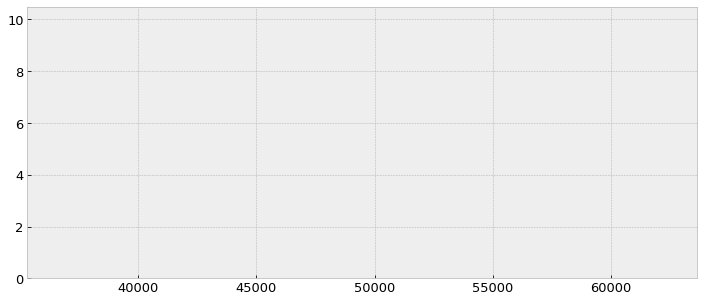

In [228]:
year_ssdb = ssdb.groupby(by='segment').resample('Y').sum()
year_ssdb.index = year_ssdb.index.set_names(['segment','order_dates'])

plt.bar(year_ssdb.loc[('Consumer')]['sales'],height=10)
# plot(label='Consumer',linewidth=8)
# year_ssdb.loc[('Corporate')]['sales'].plot(label='Corporate',linewidth=8)
# year_ssdb.loc[('Home Office')]['sales'].plot(label='Home Office',linewidth=8)

# leg = plt.legend()

# leg.get_lines()[0].set_linewidth(8)
# leg.get_lines()[1].set_linewidth(8)
# leg.get_lines()[2].set_linewidth(8)

# plt.title('Sum of Sales by Segment')
# plt.xlabel('Year')
# plt.ylabel('Sales')
# plt.show()

In [229]:
ssdb.profit.sum()

37940.52929999999

In [230]:
ssdb.sales.sum()

397443.8254

In [231]:
kpi_year = ssdb.resample('Y')['profit','sales'].sum()
kpi_year['year'] = kpi_year.index.year


In [232]:
# sns.barplot(x='year',y=['profit','sales'],data=kpi_year)

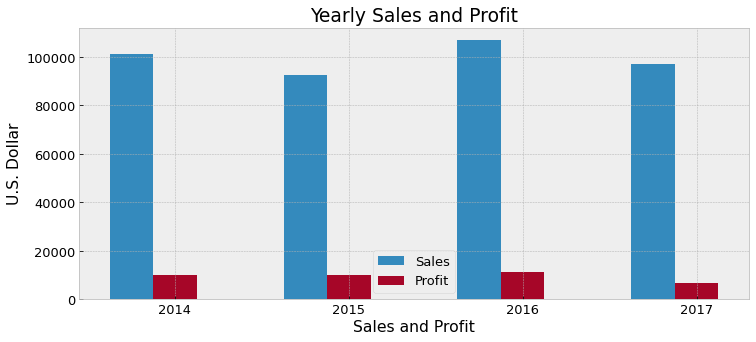

In [233]:
N = 4
ind = np.arange(N)
width = 0.25
  
xvals = list(ssdb.resample('Y')['sales'].sum().values)
bar1 = plt.bar(ind, xvals, width)
  
yvals = list(ssdb.resample('Y')['profit'].sum().values)
bar2 = plt.bar(ind+width, yvals, width)

plt.xlabel("Sales and Profit")
plt.ylabel('U.S. Dollar')
plt.title("Yearly Sales and Profit")
  
plt.xticks(ind+width,['2014', '2015', '2016', '2017'])
plt.legend( (bar1, bar2), ('Sales', 'Profit') )
plt.show()

In [234]:
yearly_profit = (
    ssdb[['profit','segment']]
    .groupby('segment')
    .resample('Y')
    .profit.sum()
    .unstack(0)
)
yearly_profit

segment      Consumer  Corporate  Home Office
order_date                                   
2014-12-31  4086.7228  1314.5923    4639.9174
2015-12-31  7080.6101  2177.5323     748.6245
2016-12-31  4392.9969  4994.8690    1837.5290
2017-12-31  5113.0760 -1606.3460    3160.4050

In [235]:
3839.9904 + -1606.3460

2233.6444

In [236]:
yearly_profit[yearly_profit.index.year == 2017].sum(axis=1)

order_date
2017-12-31    6667.135
Freq: A-DEC, dtype: float64

In [237]:
2233.64 + 5113.07 + 3160.40

10507.109999999999

In [238]:
(6667.13 -10507.11) / 6667.13

-0.5759569709905162

In [239]:
yearly_sales = (
    ssdb[['sales','segment']]
    .groupby('segment')
    .resample('Y')
    .sales.sum()
    .unstack(0)
)
yearly_sales

segment       Consumer   Corporate  Home Office
order_date                                     
2014-12-31  61748.2585  23905.4380   15421.8720
2015-12-31  62347.3110  18705.2330   11500.2102
2016-12-31  52287.4506  34204.4110   20344.3480
2017-12-31  36587.0728  35890.5908   24501.6295

In [240]:
35890.59 - 7999.98

27890.609999999997

In [241]:
corporate = ssdb[ssdb['segment'] == 'Corporate'][['sales','profit']]

In [242]:
cor_2017 = corporate[corporate.index.year == 2017]

In [243]:
cor_2017[cor_2017['profit'] < 0]

sales     profit
order_date                      
2017-01-02    15.6600   -12.5280
2017-01-02   695.7000   -27.8280
2017-01-02    28.8540   -21.1596
2017-02-02    59.9700   -11.9940
2017-03-31   205.3328   -36.2352
2017-04-24     1.1880    -0.9900
2017-04-24     7.5180    -5.7638
2017-04-29  1048.3500   -69.8900
2017-04-30   677.5800  -158.1020
2017-04-30    13.8960    -9.2640
2017-06-08     1.6240    -4.4660
2017-07-06     2.9460    -2.2586
2017-07-09    58.4640  -146.1600
2017-08-27  1488.4240  -297.6848
2017-09-09  1931.9580  -386.3916
2017-09-09     4.5030    -3.6024
2017-09-09     3.0360    -2.3276
2017-09-09   141.3720   -48.4704
2017-10-09   652.4500  -430.6170
2017-10-09    66.6450   -42.6528
2017-10-19   309.5760   -56.7556
2017-10-20   284.3640   -75.8304
2017-11-04  7999.9800 -3839.9904
2017-11-10    38.3880   -25.5920
2017-11-10    95.9940   -63.9960
2017-11-10   899.1360  -146.1096
2017-11-10   239.9520   -35.9928
2017-12-09     1.2480    -1.9344
2017-12-09    37.2080    -7.4416
2017-12-09     9.7080    -5.8248

In [244]:
ssdb[ssdb.index == '2017-11-04']

order_id  ship_date       ship_mode      segment  \
order_date                                                           
2017-11-04  CA-2017-105144 2017-11-11  Standard Class  Home Office   
2017-11-04  US-2017-156083 2017-11-11  Standard Class  Home Office   
2017-11-04  US-2017-168116 2017-11-04        Same Day    Corporate   
2017-11-04  US-2017-168116 2017-11-04        Same Day    Corporate   

                  country           city           state postal_code  \
order_date                                                             
2017-11-04  United States  Grand Prairie           Texas     75051.0   
2017-11-04  United States       Columbia       Tennessee     38401.0   
2017-11-04  United States     Burlington  North Carolina     27217.0   
2017-11-04  United States     Burlington  North Carolina     27217.0   

               sales  quantity  discount     profit         category  \
order_date                                                             
2017-11-04    23.680       2.0       0.2     8.8800  Office Supplies   
2017-11-04     9.664       2.0       0.2     3.2616  Office Supplies   
2017-11-04   167.440       2.0       0.2    14.6510  Office Supplies   
2017-11-04  7999.980       4.0       0.5 -3839.9904       Technology   

           sub-category   customer_name  \
order_date                                
2017-11-04       Labels      Sam Zeldin   
2017-11-04        Paper    James Lanier   
2017-11-04   Appliances  Grant Thornton   
2017-11-04     Machines  Grant Thornton   

                                                 product_name region_name  \
order_date                                                                  
2017-11-04             Alphabetical Labels for Top Tab Filing     Central   
2017-11-04        Adams Telephone Message Books, 5 1/4” x 11”       South   
2017-11-04  Eureka The Boss Plus 12-Amp Hard Box Upright V...       South   
2017-11-04          Cubify CubeX 3D Printer Triple Head Print       South   

           days_to_ship  year  
order_date                     
2017-11-04       7 days  2017  
2017-11-04       7 days  2017  
2017-11-04       0 days  2017  
2017-11-04       0 days  2017

In [337]:
ssdb[ssdb['product_name'] == 'Cubify CubeX 3D Printer Triple Head Print']\
\
[['segment','customer_name','order_id','sales','quantity','discount','profit','product_name']]

segment   customer_name        order_id    sales  quantity  \
order_date                                                                 
2017-11-04  Corporate  Grant Thornton  US-2017-168116  7999.98       4.0   

            discount     profit                               product_name  
order_date                                                                  
2017-11-04       0.5 -3839.9904  Cubify CubeX 3D Printer Triple Head Print

In [246]:
ssdb[ssdb['customer_name'] == 'Grant Thornton']

order_id  ship_date ship_mode    segment        country  \
order_date                                                                  
2017-11-04  US-2017-168116 2017-11-04  Same Day  Corporate  United States   
2017-11-04  US-2017-168116 2017-11-04  Same Day  Corporate  United States   

                  city           state postal_code    sales  quantity  \
order_date                                                              
2017-11-04  Burlington  North Carolina     27217.0   167.44       2.0   
2017-11-04  Burlington  North Carolina     27217.0  7999.98       4.0   

            discount     profit         category sub-category   customer_name  \
order_date                                                                      
2017-11-04       0.2    14.6510  Office Supplies   Appliances  Grant Thornton   
2017-11-04       0.5 -3839.9904       Technology     Machines  Grant Thornton   

                                                 product_name region_name  \
order_date                                                                  
2017-11-04  Eureka The Boss Plus 12-Amp Hard Box Upright V...       South   
2017-11-04          Cubify CubeX 3D Printer Triple Head Print       South   

           days_to_ship  year  
order_date                     
2017-11-04       0 days  2017  
2017-11-04       0 days  2017

In [247]:
cor_2017[cor_2017['profit'] < 0]['profit'].sum()

-5977.853399999999

In [248]:
-3839.9904 / -5977.8534

0.642369449876439

In [249]:
cor_2016 = corporate[corporate.index.year == 2016]

In [250]:
cor_2016[cor_2016['profit'] > 100]['profit']

order_date
2016-04-07     374.9925
2016-09-15     294.5488
2016-10-21     271.4192
2016-11-12     129.3840
2016-11-26    1459.2000
2016-12-05     103.8015
2016-12-05     585.5520
2016-12-08     123.4737
2016-12-11     298.6855
2016-12-15     231.4116
Name: profit, dtype: float64

In [251]:
ssdb[ssdb.index == '2016-11-26']

order_id  ship_date    ship_mode    segment        country  \
order_date                                                                     
2016-11-26  CA-2016-133711 2016-11-29  First Class  Corporate  United States   
2016-11-26  CA-2016-133711 2016-11-29  First Class  Corporate  United States   
2016-11-26  CA-2016-133711 2016-11-29  First Class  Corporate  United States   
2016-11-26  CA-2016-133711 2016-11-29  First Class  Corporate  United States   

              city    state postal_code    sales  quantity  discount  \
order_date                                                             
2016-11-26  Mobile  Alabama     36608.0    91.68       3.0       0.0   
2016-11-26  Mobile  Alabama     36608.0    70.98       7.0       0.0   
2016-11-26  Mobile  Alabama     36608.0  3040.00       8.0       0.0   
2016-11-26  Mobile  Alabama     36608.0    33.75       5.0       0.0   

               profit         category sub-category customer_name  \
order_date                                                          
2016-11-26    45.8400  Office Supplies      Binders  Mark Cousins   
2016-11-26    34.7802  Office Supplies        Paper  Mark Cousins   
2016-11-26  1459.2000       Technology     Machines  Mark Cousins   
2016-11-26    16.8750  Office Supplies      Binders  Mark Cousins   

                                                 product_name region_name  \
order_date                                                                  
2016-11-26                              Surelock Post Binders       South   
2016-11-26                                  Easy-staple paper       South   
2016-11-26  Hewlett-Packard Deskjet 3050a All-in-One Color...       South   
2016-11-26               Wilson Jones DublLock D-Ring Binders       South   

           days_to_ship  year  
order_date                     
2016-11-26       3 days  2016  
2016-11-26       3 days  2016  
2016-11-26       3 days  2016  
2016-11-26       3 days  2016

In [252]:
con = ssdb.groupby(by=['segment','order_id']).sum().loc['Consumer']

# Set index to date time
# add year column
# group by year

In [253]:
len(ssdb.groupby(by=['segment','order_id']).resample('Y').sum().loc['Consumer'])

455

In [254]:
len(ssdb.groupby(by=['segment','order_id']).resample('Y').sum().loc['Corporate'])

240

In [255]:
len(ssdb.groupby(by=['segment','order_id']).resample('Y').sum().loc['Home Office'])

146

In [256]:
ssdb.order_id.nunique()

841

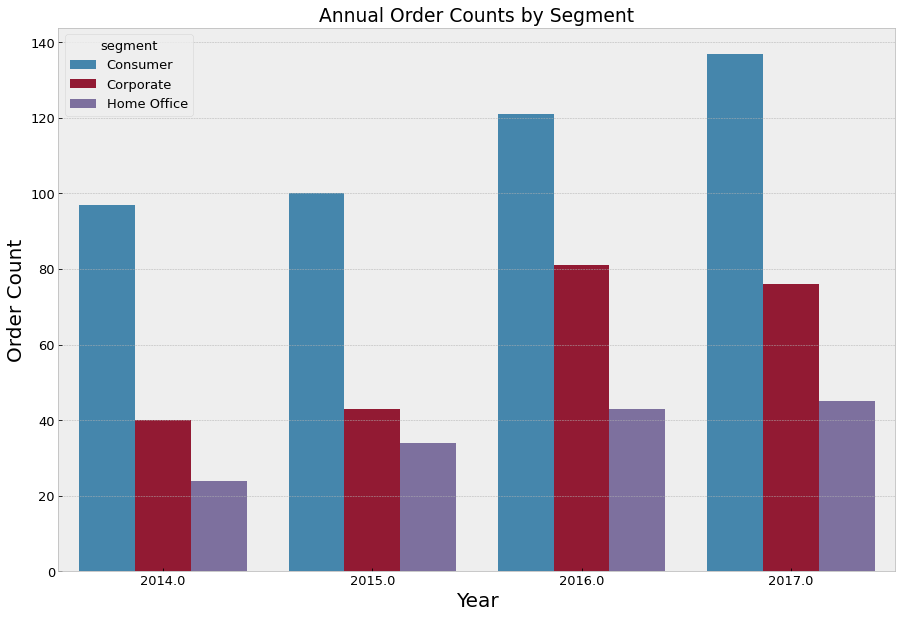

In [257]:
# Create new dataframe sampled by year and grouped by segment and order id
order_counts = ssdb.groupby(by=['segment','order_id']).resample('Y').mean()
# reset index to order date
order_counts = order_counts.reset_index().set_index('order_date')
# Create ne dataframe with the counts of each segment by year
norder_counts = pd.DataFrame(order_counts[['year','segment']].value_counts()).reset_index()
# plot the new dataframe with a bar chart
plt.figure(figsize=[15,10])
sns.barplot(x='year',y = 0, hue = 'segment', data = norder_counts)
plt.title('Annual Order Counts by Segment')
plt.xlabel('Year',size=20)
plt.ylabel('Order Count',size=20)
plt.show()

In [258]:
norder_counts.sort_values(by=['segment','year'])

year      segment    0
3   2014.0     Consumer   97
2   2015.0     Consumer  100
1   2016.0     Consumer  121
0   2017.0     Consumer  137
9   2014.0    Corporate   40
7   2015.0    Corporate   43
4   2016.0    Corporate   81
5   2017.0    Corporate   76
11  2014.0  Home Office   24
10  2015.0  Home Office   34
8   2016.0  Home Office   43
6   2017.0  Home Office   45

In [259]:
ssdb[['segment','sales','year']].groupby(['year','segment']).sum().unstack(0).mean(axis=1)

segment
Consumer       53242.523225
Corporate      28176.418200
Home Office    17942.014925
dtype: float64

## Numbers

<AxesSubplot:xlabel='order_date'>

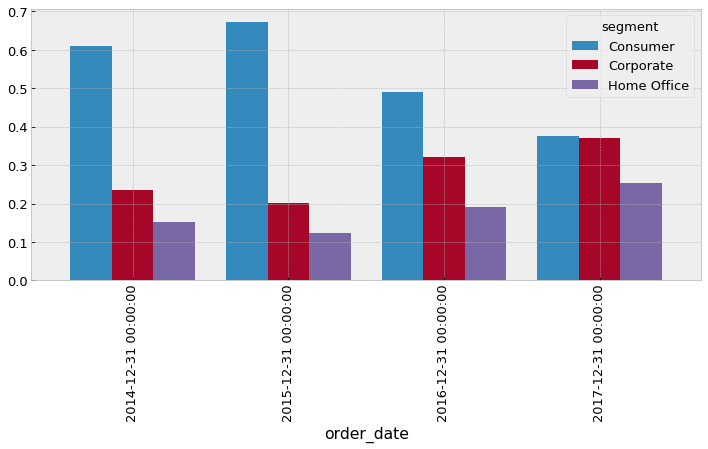

In [260]:
(ssdb[['sales','segment']]
    .groupby('segment')
    .resample('M')
    .sales.sum()
    .unstack(0)
    .resample('Y')
    .sum()
    .apply(lambda row: row / row.sum(),axis = 1)
    .plot.bar(width=.8)
    )

In [364]:
num = 0.05
while num < 99:
    print(f'Percent: {round(num,2)}')
    print(f'Consumer Value: {round(ssdb[ssdb["segment"]=="Consumer"].sales.quantile(q=num),2)}')
    print(f'Corporate Value: {round(ssdb[ssdb["segment"]=="Corporate"].sales.quantile(q=num),2)}')
    print(f'Home Office Value: {round(ssdb[ssdb["segment"]=="Home Office"].sales.quantile(q=num),2)}')
    print('---------------')
    num +=0.05

Percent: 0.05
Consumer Value: 4.37
Corporate Value: 5.86
Home Office Value: 4.9
---------------
Percent: 0.1
Consumer Value: 6.86
Corporate Value: 8.79
Home Office Value: 7.56
---------------
Percent: 0.15
Consumer Value: 9.73
Corporate Value: 11.59
Home Office Value: 10.37
---------------
Percent: 0.2
Consumer Value: 12.88
Corporate Value: 14.15
Home Office Value: 15.55
---------------
Percent: 0.25
Consumer Value: 15.89
Corporate Value: 15.95
Home Office Value: 19.57
---------------
Percent: 0.3
Consumer Value: 19.98
Corporate Value: 20.11
Home Office Value: 25.52
---------------
Percent: 0.35
Consumer Value: 24.51
Corporate Value: 24.81
Home Office Value: 29.64
---------------
Percent: 0.4
Consumer Value: 32.0
Corporate Value: 32.93
Home Office Value: 36.88
---------------
Percent: 0.45
Consumer Value: 39.98
Corporate Value: 41.26
Home Office Value: 47.59
---------------
Percent: 0.5
Consumer Value: 48.88
Corporate Value: 54.69
Home Office Value: 63.97
---------------
Percent: 0.55


ValueError: percentiles should all be in the interval [0, 1]. Try 0.010000000000000002 instead.

In [ ]:
ssdb

# Forcasting

In [304]:
train, validate, test = mw.split_year_superstore(mw.prep_superstore(mw.get_superstore()))

In [305]:
y_train = train['profit']
y_validate = validate['profit']
y_test = test['profit']

In [306]:
len(y_train)

712

In [307]:
len(y_validate)

526

In [308]:
len(y_test)

496

## Helper Functions

In [309]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [310]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [311]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

## modeling

### Last Observed Value

In [312]:
profit = round(y_train[-1:][0],2)

yhat_df = pd.DataFrame({'profit': [profit]}, 
                       index = validate.index)

yhat_df.head(2)

profit
order_date        
2016-01-05    1.36
2016-01-05    1.36

profit -- RMSE: 183


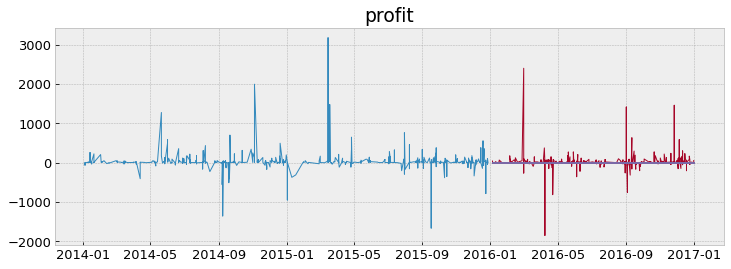

In [313]:
plot_and_eval('profit')

In [314]:
profit

1.36

In [315]:
eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'profit')

In [316]:
eval_df

model_type target_var   rmse
0  last_observed_value     profit  183.0

### Simple Average

In [317]:
profit = round(y_train.mean(),2)

yhat_df = pd.DataFrame({'profit': [profit]}, 
                       index = validate.index)

yhat_df.head(2)

profit
order_date        
2016-01-05   28.16
2016-01-05   28.16

In [318]:
profit

28.16

In [319]:
eval_df = append_eval_df(model_type='simple_average', target_var = 'profit')

In [320]:
eval_df

model_type target_var   rmse
0  last_observed_value     profit  183.0
1       simple_average     profit  182.0

### Moving/Rolling Average

In [321]:
periods = [1,5,7,14,30,60,90,120,182,365]

for p in periods:
    profit = round(y_train.rolling(p).mean().iloc[-1],2)

    yhat_df = pd.DataFrame({'profit': [profit]}, index = validate.index)
    
    model_type = str(p) + 'd moving average'
    eval_df = append_eval_df(model_type = model_type, target_var = 'profit')

yhat_df.head()

profit
order_date        
2016-01-05   32.56
2016-01-05   32.56
2016-01-05   32.56
2016-01-11   32.56
2016-01-11   32.56

In [322]:
eval_df

model_type target_var   rmse
0   last_observed_value     profit  183.0
1        simple_average     profit  182.0
2     1d moving average     profit  183.0
3     5d moving average     profit  183.0
4     7d moving average     profit  181.0
5    14d moving average     profit  183.0
6    30d moving average     profit  185.0
7    60d moving average     profit  182.0
8    90d moving average     profit  182.0
9   120d moving average     profit  182.0
10  182d moving average     profit  182.0
11  365d moving average     profit  182.0

### Holt's Linear Trend

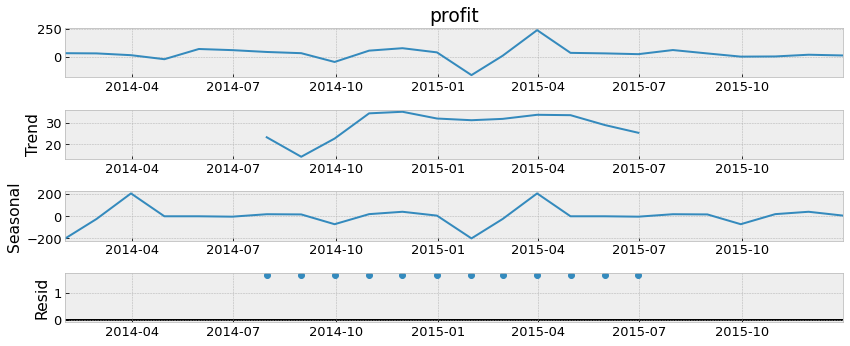

In [323]:
sm.tsa.seasonal_decompose(y_train.resample('M').mean()).plot()
plt.show()

In [324]:
model = Holt(y_train, exponential = False)
model = model.fit(smoothing_level = 0.1,
                  smoothing_slope = 0.1,
                  optimized = False)
yhat_profit = model.predict()
yhat_df['profit'] = round(yhat_df, 2)

In [325]:
eval_df = append_eval_df(model_type='Holts',
                        target_var = col)

In [326]:
eval_df

model_type target_var   rmse
0   last_observed_value     profit  183.0
1        simple_average     profit  182.0
2     1d moving average     profit  183.0
3     5d moving average     profit  183.0
4     7d moving average     profit  181.0
5    14d moving average     profit  183.0
6    30d moving average     profit  185.0
7    60d moving average     profit  182.0
8    90d moving average     profit  182.0
9   120d moving average     profit  182.0
10  182d moving average     profit  182.0
11  365d moving average     profit  182.0
12                Holts     profit  182.0

<AxesSubplot:xlabel='model_type', ylabel='rmse'>

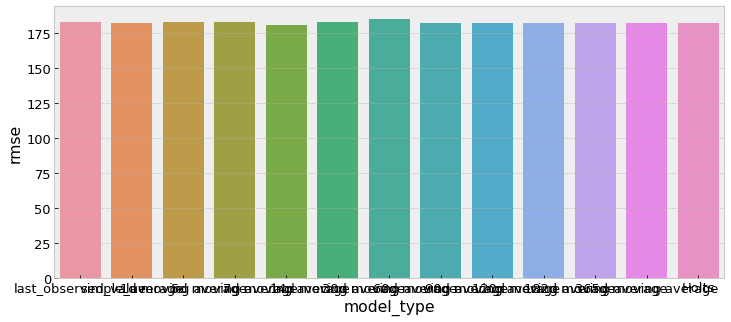

In [327]:
sns.barplot(x='model_type',y='rmse',data = eval_df)

In [328]:
# Plot and evaluate train, validate, and test
def plot_and_eval_test(target_var):
    plt.figure(figsize = (20,10))
    plt.plot(y_train, label = 'Train', linewidth = 1)
    plt.plot(y_validate, label = 'Validate', linewidth = 1)
    plt.plot(y_test, label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var], alpha = .5, color="red")
    plt.title(target_var)
    plt.legend()
    plt.show()

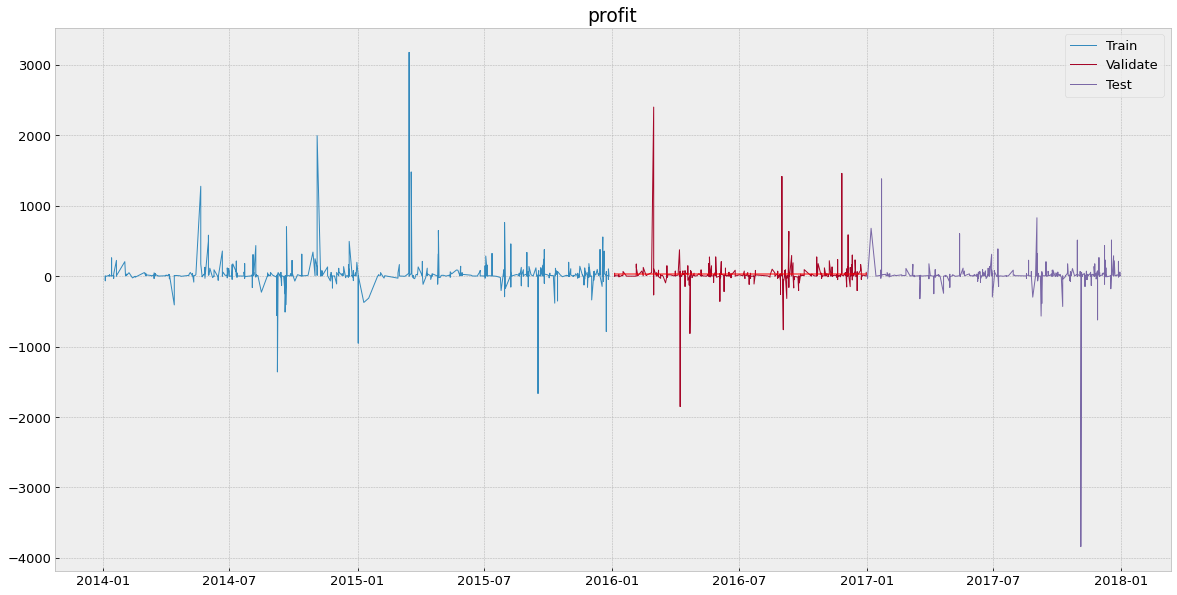

In [329]:
plot_and_eval_test('profit')